<a href="https://colab.research.google.com/github/ajaysanthoshb/FYP_backend/blob/main/FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import glob
import numpy as np
from tqdm import tqdm
import itertools
import matplotlib.pyplot as plt
import pandas as pd

# Audio
import librosa
import librosa.display

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [2]:
!pip install tqdm
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd

# scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight
import scikitplot as skplt
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# Keras
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
# from keras.utils import to_categorical

# Audio
import librosa 
import librosa.display

#Plot
import matplotlib.pyplot as plt

# Utility
import os
import glob
import numpy as np
from tqdm import tqdm
import itertools

In [4]:
visited = False
def extract_features(audio_path,offset,duration):
    global visited
    y, sr = librosa.load(audio_path, offset=offset, duration=duration)  
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, 
                                   hop_length=512, 
                                   n_mels=128)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    if not visited:
      print(S.shape,mfccs.shape)
      visited = True
    return mfccs

In [ ]:
print(x_train_CNN.shape)

(1152, 40, 130, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=2, input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=256, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(len(encoder.classes_), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 129, 32)       160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 64, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 64, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 63, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 31, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 31, 64)         0

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint,TensorBoard,ProgbarLogger
from keras.utils import np_utils
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import itertools

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc'])
MAX_PATIENT=12
MAX_EPOCHS=300
MAX_BATCH=32

best_model_file = '/content/drive/MyDrive/heartbeat-sounds/CNN2'
# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]


print ("training started..... please wait.")
# training
history=model.fit(x_train_CNN, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(x_test_CNN, y_test),
                  callbacks=callback)

training started..... please wait.

Epoch 1: loss improved from inf to 4.22028, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 2: loss improved from 4.22028 to 1.30703, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 3: loss improved from 1.30703 to 1.02286, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 4: loss improved from 1.02286 to 0.90530, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 5: loss improved from 0.90530 to 0.87709, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 6: loss improved from 0.87709 to 0.85282, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 7: loss improved from 0.85282 to 0.79128, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 8: loss improved from 0.79128 to 0.78972, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 9: loss improved from 0.78972 to 0.74957, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 10: loss improved from 0.74957 to 0.73034, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 11: loss improved from 0.73034 to 0.71625, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 12: loss improved from 0.71625 to 0.71576, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 13: loss improved from 0.71576 to 0.70239, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 14: loss improved from 0.70239 to 0.69192, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 15: loss did not improve from 0.69192

Epoch 16: loss improved from 0.69192 to 0.68070, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 17: loss improved from 0.68070 to 0.67180, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 18: loss improved from 0.67180 to 0.65874, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 19: loss did not improve from 0.65874

Epoch 20: loss did not improve from 0.65874

Epoch 21: loss improved from 0.65874 to 0.63346, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 22: loss did not improve from 0.63346

Epoch 23: loss did not improve from 0.63346

Epoch 24: loss improved from 0.63346 to 0.62603, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 25: loss did not improve from 0.62603

Epoch 26: loss improved from 0.62603 to 0.62220, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 27: loss improved from 0.62220 to 0.61823, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 28: loss improved from 0.61823 to 0.59666, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 29: loss did not improve from 0.59666

Epoch 30: loss did not improve from 0.59666

Epoch 31: loss improved from 0.59666 to 0.58356, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 32: loss did not improve from 0.58356

Epoch 33: loss improved from 0.58356 to 0.57908, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 34: loss improved from 0.57908 to 0.57817, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 35: loss improved from 0.57817 to 0.56848, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 36: loss did not improve from 0.56848

Epoch 37: loss improved from 0.56848 to 0.55115, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 38: loss did not improve from 0.55115

Epoch 39: loss did not improve from 0.55115

Epoch 40: loss did not improve from 0.55115

Epoch 41: loss did not improve from 0.55115

Epoch 42: loss did not improve from 0.55115

Epoch 43: loss did not improve from 0.55115

Epoch 44: loss improved from 0.55115 to 0.54934, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 45: loss did not improve from 0.54934

Epoch 46: loss improved from 0.54934 to 0.52292, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 47: loss improved from 0.52292 to 0.52129, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 48: loss improved from 0.52129 to 0.51643, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 49: loss improved from 0.51643 to 0.51312, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 50: loss did not improve from 0.51312

Epoch 51: loss improved from 0.51312 to 0.50087, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 52: loss did not improve from 0.50087

Epoch 53: loss improved from 0.50087 to 0.48278, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 54: loss did not improve from 0.48278

Epoch 55: loss did not improve from 0.48278

Epoch 56: loss did not improve from 0.48278

Epoch 57: loss did not improve from 0.48278

Epoch 58: loss did not improve from 0.48278

Epoch 59: loss improved from 0.48278 to 0.47852, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 60: loss did not improve from 0.47852

Epoch 61: loss did not improve from 0.47852

Epoch 62: loss did not improve from 0.47852

Epoch 63: loss improved from 0.47852 to 0.46767, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 64: loss improved from 0.46767 to 0.45677, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 65: loss did not improve from 0.45677

Epoch 66: loss improved from 0.45677 to 0.43140, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 67: loss did not improve from 0.43140

Epoch 68: loss did not improve from 0.43140

Epoch 69: loss did not improve from 0.43140

Epoch 70: loss did not improve from 0.43140

Epoch 71: loss improved from 0.43140 to 0.42091, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 72: loss did not improve from 0.42091

Epoch 73: loss did not improve from 0.42091

Epoch 74: loss did not improve from 0.42091

Epoch 75: loss improved from 0.42091 to 0.40170, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 76: loss did not improve from 0.40170

Epoch 77: loss did not improve from 0.40170

Epoch 78: loss improved from 0.40170 to 0.39279, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 79: loss did not improve from 0.39279

Epoch 80: loss did not improve from 0.39279

Epoch 81: loss did not improve from 0.39279

Epoch 82: loss did not improve from 0.39279

Epoch 83: loss did not improve from 0.39279

Epoch 84: loss did not improve from 0.39279

Epoch 85: loss improved from 0.39279 to 0.37233, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 86: loss did not improve from 0.37233

Epoch 87: loss improved from 0.37233 to 0.36983, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 88: loss improved from 0.36983 to 0.36907, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 89: loss improved from 0.36907 to 0.36493, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 90: loss improved from 0.36493 to 0.35693, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 91: loss did not improve from 0.35693

Epoch 92: loss did not improve from 0.35693

Epoch 93: loss did not improve from 0.35693

Epoch 94: loss did not improve from 0.35693

Epoch 95: loss did not improve from 0.35693

Epoch 96: loss improved from 0.35693 to 0.35145, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 97: loss did not improve from 0.35145

Epoch 98: loss improved from 0.35145 to 0.32837, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 99: loss improved from 0.32837 to 0.32792, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 100: loss did not improve from 0.32792

Epoch 101: loss improved from 0.32792 to 0.32606, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 102: loss did not improve from 0.32606

Epoch 103: loss did not improve from 0.32606

Epoch 104: loss did not improve from 0.32606

Epoch 105: loss improved from 0.32606 to 0.32172, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 106: loss improved from 0.32172 to 0.32095, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 107: loss improved from 0.32095 to 0.31786, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 108: loss improved from 0.31786 to 0.29198, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 109: loss did not improve from 0.29198

Epoch 110: loss improved from 0.29198 to 0.28184, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 111: loss did not improve from 0.28184

Epoch 112: loss did not improve from 0.28184

Epoch 113: loss did not improve from 0.28184

Epoch 114: loss did not improve from 0.28184

Epoch 115: loss improved from 0.28184 to 0.28145, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 116: loss did not improve from 0.28145

Epoch 117: loss did not improve from 0.28145

Epoch 118: loss improved from 0.28145 to 0.26921, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 119: loss improved from 0.26921 to 0.26647, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 120: loss did not improve from 0.26647

Epoch 121: loss did not improve from 0.26647

Epoch 122: loss did not improve from 0.26647

Epoch 123: loss did not improve from 0.26647

Epoch 124: loss did not improve from 0.26647

Epoch 125: loss improved from 0.26647 to 0.25576, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 126: loss did not improve from 0.25576

Epoch 127: loss improved from 0.25576 to 0.25003, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 128: loss improved from 0.25003 to 0.24053, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 129: loss did not improve from 0.24053

Epoch 130: loss improved from 0.24053 to 0.22737, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 131: loss improved from 0.22737 to 0.22497, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 132: loss did not improve from 0.22497

Epoch 133: loss did not improve from 0.22497

Epoch 134: loss did not improve from 0.22497

Epoch 135: loss did not improve from 0.22497

Epoch 136: loss did not improve from 0.22497

Epoch 137: loss did not improve from 0.22497

Epoch 138: loss improved from 0.22497 to 0.21577, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 139: loss did not improve from 0.21577

Epoch 140: loss did not improve from 0.21577

Epoch 141: loss did not improve from 0.21577

Epoch 142: loss improved from 0.21577 to 0.20810, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 143: loss did not improve from 0.20810

Epoch 144: loss improved from 0.20810 to 0.18885, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 145: loss did not improve from 0.18885

Epoch 146: loss did not improve from 0.18885

Epoch 147: loss did not improve from 0.18885

Epoch 148: loss did not improve from 0.18885

Epoch 149: loss did not improve from 0.18885

Epoch 150: loss did not improve from 0.18885

Epoch 151: loss did not improve from 0.18885

Epoch 152: loss did not improve from 0.18885

Epoch 153: loss improved from 0.18885 to 0.17862, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 154: loss did not improve from 0.17862

Epoch 155: loss did not improve from 0.17862

Epoch 156: loss did not improve from 0.17862

Epoch 157: loss improved from 0.17862 to 0.17668, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 158: loss did not improve from 0.17668

Epoch 159: loss improved from 0.17668 to 0.17315, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 160: loss did not improve from 0.17315

Epoch 161: loss improved from 0.17315 to 0.16993, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 162: loss did not improve from 0.16993

Epoch 163: loss improved from 0.16993 to 0.15066, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 164: loss did not improve from 0.15066

Epoch 165: loss did not improve from 0.15066

Epoch 166: loss did not improve from 0.15066

Epoch 167: loss did not improve from 0.15066

Epoch 168: loss did not improve from 0.15066

Epoch 169: loss did not improve from 0.15066

Epoch 170: loss did not improve from 0.15066

Epoch 171: loss did not improve from 0.15066

Epoch 172: loss improved from 0.15066 to 0.13398, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 173: loss improved from 0.13398 to 0.12569, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 174: loss did not improve from 0.12569

Epoch 175: loss did not improve from 0.12569

Epoch 176: loss did not improve from 0.12569

Epoch 177: loss did not improve from 0.12569

Epoch 178: loss did not improve from 0.12569

Epoch 179: loss did not improve from 0.12569

Epoch 180: loss did not improve from 0.12569

Epoch 181: loss did not improve from 0.12569

Epoch 182: loss did not improve from 0.12569

Epoch 183: loss did not improve from 0.12569

Epoch 184: loss did not improve from 0.12569

Epoch 185: loss did not improve from 0.12569

Epoch 186: loss improved from 0.12569 to 0.12384, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 187: loss did not improve from 0.12384

Epoch 188: loss did not improve from 0.12384

Epoch 189: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 189: loss improved from 0.12384 to 0.11914, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 190: loss improved from 0.11914 to 0.11304, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 191: loss improved from 0.11304 to 0.10260, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 192: loss did not improve from 0.10260

Epoch 193: loss improved from 0.10260 to 0.09740, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 194: loss did not improve from 0.09740

Epoch 195: loss did not improve from 0.09740

Epoch 196: loss did not improve from 0.09740

Epoch 197: loss did not improve from 0.09740

Epoch 198: loss improved from 0.09740 to 0.09055, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 199: loss did not improve from 0.09055

Epoch 200: loss did not improve from 0.09055

Epoch 201: loss did not improve from 0.09055

Epoch 202: loss did not improve from 0.09055

Epoch 203: loss improved from 0.09055 to 0.09029, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 204: loss did not improve from 0.09029

Epoch 205: loss did not improve from 0.09029

Epoch 206: loss improved from 0.09029 to 0.08476, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 207: loss did not improve from 0.08476

Epoch 208: loss did not improve from 0.08476

Epoch 209: loss did not improve from 0.08476

Epoch 210: loss did not improve from 0.08476

Epoch 211: loss did not improve from 0.08476

Epoch 212: loss did not improve from 0.08476

Epoch 213: loss improved from 0.08476 to 0.08262, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 214: loss did not improve from 0.08262

Epoch 215: loss did not improve from 0.08262

Epoch 216: loss did not improve from 0.08262

Epoch 217: loss did not improve from 0.08262

Epoch 218: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 218: loss did not improve from 0.08262

Epoch 219: loss did not improve from 0.08262

Epoch 220: loss did not improve from 0.08262

Epoch 221: loss did not improve from 0.08262

Epoch 222: loss did not improve from 0.08262

Epoch 223: loss improved from 0.08262 to 0.08081, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 224: loss did not improve from 0.08081

Epoch 225: loss improved from 0.08081 to 0.08037, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 226: loss did not improve from 0.08037

Epoch 227: loss improved from 0.08037 to 0.07371, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN2



Epoch 228: loss did not improve from 0.07371

Epoch 229: loss did not improve from 0.07371

Epoch 230: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 230: loss did not improve from 0.07371

Epoch 231: loss did not improve from 0.07371

Epoch 232: loss did not improve from 0.07371

Epoch 233: loss did not improve from 0.07371

Epoch 234: loss did not improve from 0.07371

Epoch 235: loss did not improve from 0.07371

Epoch 236: loss did not improve from 0.07371

Epoch 237: loss did not improve from 0.07371

Epoch 238: loss did not improve from 0.07371

Epoch 239: loss did not improve from 0.07371

Epoch 240: loss did not improve from 0.07371

Epoch 241: loss did not improve from 0.07371

Epoch 242: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 242: loss did not improve from 0.07371

Epoch 243: loss did not improve from 0.07371

Epoch 244: loss did not improve from 0.07371

Epoch 245: loss did not improve from 0.07371

Epoch 246: 


Epoch 288: loss did not improve from 0.07041

Epoch 289: loss did not improve from 0.07041

Epoch 290: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-11.

Epoch 290: loss did not improve from 0.07041

Epoch 291: loss did not improve from 0.07041

Epoch 292: loss did not improve from 0.07041

Epoch 293: loss did not improve from 0.07041

Epoch 294: loss did not improve from 0.07041

Epoch 295: loss did not improve from 0.07041

Epoch 296: loss did not improve from 0.07041

Epoch 297: loss did not improve from 0.07041

Epoch 298: loss did not improve from 0.07041

Epoch 299: loss did not improve from 0.07041

Epoch 300: loss did not improve from 0.07041


In [5]:
def drawTrainLossCurves(history):
  # Loss curves
  plt.figure(figsize=[12,8])
  plt.subplot(2,1,1)
  plt.plot(history.history['loss'], 'r', linewidth=3.0)
  plt.plot(history.history['val_loss'], 'b', linewidth=3.0)
  plt.legend(['Training loss', 'Validation Loss'], fontsize=18)
  plt.xlabel('Epochs', fontsize=16)
  plt.ylabel('Loss',fontsize=16)
  plt.title('Loss Curves',fontsize=16)

  # accuracy curves
  plt.figure(figsize=[14,10])
  plt.subplot(2,1,2)
  plt.plot(history.history['acc'], 'r', linewidth=3.0)
  plt.plot(history.history['val_acc'], 'b', linewidth=3.0)
  plt.legend(['Training accuracy', 'Validation accuracy'], fontsize=18)
  plt.xlabel('Epochs', fontsize=16)
  plt.ylabel('Accuracy',fontsize=16)
  plt.title('Accuracy Curves',fontsize=16)
  plt.show()

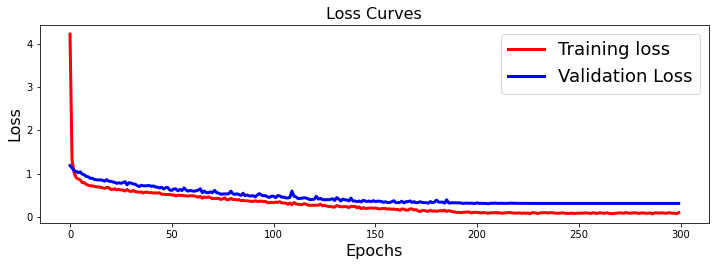

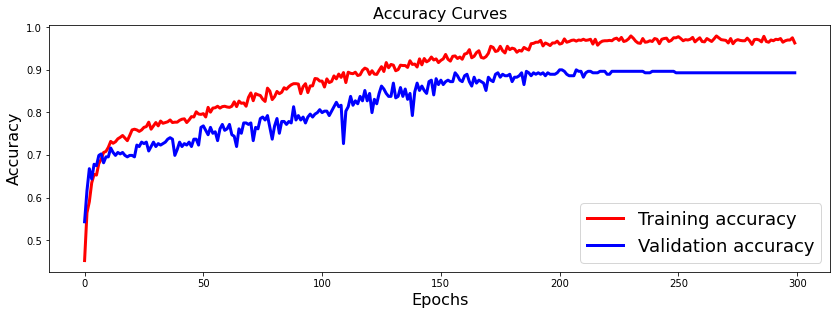

In [ ]:
drawTrainLossCurves(history)

In [ ]:
import tensorflow as tf
loadedCNNModel = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/CNN2')
predictions = loadedCNNModel.predict(x_test_CNN, verbose=1)

y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions): 
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
    
print(classification_report(y_pred, y_true))

10/10 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

    artifact       1.00      0.94      0.97        35
    extrahls       0.92      0.75      0.83        16
  extrastole       0.76      0.87      0.81        15
      murmur       0.88      0.88      0.88        86
      normal       0.89      0.91      0.90       137

    accuracy                           0.89       289
   macro avg       0.89      0.87      0.88       289
weighted avg       0.89      0.89      0.89       289



In [6]:
def performance(name,model,xtest,ytest):
  scores = model.evaluate(xtest, ytest, verbose=1)
  predictions = model.predict(xtest, verbose=1)
  if name != "":
    model.save(name)
  y_true, y_pred = [],[]
  y_trueInd,y_predInd = [],[]
  classes = ['artifact', 'extrahls', 'extrastole', 'murmur', 'normal']
  for idx, prediction in enumerate(predictions):
      y_trueInd.append(np.argmax(ytest[idx]))
      y_predInd.append(np.argmax(prediction))
      y_true.append(classes[np.argmax(ytest[idx])])
      y_pred.append(classes[np.argmax(prediction)])

  print(classification_report(y_pred, y_true))
  skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
  plt.xticks(rotation=50)
  plt.show( )
  return scores

10/10 [==============================] - 0s 8ms/step
              precision    recall  f1-score   support

    artifact       1.00      0.94      0.97        35
    extrahls       0.92      0.75      0.83        16
  extrastole       0.76      0.87      0.81        15
      murmur       0.88      0.88      0.88        86
      normal       0.89      0.91      0.90       137

    accuracy                           0.89       289
   macro avg       0.89      0.87      0.88       289
weighted avg       0.89      0.89      0.89       289



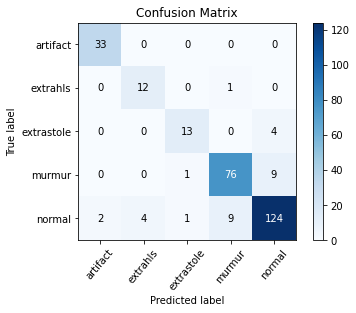

In [ ]:
performance("",model,x_test_CNN,y_test)

In [ ]:
dnn = tf.keras.models.Sequential()
dnn.add(tf.keras.Input(shape=(x_train.shape[1],x_train.shape[2])))
dnn.add(tf.keras.layers.Dense(256, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(128, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(64, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(32, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(256, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(128, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(64, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(32, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(64, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(tf.keras.layers.Dense(32, activation='relu'))
dnn.add(Dropout(0.2))
dnn.add(Flatten())
dnn.add(tf.keras.layers.Dense(5,activation = 'softmax'))
dnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 40, 256)           33536     
                                                                 
 dropout_12 (Dropout)        (None, 40, 256)           0         
                                                                 
 dense_12 (Dense)            (None, 40, 128)           32896     
                                                                 
 dropout_13 (Dropout)        (None, 40, 128)           0         
                                                                 
 dense_13 (Dense)            (None, 40, 64)            8256      
                                                                 
 dropout_14 (Dropout)        (None, 40, 64)            0         
                                                                 
 dense_14 (Dense)            (None, 40, 32)           

In [ ]:
dnn.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc'])
MAX_PATIENT=12
MAX_EPOCHS=200
MAX_BATCH=32

best_model_file3 = '/content/drive/MyDrive/heartbeat-sounds/DNN2'
# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file3, monitor='loss', verbose=1, save_best_only=True)]


print ("training started..... please wait.")
# training
history=dnn.fit(x_train, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(x_test, y_test),
                  callbacks=callback)

training started..... please wait.

Epoch 1: loss improved from inf to 1.32898, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 2: loss improved from 1.32898 to 1.21186, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 3: loss improved from 1.21186 to 1.17333, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 4: loss improved from 1.17333 to 1.10617, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 5: loss did not improve from 1.10617

Epoch 6: loss improved from 1.10617 to 1.03927, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 7: loss improved from 1.03927 to 1.03306, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 8: loss improved from 1.03306 to 0.97581, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 9: loss improved from 0.97581 to 0.96470, saving model to /content/drive/MyDrive/heartbeat-sounds/DNN2

Epoch 10: loss improved from 0.96470 to 0.94

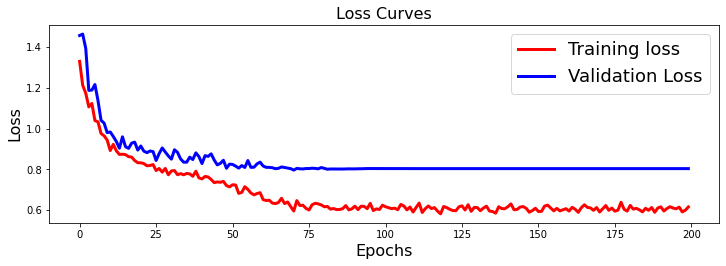

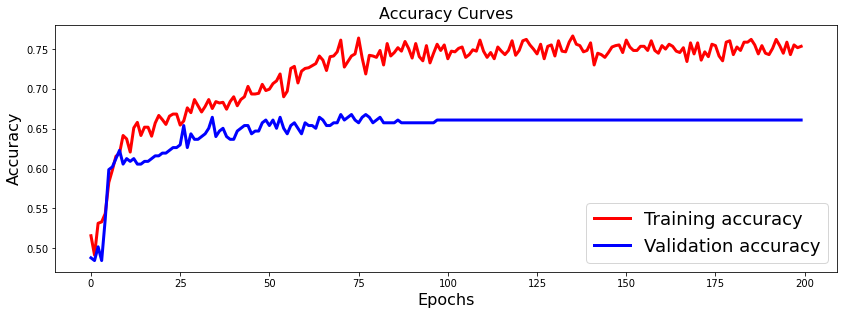

In [ ]:
drawTrainLossCurves(history)

10/10 [==============================] - 1s 10ms/step
              precision    recall  f1-score   support

    artifact       0.88      0.88      0.88        33
    extrahls       0.92      0.55      0.69        22
  extrastole       0.06      1.00      0.11         1
      murmur       0.22      1.00      0.36        19
      normal       0.93      0.61      0.73       214

    accuracy                           0.66       289
   macro avg       0.60      0.81      0.55       289
weighted avg       0.87      0.66      0.72       289



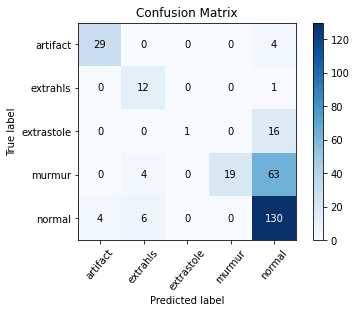

In [ ]:
performance("",dnn,x_test,y_test)

In [ ]:
LSTM_model = Sequential()
LSTM_model.add(LSTM(units=64, dropout=0.05, recurrent_dropout=0.20, return_sequences=True,input_shape = (x_train.shape[1],x_train.shape[2])))
LSTM_model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.20, return_sequences=True))
LSTM_model.add(LSTM(units=32, dropout=0.05, recurrent_dropout=0.20, return_sequences=False))
LSTM_model.add(Dense(5, activation='softmax'))
LSTM_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 40, 64)            49920     
                                                                 
 lstm_7 (LSTM)               (None, 40, 32)            12416     
                                                                 
 lstm_8 (LSTM)               (None, 32)                8320      
                                                                 
 dense_24 (Dense)            (None, 5)                 165       
                                                                 
Total params: 70,821
Trainable params: 70,821
Non-trainable params: 0
_________________________________________________________________


In [ ]:
LSTM_model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc'])
MAX_PATIENT=12
MAX_EPOCHS=150
MAX_BATCH=32

best_model_file2 = '/content/drive/MyDrive/heartbeat-sounds/LSTM2'
# callbacks
# removed EarlyStopping(patience=MAX_PATIENT)
callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
          ModelCheckpoint(filepath=best_model_file2, monitor='loss', verbose=1, save_best_only=True)]


print ("training started..... please wait.")
# training
history=LSTM_model.fit(x_train, y_train, 
                  batch_size=MAX_BATCH, 
                  epochs=MAX_EPOCHS,
                  verbose=0,
                  validation_data=(x_test, y_test),
                  callbacks=callback)

training started..... please wait.

Epoch 1: loss improved from inf to 1.35904, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 2: loss improved from 1.35904 to 1.06655, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 3: loss improved from 1.06655 to 0.94365, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 4: loss improved from 0.94365 to 0.86958, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 5: loss improved from 0.86958 to 0.79787, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 6: loss improved from 0.79787 to 0.75153, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 7: loss improved from 0.75153 to 0.69226, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 8: loss improved from 0.69226 to 0.64760, saving model to /content/drive/MyDrive/heartbeat-sounds/LSTM2

Epoch 9: loss improved from 0.64760 to 0.59094, saving model to /content/drive/M

In [ ]:
import tensorflow as tf
loadedLSTMModel = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/LSTM2')
predictions = loadedLSTMModel.predict(x_test, verbose=1)

y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions): 
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
    
print(classification_report(y_pred, y_true))

10/10 [==============================] - 1s 35ms/step
              precision    recall  f1-score   support

    artifact       0.85      0.90      0.88        31
    extrahls       0.54      0.54      0.54        13
  extrastole       0.00      0.00      0.00         3
      murmur       0.43      0.64      0.51        58
      normal       0.82      0.62      0.71       184

    accuracy                           0.65       289
   macro avg       0.53      0.54      0.53       289
weighted avg       0.72      0.65      0.67       289



In [ ]:
testDataset = []
for folder in ["/content/drive/MyDrive/heartbeat-sounds/set_a/**","/content/drive/MyDrive/heartbeat-sounds/set_b/**"]:
    for filename in glob.iglob(folder):
        if os.path.exists(filename):
            label = os.path.basename(filename).split("_")[0]
            duration = librosa.get_duration(filename=filename)
            # skip audio smaller than 3 secs
            if duration>=3:
                if label not in ["Aunlabelledtest", "Bunlabelledtest"]:
                      testDataset.append({
                              "filename": filename,
                              "label": label,
                          })
                       
                        
testDataset = pd.DataFrame(testDataset)
testDataset = shuffle(testDataset, random_state=25)
testDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 23 to 132
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  462 non-null    object
 1   label     462 non-null    object
dtypes: object(2)
memory usage: 10.8+ KB


In [ ]:
trainNew, testNew = train_test_split(testDataset, test_size=0.35, random_state=42)

print("Train: %i" % len(trainNew))
print("Test: %i" % len(testNew))

Train: 300
Test: 162


In [ ]:
import tensorflow as tf
import librosa
from collections import defaultdict
import numpy as np

In [ ]:
def eachQuantumPrediction(filepath,offset,model):
  quantum = np.asarray(extract_features(filepath,offset))
  quantum = quantum.reshape(1, quantum.shape[0], quantum.shape[1], 1)
  return np.argmax(model.predict(quantum)[0])


In [ ]:
def samplePrediction(filepath, model):
  duration = librosa.get_duration(filename=filepath)
  slice_size = 3
  iterations = int((duration-slice_size)/(slice_size-1))
  iterations += 1
  initial_offset = (duration - ((iterations*(slice_size-1))+1))/2
  maxi = -1
  maxCount = 0
  hmap = defaultdict(int)
  for i in range(iterations):
      offset = initial_offset + i*(slice_size-1)
      predNum = eachQuantumPrediction(filepath,offset,model)
      hmap[predNum] += 1
      if hmap[predNum] > maxCount:
        maxCount = hmap[predNum]
        maxi = predNum
  return maxi
  

In [ ]:
def samplesPrediction(model):
  y_true, y_pred = [],[]
  classes = encoder.classes_
  for idx in tqdm(range(len(testNew))):
    y_pred.append(classes[samplePrediction(testNew.filename.iloc[idx],model)])
    y_true.append(testNew.label.iloc[idx])
  print(classification_report(y_pred, y_true))
  skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
  plt.xticks(rotation=50)
  plt.show()

  0%|          | 0/162 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 1/162 [00:00<01:03,  2.53it/s]

1/1 [==============================] - 0s 27ms/step


  1%|          | 2/162 [00:01<01:30,  1.76it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 3/162 [00:01<01:01,  2.60it/s]

1/1 [==============================] - 0s 27ms/step


  2%|▏         | 4/162 [00:01<01:11,  2.22it/s]

1/1 [==============================] - 0s 26ms/step


  3%|▎         | 5/162 [00:02<01:34,  1.66it/s]

1/1 [==============================] - 0s 26ms/step


  4%|▎         | 6/162 [00:02<01:11,  2.19it/s]

1/1 [==============================] - 0s 30ms/step


  4%|▍         | 7/162 [00:03<01:26,  1.79it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 8/162 [00:04<01:40,  1.54it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 9/162 [00:04<01:33,  1.64it/s]

1/1 [==============================] - 0s 26ms/step


  6%|▌         | 10/162 [00:05<01:37,  1.57it/s]

1/1 [==============================] - 0s 31ms/step


  7%|▋         | 11/162 [00:06<01:38,  1.53it/s]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 12/162 [00:07<01:47,  1.40it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 13/162 [00:07<01:44,  1.42it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▊         | 14/162 [00:08<01:40,  1.48it/s]

1/1 [==============================] - 0s 37ms/step


  9%|▉         | 15/162 [00:09<01:36,  1.53it/s]

1/1 [==============================] - 0s 39ms/step


 10%|▉         | 16/162 [00:09<01:44,  1.39it/s]

1/1 [==============================] - 0s 42ms/step


 10%|█         | 17/162 [00:11<01:59,  1.22it/s]

1/1 [==============================] - 0s 62ms/step


 11%|█         | 18/162 [00:12<02:12,  1.09it/s]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 19/162 [00:13<02:08,  1.11it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▏        | 20/162 [00:14<02:19,  1.02it/s]

1/1 [==============================] - 0s 27ms/step


 13%|█▎        | 21/162 [00:15<02:32,  1.08s/it]

1/1 [==============================] - 0s 30ms/step


 14%|█▎        | 22/162 [00:16<02:08,  1.09it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 23/162 [00:16<01:36,  1.44it/s]

1/1 [==============================] - 0s 28ms/step


 15%|█▍        | 24/162 [00:16<01:14,  1.84it/s]

1/1 [==============================] - 0s 35ms/step


 15%|█▌        | 25/162 [00:17<01:42,  1.34it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 26/162 [00:19<02:08,  1.06it/s]

1/1 [==============================] - 0s 30ms/step


 17%|█▋        | 27/162 [00:19<01:36,  1.40it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 28/162 [00:20<01:47,  1.25it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 29/162 [00:20<01:42,  1.30it/s]

1/1 [==============================] - 0s 29ms/step


 19%|█▊        | 30/162 [00:21<01:45,  1.25it/s]

1/1 [==============================] - 0s 34ms/step


 19%|█▉        | 31/162 [00:22<01:41,  1.29it/s]

1/1 [==============================] - 0s 38ms/step


 20%|█▉        | 32/162 [00:23<02:01,  1.07it/s]

1/1 [==============================] - 0s 63ms/step


 20%|██        | 33/162 [00:25<02:26,  1.14s/it]

1/1 [==============================] - 0s 32ms/step


 21%|██        | 34/162 [00:26<02:18,  1.08s/it]

1/1 [==============================] - 0s 32ms/step


 22%|██▏       | 35/162 [00:27<02:15,  1.07s/it]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 36/162 [00:27<01:40,  1.25it/s]

1/1 [==============================] - 0s 32ms/step


 23%|██▎       | 37/162 [00:27<01:16,  1.62it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 38/162 [00:27<00:59,  2.08it/s]

1/1 [==============================] - 0s 35ms/step


 24%|██▍       | 39/162 [00:28<01:13,  1.68it/s]

1/1 [==============================] - 0s 30ms/step


 25%|██▍       | 40/162 [00:29<01:03,  1.93it/s]

1/1 [==============================] - 0s 27ms/step


 25%|██▌       | 41/162 [00:29<01:12,  1.67it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 42/162 [00:31<01:52,  1.07it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 43/162 [00:32<01:54,  1.04it/s]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 44/162 [00:33<01:38,  1.19it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 45/162 [00:33<01:26,  1.35it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 46/162 [00:34<01:24,  1.38it/s]

1/1 [==============================] - 0s 41ms/step


 29%|██▉       | 47/162 [00:35<01:22,  1.40it/s]

1/1 [==============================] - 0s 37ms/step


 30%|██▉       | 48/162 [00:38<02:35,  1.36s/it]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 49/162 [00:38<01:54,  1.01s/it]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 50/162 [00:39<01:59,  1.07s/it]

1/1 [==============================] - 0s 28ms/step


 31%|███▏      | 51/162 [00:39<01:38,  1.12it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 52/162 [00:40<01:25,  1.28it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 53/162 [00:40<01:05,  1.67it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 54/162 [00:40<00:51,  2.12it/s]

1/1 [==============================] - 0s 47ms/step


 34%|███▍      | 55/162 [00:41<00:47,  2.23it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 56/162 [00:41<00:38,  2.74it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 57/162 [00:41<00:37,  2.79it/s]

1/1 [==============================] - 0s 33ms/step


 36%|███▌      | 58/162 [00:42<00:45,  2.31it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▋      | 59/162 [00:43<01:07,  1.52it/s]

1/1 [==============================] - 0s 38ms/step


 37%|███▋      | 60/162 [00:44<01:10,  1.44it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 61/162 [00:44<00:59,  1.71it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 62/162 [00:45<01:03,  1.57it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 63/162 [00:45<01:00,  1.64it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 64/162 [00:46<00:58,  1.69it/s]

1/1 [==============================] - 0s 29ms/step


 40%|████      | 65/162 [00:47<00:59,  1.63it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 66/162 [00:47<00:46,  2.09it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████▏     | 67/162 [00:47<00:52,  1.82it/s]

1/1 [==============================] - 0s 27ms/step


 42%|████▏     | 68/162 [00:48<00:58,  1.62it/s]

1/1 [==============================] - 0s 31ms/step


 43%|████▎     | 69/162 [00:48<00:44,  2.08it/s]

1/1 [==============================] - 0s 32ms/step


 43%|████▎     | 70/162 [00:49<00:40,  2.27it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 71/162 [00:49<00:33,  2.74it/s]

1/1 [==============================] - 0s 71ms/step


 44%|████▍     | 72/162 [00:50<00:40,  2.21it/s]

1/1 [==============================] - 0s 38ms/step


 45%|████▌     | 73/162 [00:50<00:35,  2.51it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▌     | 74/162 [00:51<00:47,  1.85it/s]

1/1 [==============================] - 0s 47ms/step


 46%|████▋     | 75/162 [00:52<01:09,  1.24it/s]

1/1 [==============================] - 0s 29ms/step


 47%|████▋     | 76/162 [00:53<01:12,  1.18it/s]

1/1 [==============================] - 0s 36ms/step


 48%|████▊     | 77/162 [00:58<02:43,  1.93s/it]

1/1 [==============================] - 0s 39ms/step


 48%|████▊     | 78/162 [00:58<02:15,  1.62s/it]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 79/162 [00:59<01:47,  1.29s/it]

1/1 [==============================] - 0s 33ms/step


 49%|████▉     | 80/162 [01:00<01:31,  1.11s/it]

1/1 [==============================] - 0s 36ms/step


 50%|█████     | 81/162 [01:00<01:17,  1.05it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 82/162 [01:01<01:11,  1.12it/s]

1/1 [==============================] - 0s 40ms/step


 51%|█████     | 83/162 [01:01<00:54,  1.46it/s]

1/1 [==============================] - 0s 34ms/step


 52%|█████▏    | 84/162 [01:02<00:53,  1.45it/s]

1/1 [==============================] - 0s 39ms/step


 52%|█████▏    | 85/162 [01:02<00:41,  1.84it/s]

1/1 [==============================] - 0s 55ms/step


 53%|█████▎    | 86/162 [01:04<01:14,  1.02it/s]

1/1 [==============================] - 0s 42ms/step


 54%|█████▎    | 87/162 [01:04<00:59,  1.27it/s]

1/1 [==============================] - 0s 81ms/step


 54%|█████▍    | 88/162 [01:05<01:03,  1.16it/s]

1/1 [==============================] - 0s 79ms/step


 55%|█████▍    | 89/162 [01:06<00:51,  1.41it/s]

1/1 [==============================] - 0s 52ms/step


 56%|█████▌    | 90/162 [01:07<01:03,  1.13it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████▌    | 91/162 [01:08<01:12,  1.02s/it]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 92/162 [01:09<00:56,  1.24it/s]

1/1 [==============================] - 0s 66ms/step


 57%|█████▋    | 93/162 [01:09<00:44,  1.55it/s]

1/1 [==============================] - 0s 41ms/step


 58%|█████▊    | 94/162 [01:10<00:46,  1.47it/s]

1/1 [==============================] - 0s 37ms/step


 59%|█████▊    | 95/162 [01:11<00:53,  1.25it/s]

1/1 [==============================] - 0s 38ms/step


 59%|█████▉    | 96/162 [01:12<00:51,  1.29it/s]

1/1 [==============================] - 0s 122ms/step


 60%|█████▉    | 97/162 [01:14<01:13,  1.13s/it]

1/1 [==============================] - 0s 36ms/step


 60%|██████    | 98/162 [01:14<00:57,  1.11it/s]

1/1 [==============================] - 0s 36ms/step


 61%|██████    | 99/162 [01:14<00:43,  1.46it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 100/162 [01:15<00:49,  1.25it/s]

1/1 [==============================] - 0s 52ms/step


 62%|██████▏   | 101/162 [01:16<00:44,  1.36it/s]

1/1 [==============================] - 0s 34ms/step


 63%|██████▎   | 102/162 [01:16<00:33,  1.77it/s]

1/1 [==============================] - 0s 36ms/step


 64%|██████▎   | 103/162 [01:16<00:26,  2.20it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▍   | 104/162 [01:17<00:31,  1.82it/s]

1/1 [==============================] - 0s 38ms/step


 65%|██████▍   | 105/162 [01:17<00:27,  2.04it/s]

1/1 [==============================] - 0s 32ms/step


 65%|██████▌   | 106/162 [01:18<00:37,  1.48it/s]

1/1 [==============================] - 0s 40ms/step


 66%|██████▌   | 107/162 [01:19<00:34,  1.61it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 108/162 [01:20<00:43,  1.25it/s]

1/1 [==============================] - 0s 51ms/step


 67%|██████▋   | 109/162 [01:21<00:38,  1.39it/s]

1/1 [==============================] - 0s 37ms/step


 68%|██████▊   | 110/162 [01:22<00:54,  1.04s/it]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 111/162 [01:23<00:39,  1.28it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 112/162 [01:23<00:37,  1.33it/s]

1/1 [==============================] - 0s 35ms/step


 70%|██████▉   | 113/162 [01:24<00:43,  1.12it/s]

1/1 [==============================] - 0s 28ms/step


 70%|███████   | 114/162 [01:25<00:32,  1.48it/s]

1/1 [==============================] - 0s 45ms/step


 71%|███████   | 115/162 [01:25<00:27,  1.72it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 116/162 [01:26<00:30,  1.48it/s]

1/1 [==============================] - 0s 29ms/step


 72%|███████▏  | 117/162 [01:26<00:25,  1.74it/s]

1/1 [==============================] - 0s 28ms/step


 73%|███████▎  | 118/162 [01:26<00:20,  2.19it/s]

1/1 [==============================] - 0s 35ms/step


 73%|███████▎  | 119/162 [01:27<00:23,  1.84it/s]

1/1 [==============================] - 0s 34ms/step


 74%|███████▍  | 120/162 [01:29<00:37,  1.11it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 121/162 [01:30<00:35,  1.17it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 122/162 [01:31<00:34,  1.16it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 123/162 [01:31<00:31,  1.23it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 124/162 [01:32<00:27,  1.39it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 125/162 [01:32<00:25,  1.44it/s]

1/1 [==============================] - 0s 41ms/step


 78%|███████▊  | 126/162 [01:33<00:23,  1.51it/s]

1/1 [==============================] - 0s 54ms/step


 78%|███████▊  | 127/162 [01:34<00:25,  1.37it/s]

1/1 [==============================] - 0s 31ms/step


 79%|███████▉  | 128/162 [01:34<00:20,  1.67it/s]

1/1 [==============================] - 0s 42ms/step


 80%|███████▉  | 129/162 [01:35<00:27,  1.21it/s]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 130/162 [01:36<00:23,  1.34it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████  | 131/162 [01:37<00:23,  1.33it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 132/162 [01:37<00:18,  1.59it/s]

1/1 [==============================] - 0s 33ms/step


 82%|████████▏ | 133/162 [01:38<00:18,  1.54it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 134/162 [01:38<00:14,  1.95it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 135/162 [01:38<00:11,  2.43it/s]

1/1 [==============================] - 0s 27ms/step


 84%|████████▍ | 136/162 [01:39<00:10,  2.55it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▍ | 137/162 [01:39<00:12,  2.04it/s]

1/1 [==============================] - 0s 26ms/step


 85%|████████▌ | 138/162 [01:39<00:09,  2.53it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 139/162 [01:40<00:08,  2.61it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▋ | 140/162 [01:41<00:13,  1.59it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 141/162 [01:42<00:12,  1.64it/s]

1/1 [==============================] - 0s 26ms/step


 88%|████████▊ | 142/162 [01:42<00:13,  1.54it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 143/162 [01:43<00:11,  1.60it/s]

1/1 [==============================] - 0s 32ms/step


 89%|████████▉ | 144/162 [01:43<00:10,  1.64it/s]

1/1 [==============================] - 0s 27ms/step


 90%|████████▉ | 145/162 [01:44<00:10,  1.55it/s]

1/1 [==============================] - 0s 31ms/step


 90%|█████████ | 146/162 [01:45<00:09,  1.76it/s]

1/1 [==============================] - 0s 26ms/step


 91%|█████████ | 147/162 [01:45<00:09,  1.52it/s]

1/1 [==============================] - 0s 41ms/step


 91%|█████████▏| 148/162 [01:47<00:12,  1.10it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 149/162 [01:48<00:12,  1.00it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 150/162 [01:49<00:13,  1.09s/it]

1/1 [==============================] - 0s 26ms/step


 93%|█████████▎| 151/162 [01:50<00:11,  1.02s/it]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 152/162 [01:51<00:08,  1.15it/s]

1/1 [==============================] - 0s 29ms/step


 94%|█████████▍| 153/162 [01:52<00:07,  1.21it/s]

1/1 [==============================] - 0s 37ms/step


 95%|█████████▌| 154/162 [01:52<00:05,  1.46it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 155/162 [01:52<00:04,  1.70it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▋| 156/162 [01:53<00:03,  1.77it/s]

1/1 [==============================] - 0s 34ms/step


 97%|█████████▋| 157/162 [01:53<00:02,  1.77it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 158/162 [01:54<00:02,  1.62it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 159/162 [01:55<00:01,  1.70it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 160/162 [01:55<00:00,  2.17it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 161/162 [01:55<00:00,  2.63it/s]

1/1 [==============================] - 0s 27ms/step


100%|██████████| 162/162 [01:55<00:00,  1.40it/s]

              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00        12
    extrahls       1.00      1.00      1.00         5
  extrastole       1.00      0.82      0.90        11
      murmur       0.97      0.95      0.96        40
      normal       0.97      1.00      0.98        94

    accuracy                           0.98       162
   macro avg       0.99      0.95      0.97       162
weighted avg       0.98      0.98      0.97       162



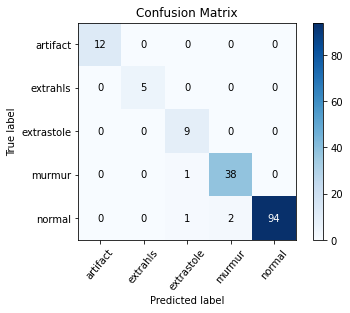

In [ ]:
samplesPrediction(tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/CNN2'))

##Function for creating Frames for chunks just through quotient and reminder method




In [7]:
def create_frames(slice_size):
  dataset = []
  for folder in ["/content/drive/MyDrive/heartbeat-sounds/set_a/**","/content/drive/MyDrive/heartbeat-sounds/set_b/**"]:
      for filename in glob.iglob(folder):
          if os.path.exists(filename):
              label = os.path.basename(filename).split("_")[0]
              duration = librosa.get_duration(filename=filename)
              # skip audio smaller than 3 secs
              if duration>=slice_size:
                  iterations = int(duration // slice_size)
                  reminder = duration % slice_size
                  if label not in ["Aunlabelledtest", "Bunlabelledtest"]:
                      for i in range(iterations):
                          offset = i*slice_size
                          dataset.append({
                                  "filename": filename,
                                  "label": label,
                                  "offset": offset
                              })
                  if label not in ["Aunlabelledtest", "Bunlabelledtest"] and ((reminder and slice_size == 2) or (reminder >= slice_size-2 and slice_size != 2)):
                    dataset.append({
                                  "filename": filename,
                                  "label": label,
                                  "offset": int(duration)-slice_size
                              })
                        
                          
  dataset = pd.DataFrame(dataset)
  dataset = shuffle(dataset, random_state=42)
  return dataset

In [ ]:
createFrames(5).info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 620 entries, 49 to 102
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  620 non-null    object
 1   label     620 non-null    object
 2   offset    620 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 19.4+ KB


###Visualising data distribution

In [8]:
def data_visualisation(dataset):
  plt.figure(figsize=(12,6))
  dataset.label.value_counts().plot(kind='bar', title='Dataset distribution')
  plt.show(),len(dataset)

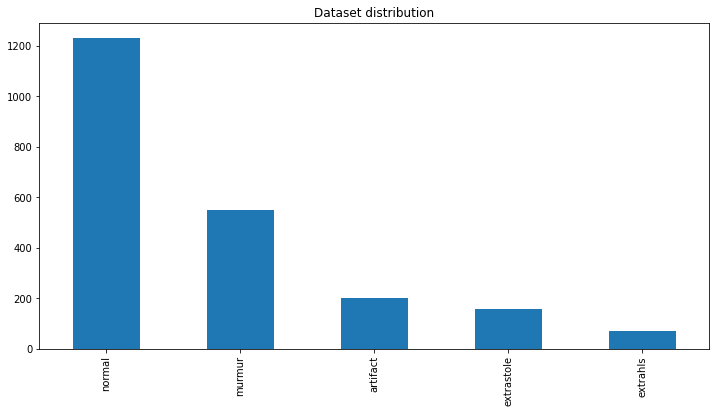

In [ ]:
data_visualisation(createFrames(2))

##Function for train_test_split with preprocessing

In [9]:
from tensorflow.keras.utils import to_categorical

def train_test_split_of_data(dataset,duration):
  train, test = train_test_split(dataset, test_size=0.3, random_state=42)
  x_train = []
  x_test = []

  for idx in tqdm(range(len(train))):
      temp = extract_features(train.filename.iloc[idx],train.offset.iloc[idx],duration)
      x_train.append(temp)

  for idx in tqdm(range(len(test))):
      x_test.append(extract_features(test.filename.iloc[idx],test.offset.iloc[idx],duration))
      
  x_test = np.asarray(x_test)
  x_train = np.asarray(x_train)

  x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
  x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

  encoder = LabelEncoder()
  encoder.fit(train.label)
  print(encoder.classes_)
  y_train = encoder.transform(train.label)
  y_test = encoder.transform(test.label)

  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)

  print("X train:", x_train.shape)
  print("X test:", x_test.shape)
  print("Y train:", y_train.shape)
  print("Y test:",y_test.shape)
  return x_train, x_test, y_train, y_test

##Creating and training the model along with validation

In [10]:
def create_and_train_model(x_train,x_test,y_train,y_test,chunk_size,name = ''):
  model = Sequential()
  model.add(Conv2D(filters=32, kernel_size=2, input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]), activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.2))

  model.add(Conv2D(filters=256, kernel_size=2, activation='relu'))
  model.add(MaxPooling2D(pool_size=2))
  model.add(Dropout(0.5))
  model.add(GlobalAveragePooling2D())

  model.add(Dense(5, activation='softmax'))
  model.summary()
  model.compile(loss='categorical_crossentropy', optimizer='Adamax', metrics=['acc'])
  MAX_PATIENT=12
  MAX_EPOCHS=300
  MAX_BATCH=32

  best_model_file = f'/content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize{chunk_size}{name}'
  # callbacks
  # removed EarlyStopping(patience=MAX_PATIENT)
  callback=[ReduceLROnPlateau(patience=MAX_PATIENT, verbose=1),
            ModelCheckpoint(filepath=best_model_file, monitor='loss', verbose=1, save_best_only=True)]


  print ("training started..... please wait.")
  # training
  history=model.fit(x_train, y_train, 
                    batch_size=MAX_BATCH, 
                    epochs=MAX_EPOCHS,
                    verbose=0,
                    validation_data=(x_test, y_test),
                    callbacks=callback)
  return model, history

In [ ]:
# drawTrainLossCurves(history)
# performance("",dnn,x_test,y_test)

# Performing operations on model that accept chunk size 2 and creating frames through quotient and reminder

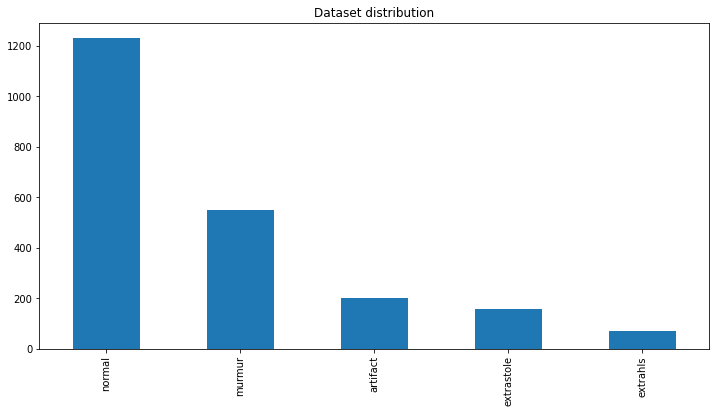

                                               filename   label  offset
855   /content/drive/MyDrive/heartbeat-sounds/set_b/...  murmur      14
1546  /content/drive/MyDrive/heartbeat-sounds/set_b/...  normal       0
1473  /content/drive/MyDrive/heartbeat-sounds/set_b/...  normal       2
430   /content/drive/MyDrive/heartbeat-sounds/set_a/...  normal       7
1557  /content/drive/MyDrive/heartbeat-sounds/set_b/...  normal       1
...                                                 ...     ...     ...
1638  /content/drive/MyDrive/heartbeat-sounds/set_b/...  normal       6
1095  /content/drive/MyDrive/heartbeat-sounds/set_b/...  murmur       8
1130  /content/drive/MyDrive/heartbeat-sounds/set_b/...  normal       4
1294  /content/drive/MyDrive/heartbeat-sounds/set_b/...  normal       0
860   /content/drive/MyDrive/heartbeat-sounds/set_b/...  murmur       2

[2210 rows x 3 columns]


In [ ]:
dataset = create_frames(2)
data_visualisation(dataset)
print(dataset)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split_of_data(dataset, 2)

100%|██████████| 663/663 [00:09<00:00, 68.01it/s]

['artifact' 'extrahls' 'extrastole' 'murmur' 'normal']
X train: (1547, 40, 87, 1)
X test: (663, 40, 87, 1)
Y train: (1547, 5)
Y test: (663, 5)


In [ ]:
model_size_two,history_size_two = create_and_train_model(x_train,x_test,y_train,y_test,2)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 86, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 43, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 43, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 42, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 21, 64)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 21, 64)         0


Epoch 2: loss improved from 5.88409 to 1.44367, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 3: loss improved from 1.44367 to 1.08541, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 4: loss improved from 1.08541 to 0.98839, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 5: loss improved from 0.98839 to 0.94955, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 6: loss improved from 0.94955 to 0.86987, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 7: loss improved from 0.86987 to 0.86656, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 8: loss improved from 0.86656 to 0.85580, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 9: loss improved from 0.85580 to 0.80182, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 10: loss did not improve from 0.80182

Epoch 11: loss improved from 0.80182 to 0.78206, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 12: loss improved from 0.78206 to 0.77436, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 13: loss improved from 0.77436 to 0.75636, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 14: loss did not improve from 0.75636

Epoch 15: loss improved from 0.75636 to 0.75405, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 16: loss did not improve from 0.75405

Epoch 17: loss improved from 0.75405 to 0.72451, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 18: loss improved from 0.72451 to 0.70972, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 19: loss did not improve from 0.70972

Epoch 20: loss improved from 0.70972 to 0.70053, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 21: loss did not improve from 0.70053

Epoch 22: loss did not improve from 0.70053

Epoch 23: loss improved from 0.70053 to 0.68940, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 24: loss did not improve from 0.68940

Epoch 25: loss improved from 0.68940 to 0.68418, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 26: loss improved from 0.68418 to 0.66556, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 27: loss improved from 0.66556 to 0.66170, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 28: loss did not improve from 0.66170

Epoch 29: loss improved from 0.66170 to 0.66166, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 30: loss improved from 0.66166 to 0.65569, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 31: loss improved from 0.65569 to 0.65010, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 32: loss did not improve from 0.65010

Epoch 33: loss improved from 0.65010 to 0.63126, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 34: loss improved from 0.63126 to 0.62925, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 35: loss did not improve from 0.62925

Epoch 36: loss improved from 0.62925 to 0.62218, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 37: loss did not improve from 0.62218

Epoch 38: loss did not improve from 0.62218

Epoch 39: loss improved from 0.62218 to 0.60526, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 40: loss did not improve from 0.60526

Epoch 41: loss did not improve from 0.60526

Epoch 42: loss did not improve from 0.60526

Epoch 43: loss did not improve from 0.60526

Epoch 44: loss improved from 0.60526 to 0.59247, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 45: loss did not improve from 0.59247

Epoch 46: loss did not improve from 0.59247

Epoch 47: loss improved from 0.59247 to 0.58345, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 48: loss did not improve from 0.58345

Epoch 49: loss did not improve from 0.58345

Epoch 50: loss improved from 0.58345 to 0.58238, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 51: loss improved from 0.58238 to 0.56859, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 52: loss did not improve from 0.56859

Epoch 53: loss did not improve from 0.56859

Epoch 54: loss improved from 0.56859 to 0.55431, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 55: loss did not improve from 0.55431

Epoch 56: loss did not improve from 0.55431

Epoch 57: loss did not improve from 0.55431

Epoch 58: loss improved from 0.55431 to 0.54235, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 59: loss did not improve from 0.54235

Epoch 60: loss improved from 0.54235 to 0.53880, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 61: loss did not improve from 0.53880

Epoch 62: loss improved from 0.53880 to 0.53155, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 63: loss did not improve from 0.53155

Epoch 64: loss did not improve from 0.53155

Epoch 65: loss improved from 0.53155 to 0.51578, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 66: loss did not improve from 0.51578

Epoch 67: loss did not improve from 0.51578

Epoch 68: loss improved from 0.51578 to 0.51223, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 69: loss improved from 0.51223 to 0.50309, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 70: loss improved from 0.50309 to 0.49897, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 71: loss improved from 0.49897 to 0.49379, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 72: loss did not improve from 0.49379

Epoch 73: loss did not improve from 0.49379

Epoch 74: loss did not improve from 0.49379

Epoch 75: loss improved from 0.49379 to 0.49012, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 76: loss improved from 0.49012 to 0.48296, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 77: loss improved from 0.48296 to 0.46703, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 78: loss did not improve from 0.46703

Epoch 79: loss did not improve from 0.46703

Epoch 80: loss did not improve from 0.46703

Epoch 81: loss did not improve from 0.46703

Epoch 82: loss improved from 0.46703 to 0.46001, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 83: loss did not improve from 0.46001

Epoch 84: loss improved from 0.46001 to 0.44446, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 85: loss improved from 0.44446 to 0.43745, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 86: loss did not improve from 0.43745

Epoch 87: loss did not improve from 0.43745

Epoch 88: loss did not improve from 0.43745

Epoch 89: loss improved from 0.43745 to 0.43389, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 90: loss improved from 0.43389 to 0.41772, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 91: loss did not improve from 0.41772

Epoch 92: loss improved from 0.41772 to 0.41695, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 93: loss improved from 0.41695 to 0.40196, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 94: loss did not improve from 0.40196

Epoch 95: loss did not improve from 0.40196

Epoch 96: loss did not improve from 0.40196

Epoch 97: loss did not improve from 0.40196

Epoch 98: loss did not improve from 0.40196

Epoch 99: loss did not improve from 0.40196

Epoch 100: loss improved from 0.40196 to 0.39255, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 101: loss did not improve from 0.39255

Epoch 102: loss did not improve from 0.39255

Epoch 103: loss improved from 0.39255 to 0.37887, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 104: loss improved from 0.37887 to 0.35471, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 105: loss did not improve from 0.35471

Epoch 106: loss did not improve from 0.35471

Epoch 107: loss did not improve from 0.35471

Epoch 108: loss did not improve from 0.35471

Epoch 109: loss did not improve from 0.35471

Epoch 110: loss improved from 0.35471 to 0.35375, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 111: loss did not improve from 0.35375

Epoch 112: loss did not improve from 0.35375

Epoch 113: loss did not improve from 0.35375

Epoch 114: loss improved from 0.35375 to 0.34413, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 115: loss improved from 0.34413 to 0.33945, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 116: loss did not improve from 0.33945

Epoch 117: loss did not improve from 0.33945

Epoch 118: loss improved from 0.33945 to 0.33923, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 119: loss improved from 0.33923 to 0.33054, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 120: loss improved from 0.33054 to 0.32316, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 121: loss did not improve from 0.32316

Epoch 122: loss did not improve from 0.32316

Epoch 123: loss did not improve from 0.32316

Epoch 124: loss improved from 0.32316 to 0.30994, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 125: loss improved from 0.30994 to 0.30513, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 126: loss did not improve from 0.30513

Epoch 127: loss improved from 0.30513 to 0.30379, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 128: loss did not improve from 0.30379

Epoch 129: loss improved from 0.30379 to 0.30360, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 130: loss did not improve from 0.30360

Epoch 131: loss improved from 0.30360 to 0.29229, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 132: loss did not improve from 0.29229

Epoch 133: loss did not improve from 0.29229

Epoch 134: loss improved from 0.29229 to 0.28453, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 135: loss did not improve from 0.28453

Epoch 136: loss did not improve from 0.28453

Epoch 137: loss improved from 0.28453 to 0.27320, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 138: loss did not improve from 0.27320

Epoch 139: loss did not improve from 0.27320

Epoch 140: loss did not improve from 0.27320

Epoch 141: loss improved from 0.27320 to 0.26973, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 142: loss did not improve from 0.26973

Epoch 143: loss did not improve from 0.26973

Epoch 144: loss improved from 0.26973 to 0.25360, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 145: loss improved from 0.25360 to 0.24778, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 146: loss improved from 0.24778 to 0.23326, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 147: loss did not improve from 0.23326

Epoch 148: loss did not improve from 0.23326

Epoch 149: loss did not improve from 0.23326

Epoch 150: loss did not improve from 0.23326

Epoch 151: loss did not improve from 0.23326

Epoch 152: loss did not improve from 0.23326

Epoch 153: loss improved from 0.23326 to 0.22944, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 154: loss improved from 0.22944 to 0.22688, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 155: loss did not improve from 0.22688

Epoch 156: loss did not improve from 0.22688

Epoch 157: loss improved from 0.22688 to 0.21573, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 158: loss did not improve from 0.21573

Epoch 159: loss did not improve from 0.21573

Epoch 160: loss improved from 0.21573 to 0.20191, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 161: loss did not improve from 0.20191

Epoch 162: loss did not improve from 0.20191

Epoch 163: loss did not improve from 0.20191

Epoch 164: loss did not improve from 0.20191

Epoch 165: loss did not improve from 0.20191

Epoch 166: loss improved from 0.20191 to 0.19866, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 167: loss did not improve from 0.19866

Epoch 168: loss improved from 0.19866 to 0.19755, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 169: loss did not improve from 0.19755

Epoch 170: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 170: loss improved from 0.19755 to 0.18999, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 171: loss improved from 0.18999 to 0.18411, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 172: loss did not improve from 0.18411

Epoch 173: loss improved from 0.18411 to 0.17005, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 174: loss improved from 0.17005 to 0.16777, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 175: loss did not improve from 0.16777

Epoch 176: loss did not improve from 0.16777

Epoch 177: loss improved from 0.16777 to 0.16422, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 178: loss improved from 0.16422 to 0.16315, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 179: loss did not improve from 0.16315

Epoch 180: loss did not improve from 0.16315

Epoch 181: loss did not improve from 0.16315

Epoch 182: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 182: loss improved from 0.16315 to 0.15906, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 183: loss improved from 0.15906 to 0.15399, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 184: loss did not improve from 0.15399

Epoch 185: loss did not improve from 0.15399

Epoch 186: loss did not improve from 0.15399

Epoch 187: loss improved from 0.15399 to 0.15267, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 188: loss did not improve from 0.15267

Epoch 189: loss did not improve from 0.15267

Epoch 190: loss did not improve from 0.15267

Epoch 191: loss did not improve from 0.15267

Epoch 192: loss did not improve from 0.15267

Epoch 193: loss did not improve from 0.15267

Epoch 194: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 194: loss did not improve from 0.15267

Epoch 195: loss improved from 0.15267 to 0.14757, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2



Epoch 196: loss did not improve from 0.14757

Epoch 197: loss did not improve from 0.14757

Epoch 198: loss did not improve from 0.14757

Epoch 199: loss did not improve from 0.14757

Epoch 200: loss did not improve from 0.14757

Epoch 201: loss did not improve from 0.14757

Epoch 202: loss did not improve from 0.14757

Epoch 203: loss did not improve from 0.14757

Epoch 204: loss did not improve from 0.14757

Epoch 205: loss did not improve from 0.14757

Epoch 206: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 206: loss did not improve from 0.14757

Epoch 207: loss did not improve from 0.14757

Epoch 208: loss did not improve from 0.14757

Epoch 209: loss did not improve from 0.14757

Epoch 210: loss did not improve from 0.14757

Epoch 211: loss did not improve from 0.14757

Epoch 212: loss did not improve from 0.14757

Epoch 213: loss did not improve from 0.14757

Epoch 214: loss did not improve from 0.14757

Epoch 215: loss did not improve from 0.14757



Epoch 217: loss did not improve from 0.14409

Epoch 218: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 218: loss did not improve from 0.14409

Epoch 219: loss did not improve from 0.14409

Epoch 220: loss did not improve from 0.14409

Epoch 221: loss did not improve from 0.14409

Epoch 222: loss did not improve from 0.14409

Epoch 223: loss did not improve from 0.14409

Epoch 224: loss did not improve from 0.14409

Epoch 225: loss did not improve from 0.14409

Epoch 226: loss did not improve from 0.14409

Epoch 227: loss did not improve from 0.14409

Epoch 228: loss did not improve from 0.14409

Epoch 229: loss did not improve from 0.14409

Epoch 230: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-09.

Epoch 230: loss did not improve from 0.14409

Epoch 231: loss did not improve from 0.14409

Epoch 232: loss did not improve from 0.14409

Epoch 233: loss did not improve from 0.14409

Epoch 234: loss did not improve from 0.14409

Epoch 235: lo

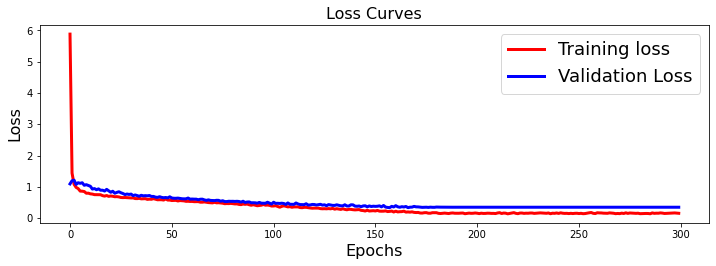

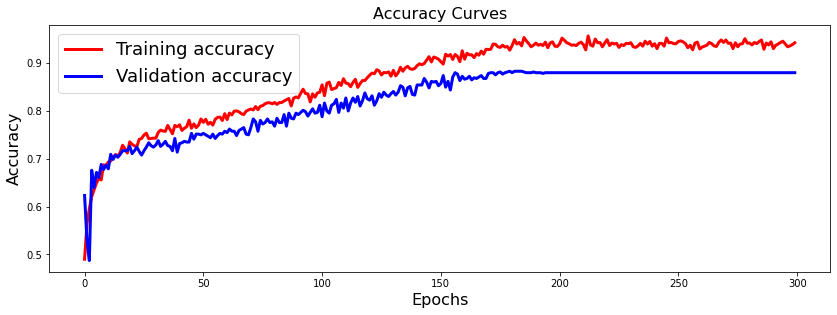

21/21 [==============================] - 0s 2ms/step
[[1.6355125e-07 6.5778164e-05 4.7650851e-02 3.8790274e-02 9.1349292e-01]
 [1.2661694e-09 2.4224322e-11 1.3095085e-04 3.6321697e-05 9.9983275e-01]
 [1.9829407e-01 3.7341902e-04 8.4400503e-03 7.3027653e-01 6.2615991e-02]
 ...
 [3.9199053e-06 3.3556432e-06 9.8269908e-03 5.2439859e-03 9.8492175e-01]
 [9.0993756e-01 4.5659724e-03 5.4509879e-08 1.8126718e-04 8.5315146e-02]
 [9.9999499e-01 1.2407567e-12 4.6825779e-11 1.1257647e-07 4.8611937e-06]]
              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00        67
    extrahls       0.62      0.95      0.75        19
  extrastole       0.55      0.92      0.69        38
      murmur       0.83      0.88      0.86       143
      normal       0.96      0.85      0.90       396

    accuracy                           0.88       663
   macro avg       0.79      0.92      0.84       663
weighted avg       0.90      0.88      0.88       663



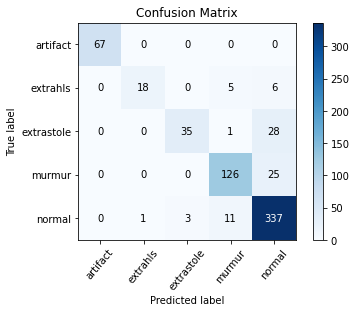

In [ ]:
drawTrainLossCurves(history_size_two)
performance("",model_size_two,x_test,y_test)

# Performing operations on model that accept chunk size 3 and creating frames through quotient and reminder

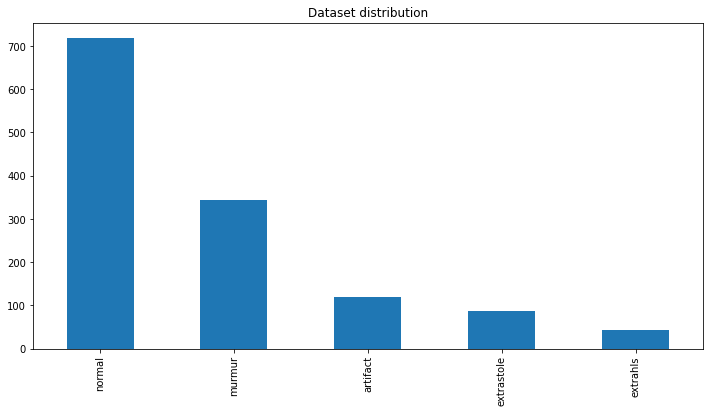

100%|██████████| 395/395 [00:07<00:00, 51.37it/s]


['artifact' 'extrahls' 'extrastole' 'murmur' 'normal']
X train: (919, 40, 130, 1)
X test: (395, 40, 130, 1)
Y train: (919, 5)
Y test: (395, 5)
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 39, 129, 32)       160       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 19, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 19, 64, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 18, 63, 64)        8256      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 9, 31, 64)        0         
 g2D)                                      


Epoch 2: loss improved from 2.89092 to 1.17180, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 3: loss improved from 1.17180 to 0.99061, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 4: loss improved from 0.99061 to 0.91399, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 5: loss improved from 0.91399 to 0.89808, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 6: loss improved from 0.89808 to 0.85539, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 7: loss improved from 0.85539 to 0.80449, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 8: loss improved from 0.80449 to 0.79360, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 9: loss improved from 0.79360 to 0.78272, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 10: loss improved from 0.78272 to 0.74666, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 11: loss did not improve from 0.74666

Epoch 12: loss did not improve from 0.74666

Epoch 13: loss did not improve from 0.74666

Epoch 14: loss improved from 0.74666 to 0.71513, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 15: loss improved from 0.71513 to 0.71234, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 16: loss improved from 0.71234 to 0.71082, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 17: loss did not improve from 0.71082

Epoch 18: loss improved from 0.71082 to 0.70850, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 19: loss improved from 0.70850 to 0.68755, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 20: loss did not improve from 0.68755

Epoch 21: loss did not improve from 0.68755

Epoch 22: loss improved from 0.68755 to 0.68132, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 23: loss improved from 0.68132 to 0.65268, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 24: loss did not improve from 0.65268

Epoch 25: loss did not improve from 0.65268

Epoch 26: loss did not improve from 0.65268

Epoch 27: loss improved from 0.65268 to 0.62935, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 28: loss did not improve from 0.62935

Epoch 29: loss did not improve from 0.62935

Epoch 30: loss did not improve from 0.62935

Epoch 31: loss did not improve from 0.62935

Epoch 32: loss did not improve from 0.62935

Epoch 33: loss improved from 0.62935 to 0.62474, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 34: loss improved from 0.62474 to 0.61845, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 35: loss did not improve from 0.61845

Epoch 36: loss improved from 0.61845 to 0.59718, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 37: loss did not improve from 0.59718

Epoch 38: loss did not improve from 0.59718

Epoch 39: loss did not improve from 0.59718

Epoch 40: loss did not improve from 0.59718

Epoch 41: loss did not improve from 0.59718

Epoch 42: loss improved from 0.59718 to 0.59502, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 43: loss improved from 0.59502 to 0.58738, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 44: loss did not improve from 0.58738

Epoch 45: loss improved from 0.58738 to 0.58540, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 46: loss improved from 0.58540 to 0.58272, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 47: loss did not improve from 0.58272

Epoch 48: loss improved from 0.58272 to 0.56846, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 49: loss improved from 0.56846 to 0.56411, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 50: loss did not improve from 0.56411

Epoch 51: loss improved from 0.56411 to 0.54394, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 52: loss did not improve from 0.54394

Epoch 53: loss did not improve from 0.54394

Epoch 54: loss did not improve from 0.54394

Epoch 55: loss did not improve from 0.54394

Epoch 56: loss did not improve from 0.54394

Epoch 57: loss did not improve from 0.54394

Epoch 58: loss improved from 0.54394 to 0.52590, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 59: loss did not improve from 0.52590

Epoch 60: loss did not improve from 0.52590

Epoch 61: loss improved from 0.52590 to 0.51669, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 62: loss did not improve from 0.51669

Epoch 63: loss did not improve from 0.51669

Epoch 64: loss did not improve from 0.51669

Epoch 65: loss did not improve from 0.51669

Epoch 66: loss did not improve from 0.51669

Epoch 67: loss improved from 0.51669 to 0.51102, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 68: loss did not improve from 0.51102

Epoch 69: loss did not improve from 0.51102

Epoch 70: loss improved from 0.51102 to 0.48854, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 71: loss did not improve from 0.48854

Epoch 72: loss improved from 0.48854 to 0.47076, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 73: loss did not improve from 0.47076

Epoch 74: loss did not improve from 0.47076

Epoch 75: loss did not improve from 0.47076

Epoch 76: loss did not improve from 0.47076

Epoch 77: loss did not improve from 0.47076

Epoch 78: loss did not improve from 0.47076

Epoch 79: loss did not improve from 0.47076

Epoch 80: loss did not improve from 0.47076

Epoch 81: loss did not improve from 0.47076

Epoch 82: loss improved from 0.47076 to 0.45201, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 83: loss improved from 0.45201 to 0.44534, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 84: loss did not improve from 0.44534

Epoch 85: loss did not improve from 0.44534

Epoch 86: loss did not improve from 0.44534

Epoch 87: loss did not improve from 0.44534

Epoch 88: loss improved from 0.44534 to 0.44118, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 89: loss improved from 0.44118 to 0.43595, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 90: loss did not improve from 0.43595

Epoch 91: loss did not improve from 0.43595

Epoch 92: loss improved from 0.43595 to 0.42476, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 93: loss improved from 0.42476 to 0.41922, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 94: loss did not improve from 0.41922

Epoch 95: loss did not improve from 0.41922

Epoch 96: loss improved from 0.41922 to 0.41507, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 97: loss did not improve from 0.41507

Epoch 98: loss did not improve from 0.41507

Epoch 99: loss did not improve from 0.41507

Epoch 100: loss improved from 0.41507 to 0.41104, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 101: loss improved from 0.41104 to 0.39589, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 102: loss did not improve from 0.39589

Epoch 103: loss improved from 0.39589 to 0.39575, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 104: loss improved from 0.39575 to 0.38352, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 105: loss did not improve from 0.38352

Epoch 106: loss did not improve from 0.38352

Epoch 107: loss did not improve from 0.38352

Epoch 108: loss improved from 0.38352 to 0.37583, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 109: loss did not improve from 0.37583

Epoch 110: loss improved from 0.37583 to 0.37362, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 111: loss did not improve from 0.37362

Epoch 112: loss improved from 0.37362 to 0.37282, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 113: loss improved from 0.37282 to 0.36895, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 114: loss improved from 0.36895 to 0.36138, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 115: loss did not improve from 0.36138

Epoch 116: loss did not improve from 0.36138

Epoch 117: loss improved from 0.36138 to 0.35267, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 118: loss improved from 0.35267 to 0.34860, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 119: loss did not improve from 0.34860

Epoch 120: loss did not improve from 0.34860

Epoch 121: loss improved from 0.34860 to 0.34173, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 122: loss did not improve from 0.34173

Epoch 123: loss improved from 0.34173 to 0.34152, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 124: loss improved from 0.34152 to 0.33003, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 125: loss did not improve from 0.33003

Epoch 126: loss did not improve from 0.33003

Epoch 127: loss did not improve from 0.33003

Epoch 128: loss improved from 0.33003 to 0.31890, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 129: loss improved from 0.31890 to 0.31557, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 130: loss did not improve from 0.31557

Epoch 131: loss did not improve from 0.31557

Epoch 132: loss improved from 0.31557 to 0.29989, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 133: loss did not improve from 0.29989

Epoch 134: loss did not improve from 0.29989

Epoch 135: loss did not improve from 0.29989

Epoch 136: loss did not improve from 0.29989

Epoch 137: loss did not improve from 0.29989

Epoch 138: loss improved from 0.29989 to 0.27861, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 139: loss did not improve from 0.27861

Epoch 140: loss did not improve from 0.27861

Epoch 141: loss did not improve from 0.27861

Epoch 142: loss did not improve from 0.27861

Epoch 143: loss did not improve from 0.27861

Epoch 144: loss did not improve from 0.27861

Epoch 145: loss did not improve from 0.27861

Epoch 146: loss improved from 0.27861 to 0.26877, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 147: loss did not improve from 0.26877

Epoch 148: loss did not improve from 0.26877

Epoch 149: loss improved from 0.26877 to 0.25642, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 150: loss improved from 0.25642 to 0.25391, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 151: loss did not improve from 0.25391

Epoch 152: loss did not improve from 0.25391

Epoch 153: loss did not improve from 0.25391

Epoch 154: loss did not improve from 0.25391

Epoch 155: loss did not improve from 0.25391

Epoch 156: loss improved from 0.25391 to 0.25162, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 157: loss improved from 0.25162 to 0.22558, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 158: loss did not improve from 0.22558

Epoch 159: loss did not improve from 0.22558

Epoch 160: loss did not improve from 0.22558

Epoch 161: loss did not improve from 0.22558

Epoch 162: loss did not improve from 0.22558

Epoch 163: loss improved from 0.22558 to 0.21626, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 164: loss did not improve from 0.21626

Epoch 165: loss did not improve from 0.21626

Epoch 166: loss did not improve from 0.21626

Epoch 167: loss did not improve from 0.21626

Epoch 168: loss did not improve from 0.21626

Epoch 169: loss did not improve from 0.21626

Epoch 170: loss improved from 0.21626 to 0.20438, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 171: loss did not improve from 0.20438

Epoch 172: loss did not improve from 0.20438

Epoch 173: loss did not improve from 0.20438

Epoch 174: loss did not improve from 0.20438

Epoch 175: loss did not improve from 0.20438

Epoch 176: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 176: loss improved from 0.20438 to 0.19346, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 177: loss improved from 0.19346 to 0.18166, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 178: loss did not improve from 0.18166

Epoch 179: loss improved from 0.18166 to 0.17439, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 180: loss did not improve from 0.17439

Epoch 181: loss did not improve from 0.17439

Epoch 182: loss did not improve from 0.17439

Epoch 183: loss did not improve from 0.17439

Epoch 184: loss did not improve from 0.17439

Epoch 185: loss improved from 0.17439 to 0.17418, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 186: loss did not improve from 0.17418

Epoch 187: loss did not improve from 0.17418

Epoch 188: loss did not improve from 0.17418

Epoch 189: loss did not improve from 0.17418

Epoch 190: loss did not improve from 0.17418

Epoch 191: loss did not improve from 0.17418

Epoch 192: loss improved from 0.17418 to 0.16644, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 193: loss did not improve from 0.16644

Epoch 194: loss did not improve from 0.16644

Epoch 195: loss did not improve from 0.16644

Epoch 196: loss did not improve from 0.16644

Epoch 197: loss did not improve from 0.16644

Epoch 198: loss did not improve from 0.16644

Epoch 199: loss did not improve from 0.16644

Epoch 200: loss did not improve from 0.16644

Epoch 201: loss did not improve from 0.16644

Epoch 202: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 202: loss did not improve from 0.16644

Epoch 203: loss did not improve from 0.16644

Epoch 204: loss did not improve from 0.16644

Epoch 205: loss improved from 0.16644 to 0.16347, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 206: loss did not improve from 0.16347

Epoch 207: loss did not improve from 0.16347

Epoch 208: loss did not improve from 0.16347

Epoch 209: loss improved from 0.16347 to 0.15871, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 210: loss improved from 0.15871 to 0.14951, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3



Epoch 211: loss did not improve from 0.14951

Epoch 212: loss did not improve from 0.14951

Epoch 213: loss did not improve from 0.14951

Epoch 214: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 214: loss did not improve from 0.14951

Epoch 215: loss did not improve from 0.14951

Epoch 216: loss did not improve from 0.14951

Epoch 217: loss did not improve from 0.14951

Epoch 218: loss did not improve from 0.14951

Epoch 219: loss did not improve from 0.14951

Epoch 220: loss did not improve from 0.14951

Epoch 221: loss did not improve from 0.14951

Epoch 222: loss did not improve from 0.14951

Epoch 223: loss did not improve from 0.14951

Epoch 224: loss did not improve from 0.14951

Epoch 225: loss did not improve from 0.14951

Epoch 226: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 226: loss did not improve from 0.14951

Epoch 227: loss did not improve from 0.14951

Epoch 228: loss did not improve from 0.14951

Epoch 229: 


Epoch 281: loss did not improve from 0.14807

Epoch 282: loss did not improve from 0.14807

Epoch 283: loss did not improve from 0.14807

Epoch 284: loss did not improve from 0.14807

Epoch 285: loss did not improve from 0.14807

Epoch 286: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-12.

Epoch 286: loss did not improve from 0.14807

Epoch 287: loss did not improve from 0.14807

Epoch 288: loss did not improve from 0.14807

Epoch 289: loss did not improve from 0.14807

Epoch 290: loss did not improve from 0.14807

Epoch 291: loss did not improve from 0.14807

Epoch 292: loss did not improve from 0.14807

Epoch 293: loss did not improve from 0.14807

Epoch 294: loss did not improve from 0.14807

Epoch 295: loss did not improve from 0.14807

Epoch 296: loss did not improve from 0.14807

Epoch 297: loss did not improve from 0.14807

Epoch 298: ReduceLROnPlateau reducing learning rate to 1.0000001044244145e-13.

Epoch 298: loss did not improve from 0.14807

Epoch 299: l

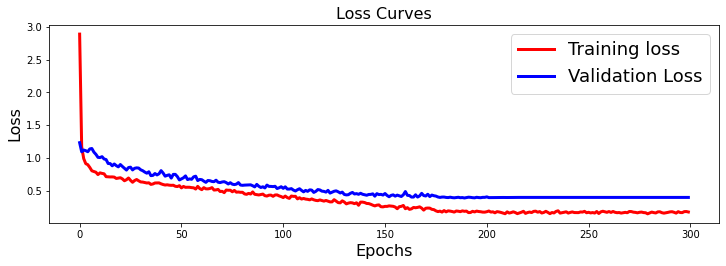

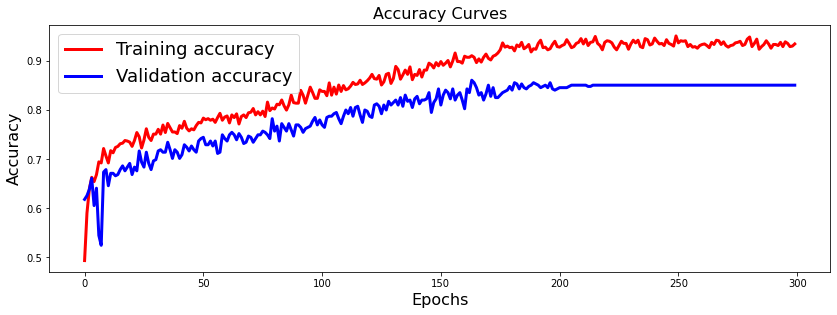

13/13 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

    artifact       0.94      1.00      0.97        29
    extrahls       0.88      0.70      0.78        20
  extrastole       0.47      0.61      0.53        23
      murmur       0.85      0.89      0.87       105
      normal       0.89      0.85      0.87       218

    accuracy                           0.85       395
   macro avg       0.80      0.81      0.80       395
weighted avg       0.86      0.85      0.85       395



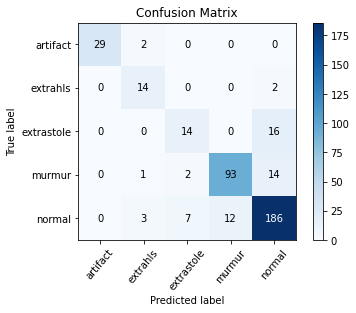

[0.3982853293418884, 0.850632905960083]

In [ ]:
dataset = create_frames(3)
data_visualisation(dataset)
x_train, x_test, y_train, y_test = train_test_split_of_data(dataset, 3)
model_size_three,history_size_three = create_and_train_model(x_train,x_test,y_train,y_test,3)
drawTrainLossCurves(history_size_three)
performance("",model_size_three,x_test,y_test)

# Performing operations on model that accept chunk size 4 and creating frames through quotient and reminder

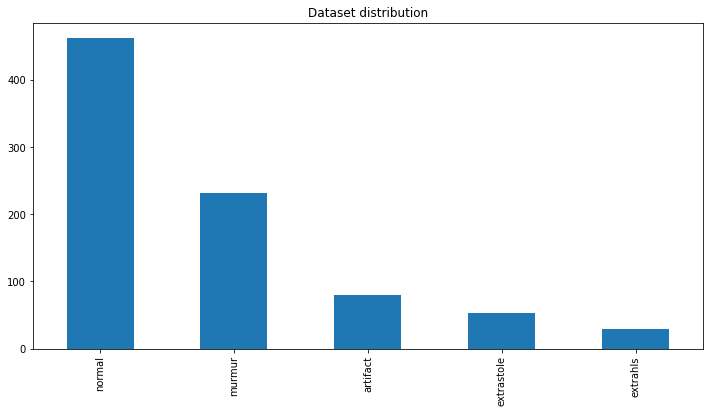

100%|██████████| 257/257 [00:04<00:00, 60.90it/s]


['artifact' 'extrahls' 'extrastole' 'murmur' 'normal']
X train: (598, 40, 173, 1)
X test: (257, 40, 173, 1)
Y train: (598, 5)
Y test: (257, 5)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 39, 172, 32)       160       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 19, 86, 32)       0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 19, 86, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 18, 85, 64)        8256      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 9, 42, 64)        0         
 2D)                                       


Epoch 2: loss improved from 8.42057 to 4.18736, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 3: loss improved from 4.18736 to 2.37240, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 4: loss improved from 2.37240 to 1.72768, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 5: loss improved from 1.72768 to 1.22230, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 6: loss improved from 1.22230 to 1.01064, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 7: loss did not improve from 1.01064

Epoch 8: loss did not improve from 1.01064

Epoch 9: loss improved from 1.01064 to 0.96579, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 10: loss improved from 0.96579 to 0.88780, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 11: loss did not improve from 0.88780

Epoch 12: loss improved from 0.88780 to 0.83106, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 13: loss did not improve from 0.83106

Epoch 14: loss improved from 0.83106 to 0.81345, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 15: loss did not improve from 0.81345

Epoch 16: loss did not improve from 0.81345

Epoch 17: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 17: loss improved from 0.81345 to 0.80756, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 18: loss improved from 0.80756 to 0.76944, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 19: loss improved from 0.76944 to 0.74442, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 20: loss did not improve from 0.74442

Epoch 21: loss did not improve from 0.74442

Epoch 22: loss did not improve from 0.74442

Epoch 23: loss did not improve from 0.74442

Epoch 24: loss did not improve from 0.74442

Epoch 25: loss did not improve from 0.74442

Epoch 26: loss did not improve from 0.74442

Epoch 27: loss did not improve from 0.74442

Epoch 28: loss did not improve from 0.74442

Epoch 29: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 29: loss did not improve from 0.74442

Epoch 30: loss did not improve from 0.74442

Epoch 31: loss did not improve from 0.74442

Epoch 32: loss did not improve from 0.74442

Epoch 33: loss did not improve from 0.74442

Epoch 34: loss did not improve from 0.74442

Epoch 35: loss did not improve from 0.74442

Epoch 36: loss improved from 0.74442 to 0.73510, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 37: loss did not improve from 0.73510

Epoch 38: loss did not improve from 0.73510

Epoch 39: loss did not improve from 0.73510

Epoch 40: loss did not improve from 0.73510

Epoch 41: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 41: loss did not improve from 0.73510

Epoch 42: loss did not improve from 0.73510

Epoch 43: loss improved from 0.73510 to 0.73105, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 44: loss improved from 0.73105 to 0.72435, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 45: loss did not improve from 0.72435

Epoch 46: loss did not improve from 0.72435

Epoch 47: loss did not improve from 0.72435

Epoch 48: loss did not improve from 0.72435

Epoch 49: loss did not improve from 0.72435

Epoch 50: loss did not improve from 0.72435

Epoch 51: loss did not improve from 0.72435

Epoch 52: loss did not improve from 0.72435

Epoch 53: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 53: loss did not improve from 0.72435

Epoch 54: loss did not improve from 0.72435

Epoch 55: loss improved from 0.72435 to 0.70739, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4



Epoch 56: loss did not improve from 0.70739

Epoch 57: loss did not improve from 0.70739

Epoch 58: loss did not improve from 0.70739

Epoch 59: loss did not improve from 0.70739

Epoch 60: loss did not improve from 0.70739

Epoch 61: loss did not improve from 0.70739

Epoch 62: loss did not improve from 0.70739

Epoch 63: loss did not improve from 0.70739

Epoch 64: loss did not improve from 0.70739

Epoch 65: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 65: loss did not improve from 0.70739

Epoch 66: loss did not improve from 0.70739

Epoch 67: loss did not improve from 0.70739

Epoch 68: loss did not improve from 0.70739

Epoch 69: loss did not improve from 0.70739

Epoch 70: loss did not improve from 0.70739

Epoch 71: loss did not improve from 0.70739

Epoch 72: loss did not improve from 0.70739

Epoch 73: loss did not improve from 0.70739

Epoch 74: loss did not improve from 0.70739

Epoch 75: loss did not improve from 0.70739

Epoch 76: loss did no

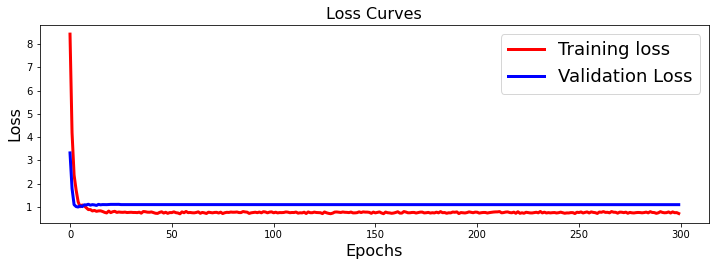

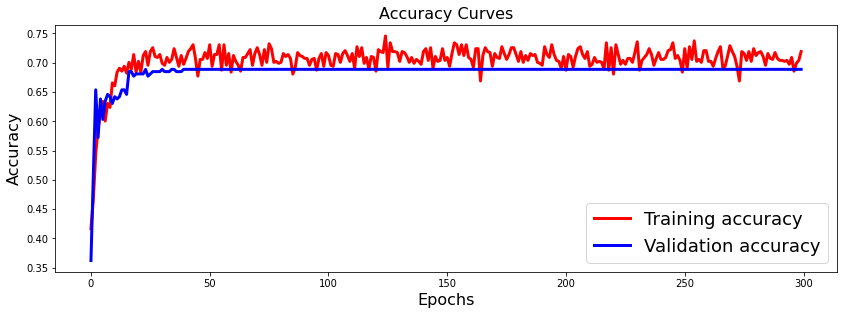

9/9 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

    artifact       1.00      0.87      0.93        23
    extrahls       1.00      0.42      0.59        26
  extrastole       0.00      0.00      0.00         0
      murmur       0.46      0.84      0.60        43
      normal       0.86      0.67      0.75       165

    accuracy                           0.69       257
   macro avg       0.66      0.56      0.57       257
weighted avg       0.82      0.69      0.73       257



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


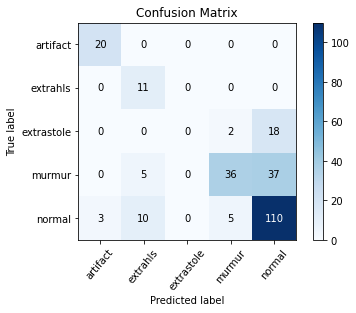

In [ ]:
dataset = create_frames(4)
data_visualisation(dataset)
x_train, x_test, y_train, y_test = train_test_split_of_data(dataset, 4)
model_size_four,history_size_four = create_and_train_model(x_train,x_test,y_train,y_test,4)
drawTrainLossCurves(history_size_four)
performance("",model_size_four,x_test,y_test)

##Creating Dataframes in another way

In [11]:
def create_frames_in_another_way(slice_size):
  dataset = []
  for folder in ["/content/drive/MyDrive/heartbeat-sounds/set_a/**","/content/drive/MyDrive/heartbeat-sounds/set_b/**"]:
      for filename in glob.iglob(folder):
          if os.path.exists(filename):
              label = os.path.basename(filename).split("_")[0]
              duration = librosa.get_duration(filename=filename)
              # skip audio smaller than 3 secs
              if duration>=slice_size:
                  iterations = int((duration-slice_size)/(slice_size-1))
                  iterations += 1
                  initial_offset = (duration - ((iterations*(slice_size-1))+1))/2
                  if label not in ["Aunlabelledtest", "Bunlabelledtest"]:
                      for i in range(iterations):
                          offset = initial_offset + i*(slice_size-1)
                          dataset.append({
                                  "filename": filename,
                                  "label": label,
                                  "offset": offset
                              })
                        
                          
  dataset = pd.DataFrame(dataset)
  dataset = shuffle(dataset, random_state=42)
  dataset.info()
  return dataset

## Performing operations on model that accept chunk size 3 and creating dataframes in another way

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1441 entries, 168 to 1126
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  1441 non-null   object 
 1   label     1441 non-null   object 
 2   offset    1441 non-null   float64
dtypes: float64(1), object(2)
memory usage: 45.0+ KB


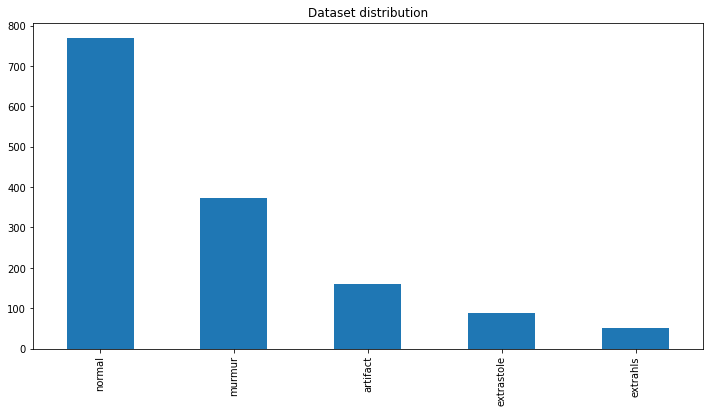

100%|██████████| 433/433 [00:06<00:00, 65.78it/s]


['artifact' 'extrahls' 'extrastole' 'murmur' 'normal']
X train: (1008, 40, 130, 1)
X test: (433, 40, 130, 1)
Y train: (1008, 5)
Y test: (433, 5)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 39, 129, 32)       160       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 19, 64, 32)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (None, 19, 64, 32)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 18, 63, 64)        8256      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 9, 31, 64)        0         
 g2D)                                    


Epoch 2: loss improved from 9.15272 to 1.96255, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 3: loss improved from 1.96255 to 1.29305, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 4: loss improved from 1.29305 to 1.20821, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 5: loss improved from 1.20821 to 1.01392, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 6: loss did not improve from 1.01392

Epoch 7: loss improved from 1.01392 to 0.96417, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 8: loss improved from 0.96417 to 0.92573, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 9: loss improved from 0.92573 to 0.90299, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 10: loss improved from 0.90299 to 0.82149, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 11: loss improved from 0.82149 to 0.80043, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 12: loss did not improve from 0.80043

Epoch 13: loss improved from 0.80043 to 0.77926, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 14: loss did not improve from 0.77926

Epoch 15: loss improved from 0.77926 to 0.75825, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 16: loss did not improve from 0.75825

Epoch 17: loss did not improve from 0.75825

Epoch 18: loss improved from 0.75825 to 0.69125, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 19: loss did not improve from 0.69125

Epoch 20: loss did not improve from 0.69125

Epoch 21: loss improved from 0.69125 to 0.68374, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 22: loss improved from 0.68374 to 0.66976, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 23: loss did not improve from 0.66976

Epoch 24: loss did not improve from 0.66976

Epoch 25: loss improved from 0.66976 to 0.66750, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 26: loss improved from 0.66750 to 0.66164, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 27: loss improved from 0.66164 to 0.64167, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 28: loss did not improve from 0.64167

Epoch 29: loss did not improve from 0.64167

Epoch 30: loss did not improve from 0.64167

Epoch 31: loss did not improve from 0.64167

Epoch 32: loss improved from 0.64167 to 0.62196, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 33: loss improved from 0.62196 to 0.60237, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 34: loss did not improve from 0.60237

Epoch 35: loss improved from 0.60237 to 0.60085, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 36: loss did not improve from 0.60085

Epoch 37: loss did not improve from 0.60085

Epoch 38: loss improved from 0.60085 to 0.59518, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 39: loss did not improve from 0.59518

Epoch 40: loss improved from 0.59518 to 0.59407, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 41: loss improved from 0.59407 to 0.58382, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 42: loss did not improve from 0.58382

Epoch 43: loss did not improve from 0.58382

Epoch 44: loss improved from 0.58382 to 0.56715, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 45: loss improved from 0.56715 to 0.56092, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 46: loss did not improve from 0.56092

Epoch 47: loss did not improve from 0.56092

Epoch 48: loss did not improve from 0.56092

Epoch 49: loss improved from 0.56092 to 0.54627, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 50: loss improved from 0.54627 to 0.53458, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 51: loss did not improve from 0.53458

Epoch 52: loss did not improve from 0.53458

Epoch 53: loss did not improve from 0.53458

Epoch 54: loss improved from 0.53458 to 0.51944, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 55: loss did not improve from 0.51944

Epoch 56: loss improved from 0.51944 to 0.51823, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 57: loss did not improve from 0.51823

Epoch 58: loss did not improve from 0.51823

Epoch 59: loss did not improve from 0.51823

Epoch 60: loss did not improve from 0.51823

Epoch 61: loss improved from 0.51823 to 0.51351, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 62: loss improved from 0.51351 to 0.50412, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 63: loss improved from 0.50412 to 0.49590, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 64: loss did not improve from 0.49590

Epoch 65: loss did not improve from 0.49590

Epoch 66: loss did not improve from 0.49590

Epoch 67: loss improved from 0.49590 to 0.48132, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 68: loss did not improve from 0.48132

Epoch 69: loss improved from 0.48132 to 0.47532, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 70: loss did not improve from 0.47532

Epoch 71: loss did not improve from 0.47532

Epoch 72: loss did not improve from 0.47532

Epoch 73: loss did not improve from 0.47532

Epoch 74: loss improved from 0.47532 to 0.47224, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 75: loss did not improve from 0.47224

Epoch 76: loss improved from 0.47224 to 0.46215, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 77: loss improved from 0.46215 to 0.44823, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 78: loss improved from 0.44823 to 0.44795, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 79: loss did not improve from 0.44795

Epoch 80: loss did not improve from 0.44795

Epoch 81: loss improved from 0.44795 to 0.44660, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 82: loss did not improve from 0.44660

Epoch 83: loss improved from 0.44660 to 0.43052, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 84: loss did not improve from 0.43052

Epoch 85: loss did not improve from 0.43052

Epoch 86: loss improved from 0.43052 to 0.42326, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 87: loss improved from 0.42326 to 0.42101, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 88: loss improved from 0.42101 to 0.41828, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 89: loss did not improve from 0.41828

Epoch 90: loss did not improve from 0.41828

Epoch 91: loss improved from 0.41828 to 0.41505, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 92: loss improved from 0.41505 to 0.40822, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 93: loss did not improve from 0.40822

Epoch 94: loss did not improve from 0.40822

Epoch 95: loss did not improve from 0.40822

Epoch 96: loss did not improve from 0.40822

Epoch 97: loss improved from 0.40822 to 0.39526, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 98: loss improved from 0.39526 to 0.38662, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 99: loss did not improve from 0.38662

Epoch 100: loss did not improve from 0.38662

Epoch 101: loss did not improve from 0.38662

Epoch 102: loss did not improve from 0.38662

Epoch 103: loss improved from 0.38662 to 0.36764, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 104: loss did not improve from 0.36764

Epoch 105: loss did not improve from 0.36764

Epoch 106: loss did not improve from 0.36764

Epoch 107: loss did not improve from 0.36764

Epoch 108: loss improved from 0.36764 to 0.36110, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 109: loss did not improve from 0.36110

Epoch 110: loss did not improve from 0.36110

Epoch 111: loss did not improve from 0.36110

Epoch 112: loss did not improve from 0.36110

Epoch 113: loss did not improve from 0.36110

Epoch 114: loss did not improve from 0.36110

Epoch 115: loss improved from 0.36110 to 0.36045, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 116: loss improved from 0.36045 to 0.32562, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 117: loss did not improve from 0.32562

Epoch 118: loss did not improve from 0.32562

Epoch 119: loss did not improve from 0.32562

Epoch 120: loss did not improve from 0.32562

Epoch 121: loss improved from 0.32562 to 0.31541, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 122: loss did not improve from 0.31541

Epoch 123: loss did not improve from 0.31541

Epoch 124: loss did not improve from 0.31541

Epoch 125: loss did not improve from 0.31541

Epoch 126: loss did not improve from 0.31541

Epoch 127: loss improved from 0.31541 to 0.31333, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 128: loss did not improve from 0.31333

Epoch 129: loss improved from 0.31333 to 0.28605, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 130: loss did not improve from 0.28605

Epoch 131: loss did not improve from 0.28605

Epoch 132: loss did not improve from 0.28605

Epoch 133: loss did not improve from 0.28605

Epoch 134: loss did not improve from 0.28605

Epoch 135: loss improved from 0.28605 to 0.27151, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 136: loss did not improve from 0.27151

Epoch 137: loss did not improve from 0.27151

Epoch 138: loss did not improve from 0.27151

Epoch 139: loss did not improve from 0.27151

Epoch 140: loss did not improve from 0.27151

Epoch 141: loss did not improve from 0.27151

Epoch 142: loss improved from 0.27151 to 0.25231, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 143: loss did not improve from 0.25231

Epoch 144: loss did not improve from 0.25231

Epoch 145: loss did not improve from 0.25231

Epoch 146: loss did not improve from 0.25231

Epoch 147: loss did not improve from 0.25231

Epoch 148: loss improved from 0.25231 to 0.24802, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 149: loss improved from 0.24802 to 0.24252, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 150: loss did not improve from 0.24252

Epoch 151: loss improved from 0.24252 to 0.23345, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 152: loss did not improve from 0.23345

Epoch 153: loss improved from 0.23345 to 0.23083, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 154: loss did not improve from 0.23083

Epoch 155: loss did not improve from 0.23083

Epoch 156: loss did not improve from 0.23083

Epoch 157: loss did not improve from 0.23083

Epoch 158: loss did not improve from 0.23083

Epoch 159: loss improved from 0.23083 to 0.22742, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 160: loss did not improve from 0.22742

Epoch 161: loss did not improve from 0.22742

Epoch 162: loss did not improve from 0.22742

Epoch 163: loss did not improve from 0.22742

Epoch 164: loss improved from 0.22742 to 0.18437, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 165: loss did not improve from 0.18437

Epoch 166: loss did not improve from 0.18437

Epoch 167: loss did not improve from 0.18437

Epoch 168: loss did not improve from 0.18437

Epoch 169: loss did not improve from 0.18437

Epoch 170: loss did not improve from 0.18437

Epoch 171: loss did not improve from 0.18437

Epoch 172: loss did not improve from 0.18437

Epoch 173: loss did not improve from 0.18437

Epoch 174: loss did not improve from 0.18437

Epoch 175: loss did not improve from 0.18437

Epoch 176: loss did not improve from 0.18437

Epoch 177: loss did not improve from 0.18437

Epoch 178: loss did not improve from 0.18437

Epoch 179: loss improved from 0.18437 to 0.17954, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 180: loss did not improve from 0.17954

Epoch 181: loss did not improve from 0.17954

Epoch 182: loss improved from 0.17954 to 0.17270, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 183: loss did not improve from 0.17270

Epoch 184: loss improved from 0.17270 to 0.17247, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 185: loss did not improve from 0.17247

Epoch 186: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 186: loss improved from 0.17247 to 0.16099, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 187: loss did not improve from 0.16099

Epoch 188: loss did not improve from 0.16099

Epoch 189: loss improved from 0.16099 to 0.14872, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 190: loss did not improve from 0.14872

Epoch 191: loss did not improve from 0.14872

Epoch 192: loss improved from 0.14872 to 0.13988, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 193: loss did not improve from 0.13988

Epoch 194: loss did not improve from 0.13988

Epoch 195: loss did not improve from 0.13988

Epoch 196: loss did not improve from 0.13988

Epoch 197: loss did not improve from 0.13988

Epoch 198: loss did not improve from 0.13988

Epoch 199: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 199: loss improved from 0.13988 to 0.13841, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 200: loss did not improve from 0.13841

Epoch 201: loss did not improve from 0.13841

Epoch 202: loss did not improve from 0.13841

Epoch 203: loss did not improve from 0.13841

Epoch 204: loss improved from 0.13841 to 0.13790, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 205: loss did not improve from 0.13790

Epoch 206: loss did not improve from 0.13790

Epoch 207: loss did not improve from 0.13790

Epoch 208: loss did not improve from 0.13790

Epoch 209: loss improved from 0.13790 to 0.13684, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 210: loss did not improve from 0.13684

Epoch 211: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 211: loss did not improve from 0.13684

Epoch 212: loss did not improve from 0.13684

Epoch 213: loss did not improve from 0.13684

Epoch 214: loss did not improve from 0.13684

Epoch 215: loss did not improve from 0.13684

Epoch 216: loss did not improve from 0.13684

Epoch 217: loss did not improve from 0.13684

Epoch 218: loss did not improve from 0.13684

Epoch 219: loss improved from 0.13684 to 0.13544, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 220: loss did not improve from 0.13544

Epoch 221: loss did not improve from 0.13544

Epoch 222: loss did not improve from 0.13544

Epoch 223: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 223: loss did not improve from 0.13544

Epoch 224: loss did not improve from 0.13544

Epoch 225: loss improved from 0.13544 to 0.13009, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 226: loss did not improve from 0.13009

Epoch 227: loss did not improve from 0.13009

Epoch 228: loss did not improve from 0.13009

Epoch 229: loss did not improve from 0.13009

Epoch 230: loss did not improve from 0.13009

Epoch 231: loss did not improve from 0.13009

Epoch 232: loss did not improve from 0.13009

Epoch 233: loss did not improve from 0.13009

Epoch 234: loss did not improve from 0.13009

Epoch 235: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-08.

Epoch 235: loss did not improve from 0.13009

Epoch 236: loss did not improve from 0.13009

Epoch 237: loss did not improve from 0.13009

Epoch 238: loss did not improve from 0.13009

Epoch 239: loss did not improve from 0.13009

Epoch 240: loss did not improve from 0.13009

Epoch 241: loss did not improve from 0.13009

Epoch 242: loss did not improve from 0.13009

Epoch 243: loss did not improve from 0.13009

Epoch 244: loss did not improve from 0.13009

Epoch 245: loss did not improve from 0.13009




Epoch 276: loss did not improve from 0.12684

Epoch 277: loss did not improve from 0.12684

Epoch 278: loss did not improve from 0.12684

Epoch 279: loss did not improve from 0.12684

Epoch 280: loss did not improve from 0.12684

Epoch 281: loss did not improve from 0.12684

Epoch 282: loss did not improve from 0.12684

Epoch 283: ReduceLROnPlateau reducing learning rate to 1.000000082740371e-12.

Epoch 283: loss did not improve from 0.12684

Epoch 284: loss did not improve from 0.12684

Epoch 285: loss improved from 0.12684 to 0.12488, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way



Epoch 286: loss did not improve from 0.12488

Epoch 287: loss did not improve from 0.12488

Epoch 288: loss did not improve from 0.12488

Epoch 289: loss did not improve from 0.12488

Epoch 290: loss did not improve from 0.12488

Epoch 291: loss did not improve from 0.12488

Epoch 292: loss did not improve from 0.12488

Epoch 293: loss did not improve from 0.12488

Epoch 294: loss did not improve from 0.12488

Epoch 295: ReduceLROnPlateau reducing learning rate to 1.0000001044244145e-13.

Epoch 295: loss did not improve from 0.12488

Epoch 296: loss did not improve from 0.12488

Epoch 297: loss did not improve from 0.12488

Epoch 298: loss did not improve from 0.12488

Epoch 299: loss did not improve from 0.12488

Epoch 300: loss did not improve from 0.12488


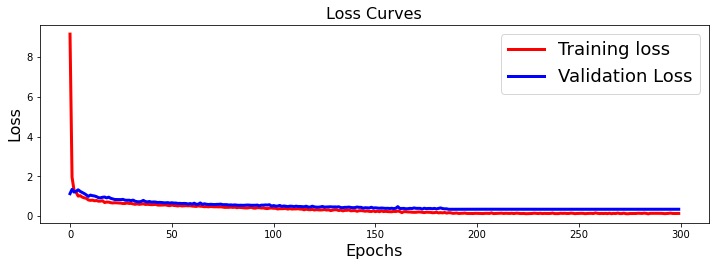

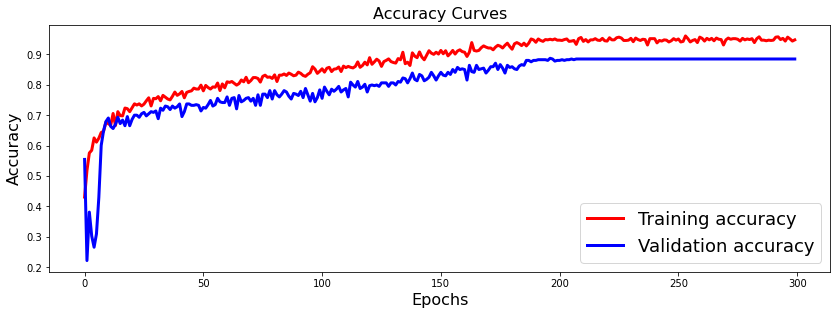

14/14 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

    artifact       1.00      0.98      0.99        48
    extrahls       0.89      0.81      0.85        21
  extrastole       0.67      0.80      0.73        25
      murmur       0.84      0.89      0.86       115
      normal       0.91      0.88      0.90       224

    accuracy                           0.88       433
   macro avg       0.86      0.87      0.87       433
weighted avg       0.89      0.88      0.89       433



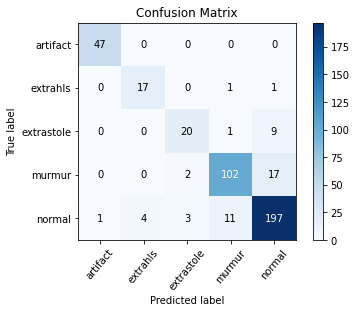

[0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.35384711623191833, 0.8845265507698059, 0.3538471162319

In [ ]:
dataset = create_frames_in_another_way(3)
data_visualisation(dataset)
x_train, x_test, y_train, y_test = train_test_split_of_data(dataset, 3)
model_size_three,history_size_three = create_and_train_model(x_train,x_test,y_train,y_test,3,"another_way")
drawTrainLossCurves(history_size_three)
score = performance("",model_size_three,x_test,y_test)

## Performing operations on model that accept chunk size 2 and creating dataframes in another way

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3124 entries, 3012 to 860
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  3124 non-null   object 
 1   label     3124 non-null   object 
 2   offset    3124 non-null   float64
dtypes: float64(1), object(2)
memory usage: 97.6+ KB


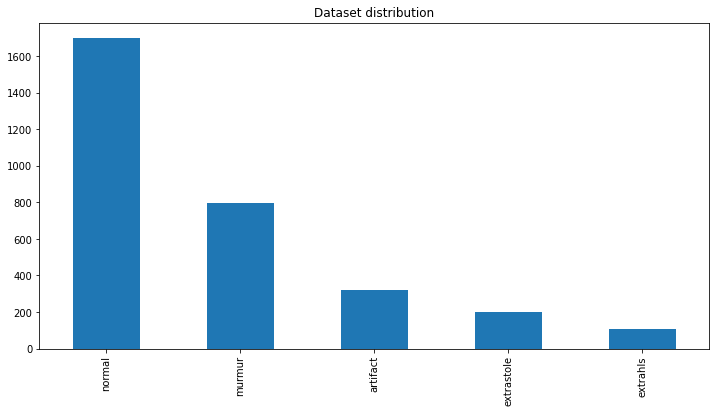

100%|██████████| 938/938 [00:13<00:00, 69.70it/s]


['artifact' 'extrahls' 'extrastole' 'murmur' 'normal']
X train: (2186, 40, 87, 1)
X test: (938, 40, 87, 1)
Y train: (2186, 5)
Y test: (938, 5)
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 39, 86, 32)        160       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 19, 43, 32)       0         
 g2D)                                                            
                                                                 
 dropout_20 (Dropout)        (None, 19, 43, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 18, 42, 64)        8256      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 9, 21, 64)        0         
 g2D)                                      


Epoch 2: loss improved from 3.94065 to 1.13719, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 3: loss improved from 1.13719 to 0.95807, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 4: loss improved from 0.95807 to 0.89528, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 5: loss improved from 0.89528 to 0.84129, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 6: loss improved from 0.84129 to 0.81130, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 7: loss improved from 0.81130 to 0.77964, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 8: loss improved from 0.77964 to 0.74534, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 9: loss did not improve from 0.74534

Epoch 10: loss improved from 0.74534 to 0.72925, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 11: loss improved from 0.72925 to 0.70880, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 12: loss improved from 0.70880 to 0.70704, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 13: loss improved from 0.70704 to 0.69865, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 14: loss improved from 0.69865 to 0.68287, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 15: loss improved from 0.68287 to 0.67290, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 16: loss improved from 0.67290 to 0.67289, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 17: loss improved from 0.67289 to 0.66529, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 18: loss improved from 0.66529 to 0.64656, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 19: loss did not improve from 0.64656

Epoch 20: loss improved from 0.64656 to 0.63528, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 21: loss improved from 0.63528 to 0.63335, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 22: loss improved from 0.63335 to 0.62786, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 23: loss improved from 0.62786 to 0.61484, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 24: loss improved from 0.61484 to 0.60126, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 25: loss did not improve from 0.60126

Epoch 26: loss improved from 0.60126 to 0.59133, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 27: loss improved from 0.59133 to 0.57500, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 28: loss did not improve from 0.57500

Epoch 29: loss did not improve from 0.57500

Epoch 30: loss improved from 0.57500 to 0.55525, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 31: loss did not improve from 0.55525

Epoch 32: loss did not improve from 0.55525

Epoch 33: loss did not improve from 0.55525

Epoch 34: loss improved from 0.55525 to 0.55443, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 35: loss improved from 0.55443 to 0.54732, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 36: loss did not improve from 0.54732

Epoch 37: loss improved from 0.54732 to 0.52779, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 38: loss did not improve from 0.52779

Epoch 39: loss did not improve from 0.52779

Epoch 40: loss did not improve from 0.52779

Epoch 41: loss improved from 0.52779 to 0.51192, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 42: loss did not improve from 0.51192

Epoch 43: loss improved from 0.51192 to 0.50429, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 44: loss did not improve from 0.50429

Epoch 45: loss improved from 0.50429 to 0.49715, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 46: loss improved from 0.49715 to 0.48434, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 47: loss did not improve from 0.48434

Epoch 48: loss improved from 0.48434 to 0.48310, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 49: loss did not improve from 0.48310

Epoch 50: loss did not improve from 0.48310

Epoch 51: loss improved from 0.48310 to 0.47245, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 52: loss improved from 0.47245 to 0.46873, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 53: loss improved from 0.46873 to 0.45728, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 54: loss did not improve from 0.45728

Epoch 55: loss did not improve from 0.45728

Epoch 56: loss improved from 0.45728 to 0.44581, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 57: loss did not improve from 0.44581

Epoch 58: loss improved from 0.44581 to 0.43886, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 59: loss did not improve from 0.43886

Epoch 60: loss improved from 0.43886 to 0.42762, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 61: loss improved from 0.42762 to 0.42618, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 62: loss improved from 0.42618 to 0.42019, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 63: loss improved from 0.42019 to 0.41047, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 64: loss did not improve from 0.41047

Epoch 65: loss improved from 0.41047 to 0.40499, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 66: loss improved from 0.40499 to 0.40456, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 67: loss did not improve from 0.40456

Epoch 68: loss improved from 0.40456 to 0.39762, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 69: loss improved from 0.39762 to 0.39345, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 70: loss did not improve from 0.39345

Epoch 71: loss did not improve from 0.39345

Epoch 72: loss did not improve from 0.39345

Epoch 73: loss improved from 0.39345 to 0.37928, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 74: loss improved from 0.37928 to 0.37459, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 75: loss improved from 0.37459 to 0.36700, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 76: loss improved from 0.36700 to 0.36555, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 77: loss improved from 0.36555 to 0.35864, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 78: loss did not improve from 0.35864

Epoch 79: loss did not improve from 0.35864

Epoch 80: loss improved from 0.35864 to 0.34321, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 81: loss improved from 0.34321 to 0.34258, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 82: loss improved from 0.34258 to 0.32619, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 83: loss did not improve from 0.32619

Epoch 84: loss did not improve from 0.32619

Epoch 85: loss improved from 0.32619 to 0.32509, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 86: loss improved from 0.32509 to 0.32230, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 87: loss did not improve from 0.32230

Epoch 88: loss improved from 0.32230 to 0.31854, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 89: loss did not improve from 0.31854

Epoch 90: loss improved from 0.31854 to 0.30551, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 91: loss improved from 0.30551 to 0.29961, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 92: loss did not improve from 0.29961

Epoch 93: loss did not improve from 0.29961

Epoch 94: loss improved from 0.29961 to 0.29278, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 95: loss improved from 0.29278 to 0.28948, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 96: loss improved from 0.28948 to 0.28657, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 97: loss improved from 0.28657 to 0.28110, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 98: loss did not improve from 0.28110

Epoch 99: loss did not improve from 0.28110

Epoch 100: loss did not improve from 0.28110

Epoch 101: loss improved from 0.28110 to 0.27836, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 102: loss did not improve from 0.27836

Epoch 103: loss did not improve from 0.27836

Epoch 104: loss improved from 0.27836 to 0.27526, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 105: loss improved from 0.27526 to 0.25770, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 106: loss did not improve from 0.25770

Epoch 107: loss improved from 0.25770 to 0.25373, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 108: loss did not improve from 0.25373

Epoch 109: loss did not improve from 0.25373

Epoch 110: loss improved from 0.25373 to 0.24949, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 111: loss improved from 0.24949 to 0.24132, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 112: loss did not improve from 0.24132

Epoch 113: loss improved from 0.24132 to 0.23458, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 114: loss improved from 0.23458 to 0.22710, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 115: loss did not improve from 0.22710

Epoch 116: loss improved from 0.22710 to 0.21766, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 117: loss did not improve from 0.21766

Epoch 118: loss did not improve from 0.21766

Epoch 119: loss did not improve from 0.21766

Epoch 120: loss did not improve from 0.21766

Epoch 121: loss did not improve from 0.21766

Epoch 122: loss did not improve from 0.21766

Epoch 123: loss did not improve from 0.21766

Epoch 124: loss improved from 0.21766 to 0.21437, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 125: loss improved from 0.21437 to 0.20303, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 126: loss did not improve from 0.20303

Epoch 127: loss did not improve from 0.20303

Epoch 128: loss did not improve from 0.20303

Epoch 129: loss improved from 0.20303 to 0.19907, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 130: loss improved from 0.19907 to 0.18507, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 131: loss did not improve from 0.18507

Epoch 132: loss did not improve from 0.18507

Epoch 133: loss improved from 0.18507 to 0.18309, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 134: loss did not improve from 0.18309

Epoch 135: loss did not improve from 0.18309

Epoch 136: loss improved from 0.18309 to 0.18110, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 137: loss did not improve from 0.18110

Epoch 138: loss improved from 0.18110 to 0.17476, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 139: loss did not improve from 0.17476

Epoch 140: loss did not improve from 0.17476

Epoch 141: loss improved from 0.17476 to 0.17076, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 142: loss improved from 0.17076 to 0.16912, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 143: loss improved from 0.16912 to 0.16448, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 144: loss did not improve from 0.16448

Epoch 145: loss improved from 0.16448 to 0.16439, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 146: loss did not improve from 0.16439

Epoch 147: loss did not improve from 0.16439

Epoch 148: loss improved from 0.16439 to 0.16112, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 149: loss improved from 0.16112 to 0.15620, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 150: loss did not improve from 0.15620

Epoch 151: loss improved from 0.15620 to 0.14556, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 152: loss did not improve from 0.14556

Epoch 153: loss did not improve from 0.14556

Epoch 154: loss did not improve from 0.14556

Epoch 155: loss improved from 0.14556 to 0.13832, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 156: loss did not improve from 0.13832

Epoch 157: loss did not improve from 0.13832

Epoch 158: loss did not improve from 0.13832

Epoch 159: loss improved from 0.13832 to 0.12863, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 160: loss did not improve from 0.12863

Epoch 161: loss improved from 0.12863 to 0.12833, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 162: loss did not improve from 0.12833

Epoch 163: loss did not improve from 0.12833

Epoch 164: loss did not improve from 0.12833

Epoch 165: loss did not improve from 0.12833

Epoch 166: loss did not improve from 0.12833

Epoch 167: loss improved from 0.12833 to 0.11437, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 168: loss did not improve from 0.11437

Epoch 169: loss did not improve from 0.11437

Epoch 170: loss did not improve from 0.11437

Epoch 171: loss did not improve from 0.11437

Epoch 172: loss did not improve from 0.11437

Epoch 173: loss did not improve from 0.11437

Epoch 174: loss did not improve from 0.11437

Epoch 175: loss improved from 0.11437 to 0.09457, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 176: loss did not improve from 0.09457

Epoch 177: loss did not improve from 0.09457

Epoch 178: loss did not improve from 0.09457

Epoch 179: loss did not improve from 0.09457

Epoch 180: loss did not improve from 0.09457

Epoch 181: loss did not improve from 0.09457

Epoch 182: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.

Epoch 182: loss did not improve from 0.09457

Epoch 183: loss did not improve from 0.09457

Epoch 184: loss improved from 0.09457 to 0.09328, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 185: loss did not improve from 0.09328

Epoch 186: loss did not improve from 0.09328

Epoch 187: loss did not improve from 0.09328

Epoch 188: loss improved from 0.09328 to 0.09224, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 189: loss did not improve from 0.09224

Epoch 190: loss did not improve from 0.09224

Epoch 191: loss did not improve from 0.09224

Epoch 192: loss improved from 0.09224 to 0.08275, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 193: loss did not improve from 0.08275

Epoch 194: ReduceLROnPlateau reducing learning rate to 1.0000000474974514e-05.

Epoch 194: loss did not improve from 0.08275

Epoch 195: loss did not improve from 0.08275

Epoch 196: loss did not improve from 0.08275

Epoch 197: loss did not improve from 0.08275

Epoch 198: loss did not improve from 0.08275

Epoch 199: loss did not improve from 0.08275

Epoch 200: loss did not improve from 0.08275

Epoch 201: loss did not improve from 0.08275

Epoch 202: loss did not improve from 0.08275

Epoch 203: loss did not improve from 0.08275

Epoch 204: loss improved from 0.08275 to 0.07984, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 205: loss did not improve from 0.07984

Epoch 206: ReduceLROnPlateau reducing learning rate to 1.0000000656873453e-06.

Epoch 206: loss improved from 0.07984 to 0.07530, saving model to /content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way



Epoch 207: loss did not improve from 0.07530

Epoch 208: loss did not improve from 0.07530

Epoch 209: loss did not improve from 0.07530

Epoch 210: loss did not improve from 0.07530

Epoch 211: loss did not improve from 0.07530

Epoch 212: loss did not improve from 0.07530

Epoch 213: loss did not improve from 0.07530

Epoch 214: loss did not improve from 0.07530

Epoch 215: loss did not improve from 0.07530

Epoch 216: loss did not improve from 0.07530

Epoch 217: loss did not improve from 0.07530

Epoch 218: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 218: loss did not improve from 0.07530

Epoch 219: loss did not improve from 0.07530

Epoch 220: loss did not improve from 0.07530

Epoch 221: loss did not improve from 0.07530

Epoch 222: loss did not improve from 0.07530

Epoch 223: loss did not improve from 0.07530

Epoch 224: loss did not improve from 0.07530

Epoch 225: loss did not improve from 0.07530

Epoch 226: loss did not improve from 0.07530


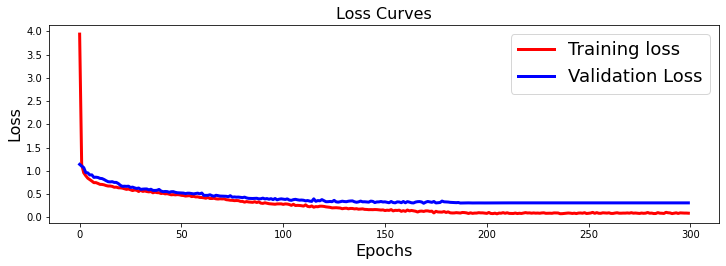

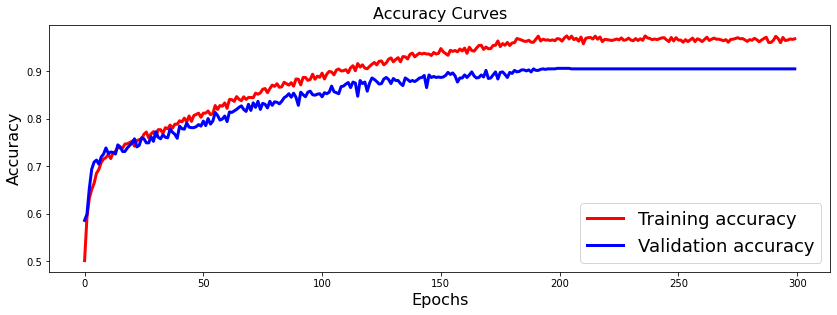

30/30 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

    artifact       0.98      0.99      0.99       101
    extrahls       0.79      0.94      0.86        35
  extrastole       0.60      0.78      0.68        51
      murmur       0.88      0.95      0.91       231
      normal       0.96      0.88      0.92       520

    accuracy                           0.91       938
   macro avg       0.84      0.91      0.87       938
weighted avg       0.91      0.91      0.91       938



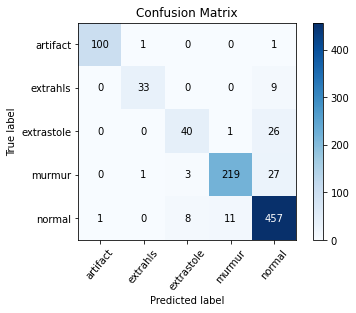

In [ ]:
dataset = create_frames_in_another_way(2)
data_visualisation(dataset)
x_train, x_test, y_train, y_test = train_test_split_of_data(dataset, 2)
model_size_two_other_way,history_size_two_other_way = create_and_train_model(x_train,x_test,y_train,y_test,2,"another_way")
drawTrainLossCurves(history_size_two_other_way)
score = performance("",model_size_two_other_way,x_test,y_test)

In [12]:
testDataset = []
for folder in ["/content/drive/MyDrive/heartbeat-sounds/set_a/**","/content/drive/MyDrive/heartbeat-sounds/set_b/**"]:
    for filename in glob.iglob(folder):
        if os.path.exists(filename):
            label = os.path.basename(filename).split("_")[0]
            duration = librosa.get_duration(filename=filename)
            # skip audio smaller than 3 secs
            if duration>=3:
                if label not in ["Aunlabelledtest", "Bunlabelledtest"]:
                      testDataset.append({
                              "filename": filename,
                              "label": label,
                          })
                       
                        
testDataset = pd.DataFrame(testDataset)
testDataset = shuffle(testDataset, random_state=25)
testDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 462 entries, 23 to 132
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  462 non-null    object
 1   label     462 non-null    object
dtypes: object(2)
memory usage: 10.8+ KB


In [22]:
def eachQuantumPrediction(filepath,offset,model,slice_size):
  quantum = np.asarray(extract_features(filepath,offset,slice_size))
  quantum = quantum.reshape(1, quantum.shape[0], quantum.shape[1], 1)
  return np.argmax(model.predict(quantum)[0])

In [30]:
from collections import defaultdict
def eachFilePrediction(filepath, model,way, slice_size):
  duration = librosa.get_duration(filename=filepath)
  maxi = -1
  maxCount = 0
  hmap = defaultdict(int)
  if way == 'another':
    iterations = int((duration-slice_size)/(slice_size-1))
    iterations += 1
    initial_offset = (duration - ((iterations*(slice_size-1))+1))/2
    for i in range(iterations):
        offset = initial_offset + i*(slice_size-1)
        predNum = eachQuantumPrediction(filepath,offset,model,slice_size)
        hmap[predNum] += 1
        if hmap[predNum] > maxCount:
          maxCount = hmap[predNum]
          maxi = predNum
    return maxi
  else:
    iterations = int(duration // slice_size)
    reminder = duration % slice_size
    for i in range(iterations):
        offset = i*slice_size
        predNum = eachQuantumPrediction(filepath,offset,model,slice_size)
        hmap[predNum] += 1
        if hmap[predNum] > maxCount:
          maxCount = hmap[predNum]
          maxi = predNum
    if((reminder and slice_size == 2) or (reminder >= slice_size-2 and slice_size != 2)):
      predNum = eachQuantumPrediction(filepath,int(duration)-slice_size,model,slice_size)
      hmap[predNum] += 1
      if hmap[predNum] > maxCount:
        maxCount = hmap[predNum]
        maxi = predNum
    return maxi

  

## creating function to test the model with audio files

In [35]:
|def testing_the_model(model,chunk_size,way='',random_state = 42):
  trainNew, testNew = train_test_split(testDataset, test_size=0.35, random_state=random_state)

  print("Train: %i" % len(trainNew))
  print("Test: %i" % len(testNew))

  y_true, y_pred = [],[]
  classes = ['artifact', 'extrahls', 'extrastole', 'murmur', 'normal']
  for idx in tqdm(range(len(testNew))):
    y_pred.append(classes[eachFilePrediction(testNew.filename.iloc[idx],model,way,chunk_size)])
    y_true.append(testNew.label.iloc[idx])
  print(classification_report(y_pred, y_true))
  skplt.metrics.plot_confusion_matrix(y_true, y_pred, normalize=False)
  plt.xticks(rotation=50)
  plt.show()


##Testing each model

Train: 300
Test: 162


  0%|          | 0/162 [00:00<?, ?it/s]

1/1 [==============================] - 0s 25ms/step


  1%|          | 1/162 [00:00<01:14,  2.15it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 2/162 [00:00<01:16,  2.10it/s]

1/1 [==============================] - 0s 25ms/step


  2%|▏         | 3/162 [00:01<01:03,  2.50it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▏         | 4/162 [00:01<01:04,  2.44it/s]

1/1 [==============================] - 0s 29ms/step


  3%|▎         | 5/162 [00:02<01:13,  2.12it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▎         | 6/162 [00:02<01:00,  2.58it/s]

1/1 [==============================] - 0s 29ms/step


  4%|▍         | 7/162 [00:02<01:05,  2.36it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 8/162 [00:03<01:17,  1.99it/s]

1/1 [==============================] - 0s 33ms/step


  6%|▌         | 9/162 [00:04<01:12,  2.12it/s]

1/1 [==============================] - 0s 32ms/step


  6%|▌         | 10/162 [00:04<01:19,  1.91it/s]

1/1 [==============================] - 0s 26ms/step


  7%|▋         | 11/162 [00:05<01:21,  1.84it/s]

1/1 [==============================] - 0s 27ms/step


  7%|▋         | 12/162 [00:05<01:25,  1.75it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 13/162 [00:06<01:25,  1.75it/s]

1/1 [==============================] - 0s 29ms/step


  9%|▊         | 14/162 [00:06<01:17,  1.91it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▉         | 15/162 [00:07<01:11,  2.06it/s]

1/1 [==============================] - 0s 44ms/step


 10%|▉         | 16/162 [00:07<01:17,  1.89it/s]

1/1 [==============================] - 0s 46ms/step


 10%|█         | 17/162 [00:08<01:26,  1.68it/s]

1/1 [==============================] - 0s 30ms/step


 11%|█         | 18/162 [00:09<01:34,  1.52it/s]

1/1 [==============================] - 0s 30ms/step


 12%|█▏        | 19/162 [00:10<01:41,  1.40it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▏        | 20/162 [00:11<01:45,  1.34it/s]

1/1 [==============================] - 0s 29ms/step


 13%|█▎        | 21/162 [00:11<01:42,  1.37it/s]

1/1 [==============================] - 0s 28ms/step


 14%|█▎        | 22/162 [00:12<01:31,  1.53it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 23/162 [00:12<01:12,  1.91it/s]

1/1 [==============================] - 0s 27ms/step


 15%|█▍        | 24/162 [00:12<01:00,  2.28it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 25/162 [00:13<01:16,  1.79it/s]

1/1 [==============================] - 0s 25ms/step


 16%|█▌        | 26/162 [00:14<01:31,  1.49it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 27/162 [00:14<01:12,  1.85it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 28/162 [00:15<01:17,  1.73it/s]

1/1 [==============================] - 0s 27ms/step


 18%|█▊        | 29/162 [00:15<01:12,  1.83it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▊        | 30/162 [00:16<01:14,  1.77it/s]

1/1 [==============================] - 0s 31ms/step


 19%|█▉        | 31/162 [00:17<01:11,  1.82it/s]

1/1 [==============================] - 0s 32ms/step


 20%|█▉        | 32/162 [00:17<01:15,  1.71it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 33/162 [00:18<01:22,  1.56it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 34/162 [00:19<01:18,  1.62it/s]

1/1 [==============================] - 0s 29ms/step


 22%|██▏       | 35/162 [00:19<01:19,  1.59it/s]

1/1 [==============================] - 0s 28ms/step


 22%|██▏       | 36/162 [00:19<01:04,  1.96it/s]

1/1 [==============================] - 0s 29ms/step


 23%|██▎       | 37/162 [00:20<00:53,  2.35it/s]

1/1 [==============================] - 0s 27ms/step


 23%|██▎       | 38/162 [00:20<00:45,  2.70it/s]

1/1 [==============================] - 0s 25ms/step


 24%|██▍       | 39/162 [00:21<00:55,  2.23it/s]

1/1 [==============================] - 0s 32ms/step


 25%|██▍       | 40/162 [00:21<00:50,  2.43it/s]

1/1 [==============================] - 0s 37ms/step


 25%|██▌       | 41/162 [00:21<00:53,  2.27it/s]

1/1 [==============================] - 0s 43ms/step


 26%|██▌       | 42/162 [00:23<01:37,  1.23it/s]

1/1 [==============================] - 0s 54ms/step


 27%|██▋       | 43/162 [00:24<01:47,  1.11it/s]

1/1 [==============================] - 0s 47ms/step


 27%|██▋       | 44/162 [00:25<01:42,  1.15it/s]

1/1 [==============================] - 0s 29ms/step


 28%|██▊       | 45/162 [00:26<01:31,  1.28it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 46/162 [00:26<01:20,  1.44it/s]

1/1 [==============================] - 0s 25ms/step


 29%|██▉       | 47/162 [00:27<01:12,  1.58it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 48/162 [00:28<01:34,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 49/162 [00:28<01:13,  1.54it/s]

1/1 [==============================] - 0s 25ms/step


 31%|███       | 50/162 [00:29<01:09,  1.60it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 51/162 [00:29<00:58,  1.89it/s]

1/1 [==============================] - 0s 29ms/step


 32%|███▏      | 52/162 [00:29<00:53,  2.06it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 53/162 [00:30<00:44,  2.45it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 54/162 [00:30<00:41,  2.58it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 55/162 [00:30<00:38,  2.75it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▍      | 56/162 [00:30<00:33,  3.12it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▌      | 57/162 [00:31<00:37,  2.83it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▌      | 58/162 [00:31<00:38,  2.70it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▋      | 59/162 [00:32<00:51,  2.01it/s]

1/1 [==============================] - 0s 31ms/step


 37%|███▋      | 60/162 [00:33<00:51,  1.98it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 61/162 [00:33<00:47,  2.11it/s]

1/1 [==============================] - 0s 27ms/step


 38%|███▊      | 62/162 [00:33<00:48,  2.08it/s]

1/1 [==============================] - 0s 32ms/step


 39%|███▉      | 63/162 [00:34<00:45,  2.17it/s]

1/1 [==============================] - 0s 24ms/step


 40%|███▉      | 64/162 [00:34<00:43,  2.28it/s]

1/1 [==============================] - 0s 31ms/step


 40%|████      | 65/162 [00:35<00:44,  2.17it/s]

1/1 [==============================] - 0s 25ms/step


 41%|████      | 66/162 [00:35<00:37,  2.55it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████▏     | 67/162 [00:35<00:40,  2.34it/s]

1/1 [==============================] - 0s 47ms/step


 42%|████▏     | 68/162 [00:36<00:50,  1.85it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████▎     | 69/162 [00:37<00:47,  1.95it/s]

1/1 [==============================] - 0s 47ms/step


 43%|████▎     | 70/162 [00:37<00:46,  1.96it/s]

1/1 [==============================] - 0s 41ms/step


 44%|████▍     | 71/162 [00:38<00:45,  2.00it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 72/162 [00:38<00:46,  1.92it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 73/162 [00:39<00:41,  2.15it/s]

1/1 [==============================] - 0s 76ms/step


 46%|████▌     | 74/162 [00:39<00:43,  2.05it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▋     | 75/162 [00:40<00:51,  1.70it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 76/162 [00:41<00:50,  1.70it/s]

1/1 [==============================] - 0s 40ms/step


 48%|████▊     | 77/162 [00:41<00:46,  1.85it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 78/162 [00:42<00:48,  1.72it/s]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 79/162 [00:42<00:46,  1.79it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 80/162 [00:43<00:46,  1.78it/s]

1/1 [==============================] - 0s 28ms/step


 50%|█████     | 81/162 [00:43<00:41,  1.93it/s]

1/1 [==============================] - 0s 26ms/step


 51%|█████     | 82/162 [00:44<00:41,  1.93it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 83/162 [00:44<00:34,  2.31it/s]

1/1 [==============================] - 0s 30ms/step


 52%|█████▏    | 84/162 [00:45<00:37,  2.10it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 85/162 [00:45<00:30,  2.51it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 86/162 [00:46<00:43,  1.76it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▎    | 87/162 [00:46<00:37,  2.03it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▍    | 88/162 [00:46<00:34,  2.15it/s]

1/1 [==============================] - 0s 26ms/step


 55%|█████▍    | 89/162 [00:47<00:28,  2.53it/s]

1/1 [==============================] - 0s 34ms/step


 56%|█████▌    | 90/162 [00:47<00:30,  2.35it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 91/162 [00:48<00:32,  2.21it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 92/162 [00:48<00:28,  2.42it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 93/162 [00:48<00:24,  2.76it/s]

1/1 [==============================] - 0s 32ms/step


 58%|█████▊    | 94/162 [00:49<00:25,  2.66it/s]

1/1 [==============================] - 0s 42ms/step


 59%|█████▊    | 95/162 [00:49<00:33,  1.99it/s]

1/1 [==============================] - 0s 46ms/step


 59%|█████▉    | 96/162 [00:50<00:36,  1.80it/s]

1/1 [==============================] - 0s 54ms/step


 60%|█████▉    | 97/162 [00:51<00:42,  1.53it/s]

1/1 [==============================] - 0s 55ms/step


 60%|██████    | 98/162 [00:51<00:38,  1.64it/s]

1/1 [==============================] - 0s 44ms/step


 61%|██████    | 99/162 [00:53<00:46,  1.35it/s]

1/1 [==============================] - 0s 41ms/step


 62%|██████▏   | 100/162 [00:54<00:56,  1.10it/s]

1/1 [==============================] - 0s 55ms/step


 62%|██████▏   | 101/162 [00:55<00:52,  1.15it/s]

1/1 [==============================] - 0s 90ms/step


 63%|██████▎   | 102/162 [00:55<00:44,  1.34it/s]

1/1 [==============================] - 0s 45ms/step


 64%|██████▎   | 103/162 [00:56<00:41,  1.41it/s]

1/1 [==============================] - 0s 33ms/step


 64%|██████▍   | 104/162 [00:57<00:43,  1.32it/s]

1/1 [==============================] - 0s 31ms/step


 65%|██████▍   | 105/162 [00:57<00:36,  1.58it/s]

1/1 [==============================] - 0s 34ms/step


 65%|██████▌   | 106/162 [00:58<00:37,  1.48it/s]

1/1 [==============================] - 0s 38ms/step


 66%|██████▌   | 107/162 [00:58<00:33,  1.63it/s]

1/1 [==============================] - 0s 37ms/step


 67%|██████▋   | 108/162 [00:59<00:32,  1.68it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 109/162 [00:59<00:27,  1.93it/s]

1/1 [==============================] - 0s 35ms/step


 68%|██████▊   | 110/162 [01:00<00:32,  1.60it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▊   | 111/162 [01:00<00:25,  1.97it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▉   | 112/162 [01:01<00:27,  1.81it/s]

1/1 [==============================] - 0s 41ms/step


 70%|██████▉   | 113/162 [01:02<00:32,  1.51it/s]

1/1 [==============================] - 0s 30ms/step


 70%|███████   | 114/162 [01:02<00:25,  1.86it/s]

1/1 [==============================] - 0s 28ms/step


 71%|███████   | 115/162 [01:02<00:23,  1.99it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 116/162 [01:03<00:26,  1.75it/s]

1/1 [==============================] - 0s 31ms/step


 72%|███████▏  | 117/162 [01:04<00:23,  1.89it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 118/162 [01:04<00:20,  2.11it/s]

1/1 [==============================] - 0s 39ms/step


 73%|███████▎  | 119/162 [01:04<00:21,  2.03it/s]

1/1 [==============================] - 0s 32ms/step


 74%|███████▍  | 120/162 [01:06<00:29,  1.45it/s]

1/1 [==============================] - 0s 28ms/step


 75%|███████▍  | 121/162 [01:06<00:25,  1.58it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 122/162 [01:07<00:27,  1.43it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▌  | 123/162 [01:08<00:30,  1.26it/s]

1/1 [==============================] - 0s 38ms/step


 77%|███████▋  | 124/162 [01:09<00:30,  1.25it/s]

1/1 [==============================] - 0s 51ms/step


 77%|███████▋  | 125/162 [01:10<00:29,  1.25it/s]

1/1 [==============================] - 0s 39ms/step


 78%|███████▊  | 126/162 [01:10<00:27,  1.30it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 127/162 [01:11<00:24,  1.45it/s]

1/1 [==============================] - 0s 28ms/step


 79%|███████▉  | 128/162 [01:11<00:19,  1.71it/s]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 129/162 [01:12<00:19,  1.70it/s]

1/1 [==============================] - 0s 27ms/step


 80%|████████  | 130/162 [01:12<00:18,  1.75it/s]

1/1 [==============================] - 0s 32ms/step


 81%|████████  | 131/162 [01:13<00:16,  1.82it/s]

1/1 [==============================] - 0s 28ms/step


 81%|████████▏ | 132/162 [01:13<00:14,  2.10it/s]

1/1 [==============================] - 0s 45ms/step


 82%|████████▏ | 133/162 [01:14<00:14,  2.05it/s]

1/1 [==============================] - 0s 37ms/step


 83%|████████▎ | 134/162 [01:14<00:12,  2.29it/s]

1/1 [==============================] - 0s 35ms/step


 83%|████████▎ | 135/162 [01:14<00:10,  2.63it/s]

1/1 [==============================] - 0s 34ms/step


 84%|████████▍ | 136/162 [01:14<00:09,  2.74it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 137/162 [01:15<00:10,  2.44it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 138/162 [01:15<00:08,  2.80it/s]

1/1 [==============================] - 0s 30ms/step


 86%|████████▌ | 139/162 [01:16<00:07,  2.88it/s]

1/1 [==============================] - 0s 24ms/step


 86%|████████▋ | 140/162 [01:16<00:10,  2.09it/s]

1/1 [==============================] - 0s 33ms/step


 87%|████████▋ | 141/162 [01:17<00:09,  2.16it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 142/162 [01:17<00:09,  2.05it/s]

1/1 [==============================] - 0s 33ms/step


 88%|████████▊ | 143/162 [01:18<00:08,  2.14it/s]

1/1 [==============================] - 0s 26ms/step


 89%|████████▉ | 144/162 [01:18<00:08,  2.19it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 145/162 [01:19<00:08,  2.12it/s]

1/1 [==============================] - 0s 27ms/step


 90%|█████████ | 146/162 [01:19<00:07,  2.21it/s]

1/1 [==============================] - 0s 30ms/step


 91%|█████████ | 147/162 [01:20<00:07,  2.01it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████▏| 148/162 [01:20<00:07,  1.78it/s]

1/1 [==============================] - 0s 62ms/step


 92%|█████████▏| 149/162 [01:21<00:08,  1.50it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 150/162 [01:22<00:09,  1.25it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 151/162 [01:23<00:09,  1.14it/s]

1/1 [==============================] - 0s 37ms/step


 94%|█████████▍| 152/162 [01:24<00:08,  1.22it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 153/162 [01:25<00:07,  1.25it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 154/162 [01:25<00:05,  1.47it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 155/162 [01:26<00:04,  1.72it/s]

1/1 [==============================] - 0s 31ms/step


 96%|█████████▋| 156/162 [01:26<00:03,  1.89it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 157/162 [01:26<00:02,  2.01it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 158/162 [01:27<00:01,  2.01it/s]

1/1 [==============================] - 0s 26ms/step


 98%|█████████▊| 159/162 [01:27<00:01,  2.12it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 160/162 [01:28<00:00,  2.33it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 161/162 [01:28<00:00,  2.56it/s]

1/1 [==============================] - 0s 26ms/step


100%|██████████| 162/162 [01:28<00:00,  1.82it/s]

              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00        12
    extrahls       0.80      1.00      0.89         4
  extrastole       0.67      1.00      0.80         6
      murmur       1.00      0.95      0.97        41
      normal       0.99      0.97      0.98        99

    accuracy                           0.97       162
   macro avg       0.89      0.98      0.93       162
weighted avg       0.98      0.97      0.97       162



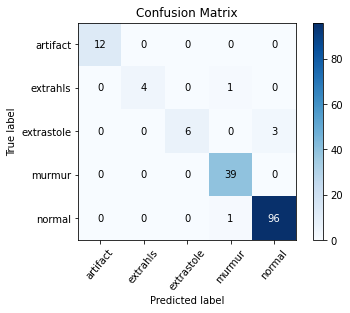

In [38]:
import tensorflow as tf
CNN_chunkSize2 = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2')
testing_the_model(CNN_chunkSize2, 2)

Train: 300
Test: 162


  0%|          | 0/162 [00:00<?, ?it/s]

1/1 [==============================] - 0s 30ms/step


  1%|          | 1/162 [00:00<01:33,  1.71it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 2/162 [00:01<01:53,  1.40it/s]

1/1 [==============================] - 0s 47ms/step


  2%|▏         | 3/162 [00:01<01:24,  1.87it/s]

1/1 [==============================] - 0s 32ms/step


  2%|▏         | 4/162 [00:02<01:48,  1.46it/s]

1/1 [==============================] - 0s 37ms/step


  3%|▎         | 5/162 [00:03<02:19,  1.13it/s]

1/1 [==============================] - 0s 58ms/step


  4%|▎         | 6/162 [00:04<01:46,  1.47it/s]

1/1 [==============================] - 0s 46ms/step


  4%|▍         | 7/162 [00:05<02:11,  1.18it/s]

1/1 [==============================] - 0s 36ms/step


  5%|▍         | 8/162 [00:07<03:29,  1.36s/it]

1/1 [==============================] - 0s 44ms/step


  6%|▌         | 9/162 [00:08<03:05,  1.21s/it]

1/1 [==============================] - 0s 46ms/step


  6%|▌         | 10/162 [00:10<03:24,  1.35s/it]

1/1 [==============================] - 0s 54ms/step


  7%|▋         | 11/162 [00:12<03:46,  1.50s/it]

1/1 [==============================] - 0s 36ms/step


  7%|▋         | 12/162 [00:13<03:48,  1.53s/it]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 13/162 [00:14<03:21,  1.36s/it]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 14/162 [00:15<02:49,  1.14s/it]

1/1 [==============================] - 0s 62ms/step


  9%|▉         | 15/162 [00:16<02:35,  1.06s/it]

1/1 [==============================] - 0s 49ms/step


 10%|▉         | 16/162 [00:17<02:37,  1.08s/it]

1/1 [==============================] - 0s 35ms/step


 10%|█         | 17/162 [00:18<02:44,  1.13s/it]

1/1 [==============================] - 0s 29ms/step


 11%|█         | 18/162 [00:19<02:45,  1.15s/it]

1/1 [==============================] - 0s 34ms/step


 12%|█▏        | 19/162 [00:20<02:34,  1.08s/it]

1/1 [==============================] - 0s 27ms/step


 12%|█▏        | 20/162 [00:21<02:19,  1.02it/s]

1/1 [==============================] - 0s 26ms/step


 13%|█▎        | 21/162 [00:22<02:06,  1.11it/s]

1/1 [==============================] - 0s 30ms/step


 14%|█▎        | 22/162 [00:22<01:58,  1.18it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 23/162 [00:23<01:31,  1.52it/s]

1/1 [==============================] - 0s 52ms/step


 15%|█▍        | 24/162 [00:23<01:15,  1.83it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▌        | 25/162 [00:25<02:27,  1.08s/it]

1/1 [==============================] - 0s 27ms/step


 16%|█▌        | 26/162 [00:27<03:10,  1.40s/it]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 27/162 [00:28<02:21,  1.05s/it]

1/1 [==============================] - 0s 27ms/step


 17%|█▋        | 28/162 [00:29<02:24,  1.08s/it]

1/1 [==============================] - 0s 40ms/step


 18%|█▊        | 29/162 [00:30<02:13,  1.01s/it]

1/1 [==============================] - 0s 30ms/step


 19%|█▊        | 30/162 [00:31<02:10,  1.01it/s]

1/1 [==============================] - 0s 31ms/step


 19%|█▉        | 31/162 [00:31<02:00,  1.09it/s]

1/1 [==============================] - 0s 30ms/step


 20%|█▉        | 32/162 [00:32<02:04,  1.05it/s]

1/1 [==============================] - 0s 24ms/step


 20%|██        | 33/162 [00:34<02:12,  1.03s/it]

1/1 [==============================] - 0s 25ms/step


 21%|██        | 34/162 [00:34<02:05,  1.02it/s]

1/1 [==============================] - 0s 25ms/step


 22%|██▏       | 35/162 [00:36<02:10,  1.03s/it]

1/1 [==============================] - 0s 31ms/step


 22%|██▏       | 36/162 [00:36<01:38,  1.27it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 37/162 [00:36<01:16,  1.63it/s]

1/1 [==============================] - 0s 30ms/step


 23%|██▎       | 38/162 [00:36<01:01,  2.00it/s]

1/1 [==============================] - 0s 28ms/step


 24%|██▍       | 39/162 [00:37<01:26,  1.42it/s]

1/1 [==============================] - 0s 26ms/step


 25%|██▍       | 40/162 [00:38<01:19,  1.53it/s]

1/1 [==============================] - 0s 45ms/step


 25%|██▌       | 41/162 [00:39<01:38,  1.23it/s]

1/1 [==============================] - 0s 26ms/step


 26%|██▌       | 42/162 [00:42<02:34,  1.29s/it]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 43/162 [00:43<02:29,  1.25s/it]

1/1 [==============================] - 0s 25ms/step


 27%|██▋       | 44/162 [00:43<02:06,  1.07s/it]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 45/162 [00:44<01:48,  1.08it/s]

1/1 [==============================] - 0s 33ms/step


 28%|██▊       | 46/162 [00:45<01:42,  1.13it/s]

1/1 [==============================] - 0s 33ms/step


 29%|██▉       | 47/162 [00:46<01:38,  1.17it/s]

1/1 [==============================] - 0s 32ms/step


 30%|██▉       | 48/162 [00:48<02:28,  1.30s/it]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 49/162 [00:48<01:50,  1.02it/s]

1/1 [==============================] - 0s 29ms/step


 31%|███       | 50/162 [00:49<01:49,  1.03it/s]

1/1 [==============================] - 0s 27ms/step


 31%|███▏      | 51/162 [00:49<01:29,  1.24it/s]

1/1 [==============================] - 0s 32ms/step


 32%|███▏      | 52/162 [00:50<01:21,  1.35it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 53/162 [00:50<01:04,  1.70it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 54/162 [00:51<00:54,  1.97it/s]

1/1 [==============================] - 0s 36ms/step


 34%|███▍      | 55/162 [00:51<00:54,  1.98it/s]

1/1 [==============================] - 0s 43ms/step


 35%|███▍      | 56/162 [00:51<00:49,  2.14it/s]

1/1 [==============================] - 0s 47ms/step


 35%|███▌      | 57/162 [00:52<00:57,  1.82it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▌      | 58/162 [00:53<01:08,  1.52it/s]

1/1 [==============================] - 0s 24ms/step


 36%|███▋      | 59/162 [00:55<01:48,  1.05s/it]

1/1 [==============================] - 0s 30ms/step


 37%|███▋      | 60/162 [00:56<01:40,  1.02it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 61/162 [00:56<01:24,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 62/162 [00:57<01:21,  1.23it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 63/162 [00:58<01:13,  1.34it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 64/162 [00:58<01:07,  1.44it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 65/162 [00:59<01:10,  1.37it/s]

1/1 [==============================] - 0s 29ms/step


 41%|████      | 66/162 [00:59<00:56,  1.71it/s]

1/1 [==============================] - 0s 31ms/step


 41%|████▏     | 67/162 [01:00<01:00,  1.57it/s]

1/1 [==============================] - 0s 31ms/step


 42%|████▏     | 68/162 [01:01<01:03,  1.49it/s]

1/1 [==============================] - 0s 26ms/step


 43%|████▎     | 69/162 [01:01<00:52,  1.77it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 70/162 [01:02<00:47,  1.94it/s]

1/1 [==============================] - 0s 29ms/step


 44%|████▍     | 71/162 [01:02<00:41,  2.19it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 72/162 [01:03<00:44,  2.04it/s]

1/1 [==============================] - 0s 25ms/step


 45%|████▌     | 73/162 [01:03<00:39,  2.23it/s]

1/1 [==============================] - 0s 26ms/step


 46%|████▌     | 74/162 [01:03<00:43,  2.03it/s]

1/1 [==============================] - 0s 29ms/step


 46%|████▋     | 75/162 [01:04<00:56,  1.53it/s]

1/1 [==============================] - 0s 58ms/step


 47%|████▋     | 76/162 [01:05<01:04,  1.33it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 77/162 [01:06<01:07,  1.26it/s]

1/1 [==============================] - 0s 45ms/step


 48%|████▊     | 78/162 [01:08<01:26,  1.04s/it]

1/1 [==============================] - 0s 32ms/step


 49%|████▉     | 79/162 [01:09<01:26,  1.04s/it]

1/1 [==============================] - 0s 30ms/step


 49%|████▉     | 80/162 [01:10<01:20,  1.02it/s]

1/1 [==============================] - 0s 30ms/step


 50%|█████     | 81/162 [01:10<01:09,  1.16it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 82/162 [01:11<01:06,  1.20it/s]

1/1 [==============================] - 0s 29ms/step


 51%|█████     | 83/162 [01:11<00:51,  1.54it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 84/162 [01:12<00:55,  1.41it/s]

1/1 [==============================] - 0s 33ms/step


 52%|█████▏    | 85/162 [01:12<00:43,  1.77it/s]

1/1 [==============================] - 0s 25ms/step


 53%|█████▎    | 86/162 [01:14<01:05,  1.16it/s]

1/1 [==============================] - 0s 26ms/step


 54%|█████▎    | 87/162 [01:14<00:52,  1.42it/s]

1/1 [==============================] - 0s 28ms/step


 54%|█████▍    | 88/162 [01:15<00:49,  1.50it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 89/162 [01:15<00:38,  1.89it/s]

1/1 [==============================] - 0s 26ms/step


 56%|█████▌    | 90/162 [01:16<00:44,  1.63it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 91/162 [01:17<00:47,  1.50it/s]

1/1 [==============================] - 0s 27ms/step


 57%|█████▋    | 92/162 [01:17<00:39,  1.76it/s]

1/1 [==============================] - 0s 30ms/step


 57%|█████▋    | 93/162 [01:17<00:32,  2.15it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 94/162 [01:18<00:34,  1.98it/s]

1/1 [==============================] - 0s 52ms/step


 59%|█████▊    | 95/162 [01:19<00:51,  1.31it/s]

1/1 [==============================] - 0s 39ms/step


 59%|█████▉    | 96/162 [01:21<01:00,  1.09it/s]

1/1 [==============================] - 0s 46ms/step


 60%|█████▉    | 97/162 [01:22<01:05,  1.00s/it]

1/1 [==============================] - 0s 27ms/step


 60%|██████    | 98/162 [01:22<00:56,  1.14it/s]

1/1 [==============================] - 0s 45ms/step


 61%|██████    | 99/162 [01:23<00:45,  1.37it/s]

1/1 [==============================] - 0s 24ms/step


 62%|██████▏   | 100/162 [01:24<00:54,  1.14it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 101/162 [01:25<00:48,  1.27it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 102/162 [01:25<00:37,  1.61it/s]

1/1 [==============================] - 0s 30ms/step


 64%|██████▎   | 103/162 [01:25<00:31,  1.88it/s]

1/1 [==============================] - 0s 27ms/step


 64%|██████▍   | 104/162 [01:26<00:35,  1.65it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 105/162 [01:26<00:30,  1.85it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▌   | 106/162 [01:27<00:40,  1.38it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 107/162 [01:28<00:36,  1.51it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 108/162 [01:29<00:37,  1.43it/s]

1/1 [==============================] - 0s 41ms/step


 67%|██████▋   | 109/162 [01:29<00:33,  1.60it/s]

1/1 [==============================] - 0s 27ms/step


 68%|██████▊   | 110/162 [01:30<00:43,  1.21it/s]

1/1 [==============================] - 0s 33ms/step


 69%|██████▊   | 111/162 [01:31<00:33,  1.53it/s]

1/1 [==============================] - 0s 35ms/step


 69%|██████▉   | 112/162 [01:32<00:36,  1.38it/s]

1/1 [==============================] - 0s 24ms/step


 70%|██████▉   | 113/162 [01:33<00:45,  1.09it/s]

1/1 [==============================] - 0s 52ms/step


 70%|███████   | 114/162 [01:33<00:35,  1.37it/s]

1/1 [==============================] - 0s 49ms/step


 71%|███████   | 115/162 [01:34<00:36,  1.30it/s]

1/1 [==============================] - 0s 30ms/step


 72%|███████▏  | 116/162 [01:36<00:48,  1.05s/it]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 117/162 [01:37<00:42,  1.05it/s]

1/1 [==============================] - 0s 45ms/step


 73%|███████▎  | 118/162 [01:37<00:36,  1.20it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 119/162 [01:38<00:35,  1.22it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 120/162 [01:40<00:48,  1.15s/it]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 121/162 [01:41<00:42,  1.03s/it]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 122/162 [01:42<00:40,  1.02s/it]

1/1 [==============================] - 0s 28ms/step


 76%|███████▌  | 123/162 [01:42<00:37,  1.03it/s]

1/1 [==============================] - 0s 40ms/step


 77%|███████▋  | 124/162 [01:43<00:33,  1.13it/s]

1/1 [==============================] - 0s 27ms/step


 77%|███████▋  | 125/162 [01:44<00:30,  1.22it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 126/162 [01:44<00:26,  1.38it/s]

1/1 [==============================] - 0s 29ms/step


 78%|███████▊  | 127/162 [01:45<00:24,  1.44it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 128/162 [01:45<00:19,  1.72it/s]

1/1 [==============================] - 0s 28ms/step


 80%|███████▉  | 129/162 [01:46<00:23,  1.43it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████  | 130/162 [01:47<00:22,  1.44it/s]

1/1 [==============================] - 0s 46ms/step


 81%|████████  | 131/162 [01:48<00:24,  1.27it/s]

1/1 [==============================] - 0s 48ms/step


 81%|████████▏ | 132/162 [01:48<00:22,  1.36it/s]

1/1 [==============================] - 0s 46ms/step


 82%|████████▏ | 133/162 [01:50<00:25,  1.13it/s]

1/1 [==============================] - 0s 55ms/step


 83%|████████▎ | 134/162 [01:50<00:21,  1.31it/s]

1/1 [==============================] - 0s 49ms/step


 83%|████████▎ | 135/162 [01:51<00:17,  1.55it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 136/162 [01:51<00:16,  1.57it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 137/162 [01:52<00:17,  1.45it/s]

1/1 [==============================] - 0s 33ms/step


 85%|████████▌ | 138/162 [01:52<00:13,  1.79it/s]

1/1 [==============================] - 0s 32ms/step


 86%|████████▌ | 139/162 [01:53<00:11,  1.94it/s]

1/1 [==============================] - 0s 26ms/step


 86%|████████▋ | 140/162 [01:54<00:16,  1.33it/s]

1/1 [==============================] - 0s 30ms/step


 87%|████████▋ | 141/162 [01:55<00:14,  1.42it/s]

1/1 [==============================] - 0s 24ms/step


 88%|████████▊ | 142/162 [01:55<00:14,  1.37it/s]

1/1 [==============================] - 0s 27ms/step


 88%|████████▊ | 143/162 [01:56<00:13,  1.46it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 144/162 [01:57<00:12,  1.49it/s]

1/1 [==============================] - 0s 24ms/step


 90%|████████▉ | 145/162 [01:57<00:12,  1.42it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 146/162 [01:58<00:10,  1.54it/s]

1/1 [==============================] - 0s 34ms/step


 91%|█████████ | 147/162 [01:59<00:11,  1.32it/s]

1/1 [==============================] - 0s 35ms/step


 91%|█████████▏| 148/162 [02:00<00:12,  1.14it/s]

1/1 [==============================] - 0s 29ms/step


 92%|█████████▏| 149/162 [02:01<00:11,  1.10it/s]

1/1 [==============================] - 0s 51ms/step


 93%|█████████▎| 150/162 [02:03<00:13,  1.12s/it]

1/1 [==============================] - 0s 30ms/step


 93%|█████████▎| 151/162 [02:04<00:14,  1.29s/it]

1/1 [==============================] - 0s 42ms/step


 94%|█████████▍| 152/162 [02:05<00:12,  1.23s/it]

1/1 [==============================] - 0s 33ms/step


 94%|█████████▍| 153/162 [02:06<00:09,  1.10s/it]

1/1 [==============================] - 0s 24ms/step


 95%|█████████▌| 154/162 [02:07<00:07,  1.09it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▌| 155/162 [02:07<00:05,  1.30it/s]

1/1 [==============================] - 0s 24ms/step


 96%|█████████▋| 156/162 [02:08<00:04,  1.40it/s]

1/1 [==============================] - 0s 29ms/step


 97%|█████████▋| 157/162 [02:08<00:03,  1.47it/s]

1/1 [==============================] - 0s 31ms/step


 98%|█████████▊| 158/162 [02:09<00:02,  1.41it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 159/162 [02:10<00:02,  1.45it/s]

1/1 [==============================] - 0s 28ms/step


 99%|█████████▉| 160/162 [02:10<00:01,  1.73it/s]

1/1 [==============================] - 0s 57ms/step


 99%|█████████▉| 161/162 [02:10<00:00,  1.93it/s]

1/1 [==============================] - 0s 31ms/step


100%|██████████| 162/162 [02:11<00:00,  1.23it/s]

              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00        12
    extrahls       1.00      1.00      1.00         5
  extrastole       0.89      1.00      0.94         8
      murmur       1.00      1.00      1.00        39
      normal       1.00      0.99      0.99        98

    accuracy                           0.99       162
   macro avg       0.98      1.00      0.99       162
weighted avg       0.99      0.99      0.99       162



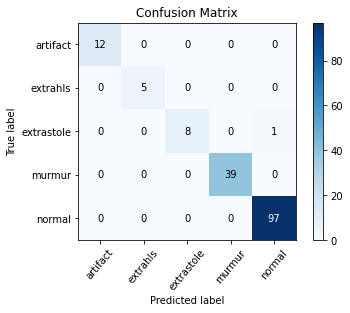

In [34]:
import tensorflow as tf
CNN_chunkSize2_another_way = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way')
testing_the_model(CNN_chunkSize2_another_way, 2, 'another')

Train: 300
Test: 162


  0%|          | 0/162 [00:00<?, ?it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 1/162 [00:01<03:12,  1.20s/it]

1/1 [==============================] - 0s 35ms/step


  1%|          | 2/162 [00:02<02:47,  1.05s/it]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 3/162 [00:02<01:48,  1.46it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 4/162 [00:02<01:37,  1.61it/s]

1/1 [==============================] - 0s 35ms/step


  3%|▎         | 5/162 [00:03<01:28,  1.78it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▎         | 6/162 [00:03<01:22,  1.90it/s]

1/1 [==============================] - 0s 33ms/step


  4%|▍         | 7/162 [00:04<01:07,  2.31it/s]

1/1 [==============================] - 0s 32ms/step


  5%|▍         | 8/162 [00:05<01:53,  1.36it/s]

1/1 [==============================] - 0s 37ms/step


  6%|▌         | 9/162 [00:05<01:29,  1.71it/s]

1/1 [==============================] - 0s 38ms/step


  6%|▌         | 10/162 [00:06<01:17,  1.95it/s]

1/1 [==============================] - 0s 61ms/step


  7%|▋         | 11/162 [00:06<01:31,  1.65it/s]

1/1 [==============================] - 0s 30ms/step


  7%|▋         | 12/162 [00:08<02:18,  1.08it/s]

1/1 [==============================] - 0s 34ms/step


  8%|▊         | 13/162 [00:09<02:02,  1.21it/s]

1/1 [==============================] - 0s 28ms/step


  9%|▊         | 14/162 [00:10<02:28,  1.00s/it]

1/1 [==============================] - 0s 29ms/step


  9%|▉         | 15/162 [00:11<02:06,  1.17it/s]

1/1 [==============================] - 0s 33ms/step


 10%|▉         | 16/162 [00:11<01:58,  1.23it/s]

1/1 [==============================] - 0s 29ms/step


 10%|█         | 17/162 [00:12<01:55,  1.25it/s]

1/1 [==============================] - 0s 31ms/step


 11%|█         | 18/162 [00:12<01:35,  1.51it/s]

1/1 [==============================] - 0s 30ms/step


 12%|█▏        | 19/162 [00:13<01:51,  1.29it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 20/162 [00:14<01:57,  1.21it/s]

1/1 [==============================] - 0s 30ms/step


 13%|█▎        | 21/162 [00:16<02:14,  1.05it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▎        | 22/162 [00:16<02:06,  1.11it/s]

1/1 [==============================] - 0s 32ms/step


 14%|█▍        | 23/162 [00:17<02:00,  1.15it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 24/162 [00:18<01:40,  1.38it/s]

1/1 [==============================] - 0s 29ms/step


 15%|█▌        | 25/162 [00:19<02:05,  1.09it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 26/162 [00:20<01:50,  1.23it/s]

1/1 [==============================] - 0s 45ms/step


 17%|█▋        | 27/162 [00:20<01:30,  1.49it/s]

1/1 [==============================] - 0s 29ms/step


 17%|█▋        | 28/162 [00:20<01:23,  1.61it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 29/162 [00:21<01:17,  1.72it/s]

1/1 [==============================] - 0s 40ms/step


 19%|█▊        | 30/162 [00:22<01:19,  1.65it/s]

1/1 [==============================] - 0s 30ms/step


 19%|█▉        | 31/162 [00:23<01:51,  1.17it/s]

1/1 [==============================] - 0s 24ms/step


 20%|█▉        | 32/162 [00:25<02:53,  1.33s/it]

1/1 [==============================] - 0s 30ms/step


 20%|██        | 33/162 [00:26<02:09,  1.00s/it]

1/1 [==============================] - 0s 30ms/step


 21%|██        | 34/162 [00:26<01:50,  1.15it/s]

1/1 [==============================] - 0s 24ms/step


 22%|██▏       | 35/162 [00:28<02:10,  1.03s/it]

1/1 [==============================] - 0s 35ms/step


 22%|██▏       | 36/162 [00:28<01:43,  1.22it/s]

1/1 [==============================] - 0s 23ms/step


 23%|██▎       | 37/162 [00:29<01:36,  1.30it/s]

1/1 [==============================] - 0s 26ms/step


 23%|██▎       | 38/162 [00:30<01:52,  1.10it/s]

1/1 [==============================] - 0s 26ms/step


 24%|██▍       | 39/162 [00:30<01:29,  1.37it/s]

1/1 [==============================] - 0s 28ms/step


 25%|██▍       | 40/162 [00:31<01:30,  1.35it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▌       | 41/162 [00:31<01:16,  1.57it/s]

1/1 [==============================] - 0s 27ms/step


 26%|██▌       | 42/162 [00:32<01:23,  1.44it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 43/162 [00:33<01:15,  1.58it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 44/162 [00:33<01:03,  1.86it/s]

1/1 [==============================] - 0s 42ms/step


 28%|██▊       | 45/162 [00:34<01:27,  1.34it/s]

1/1 [==============================] - 0s 47ms/step


 28%|██▊       | 46/162 [00:35<01:23,  1.40it/s]

1/1 [==============================] - 0s 46ms/step


 29%|██▉       | 47/162 [00:35<01:21,  1.41it/s]

1/1 [==============================] - 0s 28ms/step


 30%|██▉       | 48/162 [00:38<02:23,  1.26s/it]

1/1 [==============================] - 0s 30ms/step


 30%|███       | 49/162 [00:39<02:05,  1.11s/it]

1/1 [==============================] - 0s 31ms/step


 31%|███       | 50/162 [00:39<01:44,  1.07it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 51/162 [00:40<01:35,  1.17it/s]

1/1 [==============================] - 0s 31ms/step


 32%|███▏      | 52/162 [00:41<01:33,  1.17it/s]

1/1 [==============================] - 0s 29ms/step


 33%|███▎      | 53/162 [00:42<01:38,  1.10it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 54/162 [00:42<01:21,  1.32it/s]

1/1 [==============================] - 0s 24ms/step


 34%|███▍      | 55/162 [00:43<01:15,  1.41it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 56/162 [00:44<01:17,  1.38it/s]

1/1 [==============================] - 0s 26ms/step


 35%|███▌      | 57/162 [00:44<01:03,  1.65it/s]

1/1 [==============================] - 0s 27ms/step


 36%|███▌      | 58/162 [00:45<01:09,  1.49it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▋      | 59/162 [00:45<01:04,  1.60it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 60/162 [00:46<01:08,  1.48it/s]

1/1 [==============================] - 0s 25ms/step


 38%|███▊      | 61/162 [00:47<01:11,  1.42it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 62/162 [00:48<01:14,  1.34it/s]

1/1 [==============================] - 0s 58ms/step


 39%|███▉      | 63/162 [00:49<01:33,  1.06it/s]

1/1 [==============================] - 0s 29ms/step


 40%|███▉      | 64/162 [00:49<01:14,  1.32it/s]

1/1 [==============================] - 0s 55ms/step


 40%|████      | 65/162 [00:50<01:06,  1.46it/s]

1/1 [==============================] - 0s 88ms/step


 41%|████      | 66/162 [00:51<01:10,  1.36it/s]

1/1 [==============================] - 0s 50ms/step


 41%|████▏     | 67/162 [00:52<01:21,  1.16it/s]

1/1 [==============================] - 0s 28ms/step


 42%|████▏     | 68/162 [00:53<01:37,  1.04s/it]

1/1 [==============================] - 0s 62ms/step


 43%|████▎     | 69/162 [00:54<01:23,  1.11it/s]

1/1 [==============================] - 0s 41ms/step


 43%|████▎     | 70/162 [00:55<01:20,  1.14it/s]

1/1 [==============================] - 0s 33ms/step


 44%|████▍     | 71/162 [00:56<01:18,  1.16it/s]

1/1 [==============================] - 0s 28ms/step


 44%|████▍     | 72/162 [00:56<01:10,  1.28it/s]

1/1 [==============================] - 0s 26ms/step


 45%|████▌     | 73/162 [00:57<01:14,  1.20it/s]

1/1 [==============================] - 0s 30ms/step


 46%|████▌     | 74/162 [00:58<01:02,  1.42it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▋     | 75/162 [00:58<01:03,  1.38it/s]

1/1 [==============================] - 0s 26ms/step


 47%|████▋     | 76/162 [00:59<00:54,  1.58it/s]

1/1 [==============================] - 0s 122ms/step


 48%|████▊     | 77/162 [00:59<00:53,  1.60it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 78/162 [01:01<01:26,  1.03s/it]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 79/162 [01:02<01:13,  1.13it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 80/162 [01:03<01:07,  1.22it/s]

1/1 [==============================] - 0s 33ms/step


 50%|█████     | 81/162 [01:03<01:01,  1.31it/s]

1/1 [==============================] - 0s 27ms/step


 51%|█████     | 82/162 [01:04<01:10,  1.14it/s]

1/1 [==============================] - 0s 47ms/step


 51%|█████     | 83/162 [01:05<01:04,  1.23it/s]

1/1 [==============================] - 0s 63ms/step


 52%|█████▏    | 84/162 [01:06<00:56,  1.39it/s]

1/1 [==============================] - 0s 28ms/step


 52%|█████▏    | 85/162 [01:06<00:58,  1.31it/s]

1/1 [==============================] - 0s 28ms/step


 53%|█████▎    | 86/162 [01:07<01:05,  1.16it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████▎    | 87/162 [01:08<00:52,  1.44it/s]

1/1 [==============================] - 0s 30ms/step


 54%|█████▍    | 88/162 [01:09<00:53,  1.39it/s]

1/1 [==============================] - 0s 31ms/step


 55%|█████▍    | 89/162 [01:09<00:53,  1.35it/s]

1/1 [==============================] - 0s 32ms/step


 56%|█████▌    | 90/162 [01:10<00:42,  1.71it/s]

1/1 [==============================] - 0s 27ms/step


 56%|█████▌    | 91/162 [01:10<00:45,  1.55it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 92/162 [01:11<00:47,  1.46it/s]

1/1 [==============================] - 0s 31ms/step


 57%|█████▋    | 93/162 [01:12<00:47,  1.47it/s]

1/1 [==============================] - 0s 24ms/step


 58%|█████▊    | 94/162 [01:12<00:38,  1.75it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▊    | 95/162 [01:13<00:54,  1.24it/s]

1/1 [==============================] - 0s 24ms/step


 59%|█████▉    | 96/162 [01:14<00:53,  1.22it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 97/162 [01:15<00:51,  1.26it/s]

1/1 [==============================] - 0s 28ms/step


 60%|██████    | 98/162 [01:16<00:50,  1.27it/s]

1/1 [==============================] - 0s 31ms/step


 61%|██████    | 99/162 [01:16<00:39,  1.60it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 100/162 [01:17<00:40,  1.52it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 101/162 [01:17<00:32,  1.90it/s]

1/1 [==============================] - 0s 46ms/step


 63%|██████▎   | 102/162 [01:18<00:39,  1.53it/s]

1/1 [==============================] - 0s 58ms/step


 64%|██████▎   | 103/162 [01:20<00:56,  1.05it/s]

1/1 [==============================] - 0s 31ms/step


 64%|██████▍   | 104/162 [01:20<00:46,  1.25it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▍   | 105/162 [01:21<00:52,  1.08it/s]

1/1 [==============================] - 0s 41ms/step


 65%|██████▌   | 106/162 [01:22<00:42,  1.32it/s]

1/1 [==============================] - 0s 29ms/step


 66%|██████▌   | 107/162 [01:22<00:42,  1.31it/s]

1/1 [==============================] - 0s 26ms/step


 67%|██████▋   | 108/162 [01:23<00:38,  1.40it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 109/162 [01:24<00:35,  1.50it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 110/162 [01:25<00:40,  1.29it/s]

1/1 [==============================] - 0s 30ms/step


 69%|██████▊   | 111/162 [01:25<00:32,  1.56it/s]

1/1 [==============================] - 0s 26ms/step


 69%|██████▉   | 112/162 [01:26<00:39,  1.27it/s]

1/1 [==============================] - 0s 26ms/step


 70%|██████▉   | 113/162 [01:27<00:35,  1.37it/s]

1/1 [==============================] - 0s 27ms/step


 70%|███████   | 114/162 [01:28<00:40,  1.19it/s]

1/1 [==============================] - 0s 25ms/step


 71%|███████   | 115/162 [01:28<00:35,  1.32it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 116/162 [01:29<00:35,  1.31it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 117/162 [01:29<00:28,  1.60it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 118/162 [01:30<00:24,  1.77it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 119/162 [01:30<00:21,  2.04it/s]

1/1 [==============================] - 0s 27ms/step


 74%|███████▍  | 120/162 [01:30<00:17,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 121/162 [01:31<00:19,  2.15it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▌  | 122/162 [01:32<00:31,  1.29it/s]

1/1 [==============================] - 0s 44ms/step


 76%|███████▌  | 123/162 [01:33<00:27,  1.44it/s]

1/1 [==============================] - 0s 226ms/step


 77%|███████▋  | 124/162 [01:35<00:42,  1.13s/it]

1/1 [==============================] - 0s 26ms/step


 77%|███████▋  | 125/162 [01:36<00:38,  1.04s/it]

1/1 [==============================] - 0s 42ms/step


 78%|███████▊  | 126/162 [01:38<00:43,  1.20s/it]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 127/162 [01:39<00:41,  1.19s/it]

1/1 [==============================] - 0s 71ms/step


 79%|███████▉  | 128/162 [01:40<00:40,  1.19s/it]

1/1 [==============================] - 0s 27ms/step


 80%|███████▉  | 129/162 [01:41<00:37,  1.15s/it]

1/1 [==============================] - 0s 31ms/step


 80%|████████  | 130/162 [01:41<00:28,  1.11it/s]

1/1 [==============================] - 0s 30ms/step


 81%|████████  | 131/162 [01:43<00:31,  1.01s/it]

1/1 [==============================] - 0s 31ms/step


 81%|████████▏ | 132/162 [01:43<00:23,  1.29it/s]

1/1 [==============================] - 0s 26ms/step


 82%|████████▏ | 133/162 [01:43<00:20,  1.42it/s]

1/1 [==============================] - 0s 29ms/step


 83%|████████▎ | 134/162 [01:44<00:21,  1.30it/s]

1/1 [==============================] - 0s 25ms/step


 83%|████████▎ | 135/162 [01:45<00:17,  1.52it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 136/162 [01:45<00:17,  1.50it/s]

1/1 [==============================] - 0s 27ms/step


 85%|████████▍ | 137/162 [01:46<00:19,  1.28it/s]

1/1 [==============================] - 0s 30ms/step


 85%|████████▌ | 138/162 [01:47<00:15,  1.52it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▌ | 139/162 [01:48<00:17,  1.30it/s]

1/1 [==============================] - 0s 48ms/step


 86%|████████▋ | 140/162 [01:49<00:19,  1.11it/s]

1/1 [==============================] - 0s 32ms/step


 87%|████████▋ | 141/162 [01:50<00:18,  1.13it/s]

1/1 [==============================] - 0s 25ms/step


 88%|████████▊ | 142/162 [01:50<00:14,  1.40it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 143/162 [01:51<00:12,  1.47it/s]

1/1 [==============================] - 0s 34ms/step


 89%|████████▉ | 144/162 [01:51<00:11,  1.51it/s]

1/1 [==============================] - 0s 28ms/step


 90%|████████▉ | 145/162 [01:52<00:11,  1.42it/s]

1/1 [==============================] - 0s 29ms/step


 90%|█████████ | 146/162 [01:53<00:11,  1.42it/s]

1/1 [==============================] - 0s 28ms/step


 91%|█████████ | 147/162 [01:53<00:08,  1.70it/s]

1/1 [==============================] - 0s 24ms/step


 91%|█████████▏| 148/162 [01:54<00:08,  1.61it/s]

1/1 [==============================] - 0s 35ms/step


 92%|█████████▏| 149/162 [01:54<00:07,  1.86it/s]

1/1 [==============================] - 0s 25ms/step


 93%|█████████▎| 150/162 [01:55<00:06,  1.97it/s]

1/1 [==============================] - 0s 42ms/step


 93%|█████████▎| 151/162 [01:55<00:05,  1.85it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 152/162 [01:56<00:05,  1.78it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 153/162 [01:56<00:05,  1.77it/s]

1/1 [==============================] - 0s 26ms/step


 95%|█████████▌| 154/162 [01:57<00:04,  1.93it/s]

1/1 [==============================] - 0s 26ms/step


 96%|█████████▌| 155/162 [01:57<00:03,  2.03it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▋| 156/162 [01:58<00:02,  2.39it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 157/162 [01:58<00:02,  2.09it/s]

1/1 [==============================] - 0s 43ms/step


 98%|█████████▊| 158/162 [01:59<00:02,  1.68it/s]

1/1 [==============================] - 0s 38ms/step


 98%|█████████▊| 159/162 [02:00<00:02,  1.39it/s]

1/1 [==============================] - 0s 33ms/step


 99%|█████████▉| 160/162 [02:01<00:01,  1.26it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 161/162 [02:02<00:00,  1.01it/s]

1/1 [==============================] - 0s 28ms/step


100%|██████████| 162/162 [02:03<00:00,  1.31it/s]

              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00        15
    extrahls       1.00      1.00      1.00         3
  extrastole       1.00      0.92      0.96        12
      murmur       0.96      1.00      0.98        43
      normal       1.00      0.99      0.99        89

    accuracy                           0.99       162
   macro avg       0.99      0.98      0.99       162
weighted avg       0.99      0.99      0.99       162



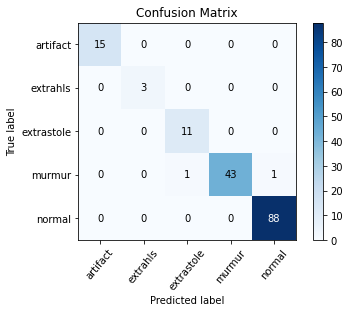

In [36]:
import tensorflow as tf
CNN_chunkSize2_another_way = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize2_another_way')
testing_the_model(CNN_chunkSize2_another_way, 2, 'another',38)

Train: 300
Test: 162


  0%|          | 0/162 [00:00<?, ?it/s]

1/1 [==============================] - 0s 61ms/step


  1%|          | 1/162 [00:00<01:15,  2.14it/s]

1/1 [==============================] - 0s 35ms/step


  1%|          | 2/162 [00:00<00:59,  2.71it/s]

1/1 [==============================] - 0s 41ms/step


  2%|▏         | 3/162 [00:00<00:44,  3.54it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 4/162 [00:01<00:47,  3.32it/s]

1/1 [==============================] - 0s 64ms/step


  3%|▎         | 5/162 [00:01<00:56,  2.80it/s]<ipython-input-4-0eb54010d844>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, offset=offset, duration=duration)


1/1 [==============================] - 0s 149ms/step


  4%|▎         | 6/162 [00:02<00:54,  2.86it/s]

1/1 [==============================] - 0s 56ms/step


  4%|▍         | 7/162 [00:02<00:55,  2.81it/s]

1/1 [==============================] - 0s 63ms/step


  5%|▍         | 8/162 [00:03<01:13,  2.10it/s]

1/1 [==============================] - 0s 27ms/step


  6%|▌         | 9/162 [00:03<01:00,  2.54it/s]

1/1 [==============================] - 0s 28ms/step


  6%|▌         | 10/162 [00:03<00:57,  2.65it/s]

1/1 [==============================] - 0s 29ms/step


  7%|▋         | 11/162 [00:04<00:54,  2.76it/s]

1/1 [==============================] - 0s 32ms/step


  7%|▋         | 12/162 [00:04<00:52,  2.86it/s]

1/1 [==============================] - 0s 26ms/step


  8%|▊         | 13/162 [00:04<00:52,  2.86it/s]

1/1 [==============================] - 0s 34ms/step


  9%|▊         | 14/162 [00:04<00:46,  3.16it/s]

1/1 [==============================] - 0s 26ms/step


  9%|▉         | 15/162 [00:05<00:43,  3.40it/s]

1/1 [==============================] - 0s 24ms/step


 10%|▉         | 16/162 [00:05<00:40,  3.62it/s]

1/1 [==============================] - 0s 29ms/step


 10%|█         | 17/162 [00:05<00:39,  3.71it/s]

1/1 [==============================] - 0s 28ms/step


 11%|█         | 18/162 [00:05<00:37,  3.85it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 19/162 [00:06<00:39,  3.63it/s]

1/1 [==============================] - 0s 30ms/step


 12%|█▏        | 20/162 [00:06<00:37,  3.81it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 21/162 [00:06<00:36,  3.85it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▎        | 22/162 [00:06<00:34,  4.02it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▍        | 23/162 [00:07<00:30,  4.58it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 24/162 [00:07<00:26,  5.14it/s]

1/1 [==============================] - 0s 33ms/step


 15%|█▌        | 25/162 [00:07<00:35,  3.81it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 26/162 [00:08<00:45,  2.98it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 27/162 [00:08<00:37,  3.61it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 28/162 [00:08<00:39,  3.35it/s]

1/1 [==============================] - 0s 29ms/step


 18%|█▊        | 29/162 [00:08<00:36,  3.61it/s]

1/1 [==============================] - 0s 45ms/step


 19%|█▊        | 30/162 [00:09<00:42,  3.10it/s]

1/1 [==============================] - 0s 45ms/step


 19%|█▉        | 31/162 [00:09<00:43,  2.99it/s]

1/1 [==============================] - 0s 35ms/step


 20%|█▉        | 32/162 [00:10<00:50,  2.60it/s]

1/1 [==============================] - 0s 54ms/step


 20%|██        | 33/162 [00:10<01:01,  2.09it/s]

1/1 [==============================] - 0s 28ms/step


 21%|██        | 34/162 [00:11<01:02,  2.06it/s]

1/1 [==============================] - 0s 31ms/step


 22%|██▏       | 35/162 [00:11<01:02,  2.02it/s]

1/1 [==============================] - 0s 44ms/step


 22%|██▏       | 36/162 [00:12<00:52,  2.41it/s]

1/1 [==============================] - 0s 60ms/step


 23%|██▎       | 37/162 [00:12<00:43,  2.84it/s]

1/1 [==============================] - 0s 69ms/step


 23%|██▎       | 38/162 [00:12<00:38,  3.25it/s]

1/1 [==============================] - 0s 40ms/step


 24%|██▍       | 39/162 [00:13<00:46,  2.66it/s]

1/1 [==============================] - 0s 31ms/step


 25%|██▍       | 40/162 [00:13<00:37,  3.27it/s]

1/1 [==============================] - 0s 25ms/step


 25%|██▌       | 41/162 [00:13<00:34,  3.55it/s]

1/1 [==============================] - 0s 30ms/step


 26%|██▌       | 42/162 [00:13<00:42,  2.81it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 43/162 [00:14<00:43,  2.72it/s]

1/1 [==============================] - 0s 26ms/step


 27%|██▋       | 44/162 [00:14<00:38,  3.08it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 45/162 [00:14<00:35,  3.28it/s]

1/1 [==============================] - 0s 28ms/step


 28%|██▊       | 46/162 [00:15<00:33,  3.50it/s]

1/1 [==============================] - 0s 30ms/step


 29%|██▉       | 47/162 [00:15<00:30,  3.72it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 48/162 [00:16<00:46,  2.47it/s]

1/1 [==============================] - 0s 32ms/step


 30%|███       | 49/162 [00:16<00:36,  3.06it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 50/162 [00:16<00:36,  3.06it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███▏      | 51/162 [00:16<00:30,  3.68it/s]

1/1 [==============================] - 0s 44ms/step


 32%|███▏      | 52/162 [00:16<00:29,  3.71it/s]

1/1 [==============================] - 0s 27ms/step


 33%|███▎      | 53/162 [00:17<00:25,  4.35it/s]

1/1 [==============================] - 0s 25ms/step


 33%|███▎      | 54/162 [00:17<00:21,  4.97it/s]

1/1 [==============================] - 0s 29ms/step


 34%|███▍      | 55/162 [00:17<00:19,  5.47it/s]

1/1 [==============================] - 0s 29ms/step


 35%|███▍      | 56/162 [00:17<00:18,  5.82it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 57/162 [00:17<00:20,  5.24it/s]

1/1 [==============================] - 0s 26ms/step


 36%|███▌      | 58/162 [00:17<00:21,  4.75it/s]

1/1 [==============================] - 0s 48ms/step


 36%|███▋      | 59/162 [00:18<00:28,  3.63it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 60/162 [00:18<00:26,  3.83it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 61/162 [00:18<00:25,  3.99it/s]

1/1 [==============================] - 0s 32ms/step


 38%|███▊      | 62/162 [00:19<00:25,  3.94it/s]

1/1 [==============================] - 0s 26ms/step


 39%|███▉      | 63/162 [00:19<00:24,  4.07it/s]

1/1 [==============================] - 0s 30ms/step


 40%|███▉      | 64/162 [00:19<00:23,  4.16it/s]

1/1 [==============================] - 0s 26ms/step


 40%|████      | 65/162 [00:19<00:23,  4.16it/s]

1/1 [==============================] - 0s 38ms/step


 41%|████      | 66/162 [00:19<00:20,  4.61it/s]

1/1 [==============================] - 0s 27ms/step


 41%|████▏     | 67/162 [00:20<00:20,  4.55it/s]

1/1 [==============================] - 0s 30ms/step


 42%|████▏     | 68/162 [00:20<00:21,  4.44it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 69/162 [00:20<00:18,  5.03it/s]

1/1 [==============================] - 0s 28ms/step


 43%|████▎     | 70/162 [00:20<00:16,  5.53it/s]

1/1 [==============================] - 0s 31ms/step


 44%|████▍     | 71/162 [00:20<00:15,  5.72it/s]

1/1 [==============================] - 0s 27ms/step


 44%|████▍     | 72/162 [00:21<00:17,  5.05it/s]

1/1 [==============================] - 0s 28ms/step


 45%|████▌     | 73/162 [00:21<00:15,  5.58it/s]

1/1 [==============================] - 0s 27ms/step


 46%|████▌     | 74/162 [00:21<00:17,  5.05it/s]

1/1 [==============================] - 0s 28ms/step


 46%|████▋     | 75/162 [00:21<00:20,  4.27it/s]

1/1 [==============================] - 0s 30ms/step


 47%|████▋     | 76/162 [00:22<00:23,  3.69it/s]

1/1 [==============================] - 0s 26ms/step


 48%|████▊     | 77/162 [00:22<00:21,  3.88it/s]

1/1 [==============================] - 0s 30ms/step


 48%|████▊     | 78/162 [00:22<00:23,  3.57it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 79/162 [00:22<00:22,  3.76it/s]

1/1 [==============================] - 0s 50ms/step


 49%|████▉     | 80/162 [00:23<00:27,  2.97it/s]

1/1 [==============================] - 0s 46ms/step


 50%|█████     | 81/162 [00:23<00:26,  3.00it/s]

1/1 [==============================] - 0s 53ms/step


 51%|█████     | 82/162 [00:24<00:28,  2.82it/s]

1/1 [==============================] - 0s 41ms/step


 51%|█████     | 83/162 [00:24<00:23,  3.34it/s]

1/1 [==============================] - 0s 47ms/step


 52%|█████▏    | 84/162 [00:24<00:29,  2.67it/s]

1/1 [==============================] - 0s 53ms/step


 52%|█████▏    | 85/162 [00:25<00:25,  3.05it/s]

1/1 [==============================] - 0s 52ms/step


 53%|█████▎    | 86/162 [00:25<00:36,  2.09it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▎    | 87/162 [00:26<00:29,  2.54it/s]

1/1 [==============================] - 0s 56ms/step


 54%|█████▍    | 88/162 [00:26<00:28,  2.57it/s]

1/1 [==============================] - 0s 44ms/step


 55%|█████▍    | 89/162 [00:26<00:24,  2.95it/s]

1/1 [==============================] - 0s 29ms/step


 56%|█████▌    | 90/162 [00:26<00:22,  3.22it/s]

1/1 [==============================] - 0s 24ms/step


 56%|█████▌    | 91/162 [00:27<00:20,  3.40it/s]

1/1 [==============================] - 0s 32ms/step


 57%|█████▋    | 92/162 [00:27<00:17,  4.02it/s]

1/1 [==============================] - 0s 29ms/step


 57%|█████▋    | 93/162 [00:27<00:14,  4.68it/s]

1/1 [==============================] - 0s 33ms/step


 58%|█████▊    | 94/162 [00:27<00:15,  4.52it/s]

1/1 [==============================] - 0s 42ms/step


 59%|█████▊    | 95/162 [00:28<00:19,  3.44it/s]

1/1 [==============================] - 0s 29ms/step


 59%|█████▉    | 96/162 [00:28<00:18,  3.65it/s]

1/1 [==============================] - 0s 29ms/step


 60%|█████▉    | 97/162 [00:28<00:16,  3.83it/s]

1/1 [==============================] - 0s 33ms/step


 60%|██████    | 98/162 [00:28<00:14,  4.40it/s]

1/1 [==============================] - 0s 35ms/step


 61%|██████    | 99/162 [00:28<00:12,  4.90it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 100/162 [00:29<00:15,  4.12it/s]

1/1 [==============================] - 0s 32ms/step


 62%|██████▏   | 101/162 [00:29<00:14,  4.09it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 102/162 [00:29<00:12,  4.69it/s]

1/1 [==============================] - 0s 26ms/step


 64%|██████▎   | 103/162 [00:29<00:11,  5.26it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 104/162 [00:30<00:11,  4.89it/s]

1/1 [==============================] - 0s 27ms/step


 65%|██████▍   | 105/162 [00:30<00:10,  5.43it/s]

1/1 [==============================] - 0s 28ms/step


 65%|██████▌   | 106/162 [00:30<00:12,  4.32it/s]

1/1 [==============================] - 0s 28ms/step


 66%|██████▌   | 107/162 [00:30<00:12,  4.32it/s]

1/1 [==============================] - 0s 25ms/step


 67%|██████▋   | 108/162 [00:31<00:12,  4.37it/s]

1/1 [==============================] - 0s 33ms/step


 67%|██████▋   | 109/162 [00:31<00:10,  4.91it/s]

1/1 [==============================] - 0s 26ms/step


 68%|██████▊   | 110/162 [00:31<00:14,  3.64it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▊   | 111/162 [00:31<00:11,  4.27it/s]

1/1 [==============================] - 0s 28ms/step


 69%|██████▉   | 112/162 [00:32<00:13,  3.83it/s]

1/1 [==============================] - 0s 30ms/step


 70%|██████▉   | 113/162 [00:32<00:15,  3.16it/s]

1/1 [==============================] - 0s 31ms/step


 70%|███████   | 114/162 [00:32<00:12,  3.79it/s]

1/1 [==============================] - 0s 24ms/step


 71%|███████   | 115/162 [00:32<00:11,  3.95it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 116/162 [00:33<00:12,  3.69it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 117/162 [00:33<00:11,  3.82it/s]

1/1 [==============================] - 0s 29ms/step


 73%|███████▎  | 118/162 [00:33<00:10,  4.36it/s]

1/1 [==============================] - 0s 32ms/step


 73%|███████▎  | 119/162 [00:33<00:09,  4.31it/s]

1/1 [==============================] - 0s 24ms/step


 74%|███████▍  | 120/162 [00:34<00:14,  2.90it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 121/162 [00:34<00:12,  3.23it/s]

1/1 [==============================] - 0s 29ms/step


 75%|███████▌  | 122/162 [00:34<00:12,  3.16it/s]

1/1 [==============================] - 0s 29ms/step


 76%|███████▌  | 123/162 [00:35<00:12,  3.14it/s]

1/1 [==============================] - 0s 29ms/step


 77%|███████▋  | 124/162 [00:35<00:11,  3.33it/s]

1/1 [==============================] - 0s 28ms/step


 77%|███████▋  | 125/162 [00:35<00:10,  3.54it/s]

1/1 [==============================] - 0s 27ms/step


 78%|███████▊  | 126/162 [00:36<00:09,  3.75it/s]

1/1 [==============================] - 0s 26ms/step


 78%|███████▊  | 127/162 [00:36<00:09,  3.87it/s]

1/1 [==============================] - 0s 36ms/step


 79%|███████▉  | 128/162 [00:36<00:07,  4.38it/s]

1/1 [==============================] - 0s 29ms/step


 80%|███████▉  | 129/162 [00:36<00:08,  3.89it/s]

1/1 [==============================] - 0s 47ms/step


 80%|████████  | 130/162 [00:37<00:08,  3.59it/s]

1/1 [==============================] - 0s 54ms/step


 81%|████████  | 131/162 [00:37<00:09,  3.23it/s]

1/1 [==============================] - 0s 53ms/step


 81%|████████▏ | 132/162 [00:37<00:08,  3.50it/s]

1/1 [==============================] - 0s 56ms/step


 82%|████████▏ | 133/162 [00:38<00:08,  3.29it/s]

1/1 [==============================] - 0s 54ms/step


 83%|████████▎ | 134/162 [00:38<00:07,  3.53it/s]

1/1 [==============================] - 0s 52ms/step


 83%|████████▎ | 135/162 [00:38<00:07,  3.66it/s]

1/1 [==============================] - 0s 55ms/step


 84%|████████▍ | 136/162 [00:38<00:07,  3.61it/s]

1/1 [==============================] - 0s 46ms/step


 85%|████████▍ | 137/162 [00:39<00:07,  3.22it/s]

1/1 [==============================] - 0s 55ms/step


 85%|████████▌ | 138/162 [00:39<00:06,  3.47it/s]

1/1 [==============================] - 0s 36ms/step


 86%|████████▌ | 139/162 [00:39<00:06,  3.77it/s]

1/1 [==============================] - 0s 65ms/step


 86%|████████▋ | 140/162 [00:40<00:12,  1.76it/s]

1/1 [==============================] - 0s 56ms/step


 87%|████████▋ | 141/162 [00:41<00:11,  1.91it/s]

1/1 [==============================] - 0s 67ms/step


 88%|████████▊ | 142/162 [00:41<00:09,  2.00it/s]

1/1 [==============================] - 0s 59ms/step


 88%|████████▊ | 143/162 [00:42<00:09,  2.08it/s]

1/1 [==============================] - 0s 63ms/step


 89%|████████▉ | 144/162 [00:42<00:08,  2.12it/s]

1/1 [==============================] - 0s 49ms/step


 90%|████████▉ | 145/162 [00:43<00:07,  2.24it/s]

1/1 [==============================] - 0s 37ms/step


 90%|█████████ | 146/162 [00:43<00:06,  2.38it/s]

1/1 [==============================] - 0s 42ms/step


 91%|█████████ | 147/162 [00:43<00:06,  2.22it/s]

1/1 [==============================] - 0s 37ms/step


 91%|█████████▏| 148/162 [00:44<00:06,  2.14it/s]

1/1 [==============================] - 0s 39ms/step


 92%|█████████▏| 149/162 [00:44<00:05,  2.28it/s]

1/1 [==============================] - 0s 37ms/step


 93%|█████████▎| 150/162 [00:45<00:05,  2.38it/s]

1/1 [==============================] - 0s 35ms/step


 93%|█████████▎| 151/162 [00:45<00:04,  2.50it/s]

1/1 [==============================] - 0s 35ms/step


 94%|█████████▍| 152/162 [00:45<00:03,  2.74it/s]

1/1 [==============================] - 0s 39ms/step


 94%|█████████▍| 153/162 [00:46<00:03,  2.96it/s]

1/1 [==============================] - 0s 44ms/step


 95%|█████████▌| 154/162 [00:46<00:02,  3.18it/s]

1/1 [==============================] - 0s 33ms/step


 96%|█████████▌| 155/162 [00:46<00:01,  3.76it/s]

1/1 [==============================] - 0s 36ms/step


 96%|█████████▋| 156/162 [00:46<00:01,  3.84it/s]

1/1 [==============================] - 0s 38ms/step


 97%|█████████▋| 157/162 [00:47<00:01,  3.80it/s]

1/1 [==============================] - 0s 33ms/step


 98%|█████████▊| 158/162 [00:47<00:01,  3.83it/s]

1/1 [==============================] - 0s 34ms/step


 98%|█████████▊| 159/162 [00:47<00:00,  3.92it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 160/162 [00:47<00:00,  4.48it/s]

1/1 [==============================] - 0s 32ms/step


 99%|█████████▉| 161/162 [00:47<00:00,  4.93it/s]

1/1 [==============================] - 0s 34ms/step


100%|██████████| 162/162 [00:48<00:00,  3.37it/s]

              precision    recall  f1-score   support

    artifact       0.92      0.73      0.81        15
    extrahls       1.00      0.50      0.67        10
  extrastole       0.00      0.00      0.00         0
      murmur       0.46      0.82      0.59        22
      normal       0.91      0.77      0.83       115

    accuracy                           0.75       162
   macro avg       0.66      0.56      0.58       162
weighted avg       0.85      0.75      0.79       162




/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


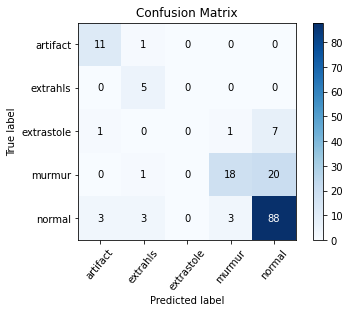

In [32]:
import tensorflow as tf
CNN_chunkSize4 = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize4')
testing_the_model(CNN_chunkSize4, 4, '')

Train: 300
Test: 162


  0%|          | 0/162 [00:00<?, ?it/s]

1/1 [==============================] - 0s 31ms/step


  1%|          | 1/162 [00:00<00:47,  3.37it/s]

1/1 [==============================] - 0s 32ms/step


  1%|          | 2/162 [00:00<01:00,  2.64it/s]

1/1 [==============================] - 0s 30ms/step


  2%|▏         | 3/162 [00:00<00:42,  3.73it/s]

1/1 [==============================] - 0s 43ms/step


  2%|▏         | 4/162 [00:01<00:57,  2.74it/s]

1/1 [==============================] - 0s 48ms/step


  3%|▎         | 5/162 [00:02<01:23,  1.87it/s]

1/1 [==============================] - 0s 43ms/step


  4%|▎         | 6/162 [00:02<01:07,  2.32it/s]

1/1 [==============================] - 0s 48ms/step


  4%|▍         | 7/162 [00:03<01:17,  2.00it/s]

1/1 [==============================] - 0s 43ms/step


  5%|▍         | 8/162 [00:03<01:28,  1.74it/s]

1/1 [==============================] - 0s 31ms/step


  6%|▌         | 9/162 [00:04<01:17,  1.96it/s]

1/1 [==============================] - 0s 50ms/step


  6%|▌         | 10/162 [00:04<01:19,  1.91it/s]

1/1 [==============================] - 0s 25ms/step


  7%|▋         | 11/162 [00:05<01:17,  1.94it/s]

1/1 [==============================] - 0s 39ms/step


  7%|▋         | 12/162 [00:05<01:17,  1.93it/s]

1/1 [==============================] - 0s 29ms/step


  8%|▊         | 13/162 [00:06<01:13,  2.02it/s]

1/1 [==============================] - 0s 25ms/step


  9%|▊         | 14/162 [00:06<01:05,  2.25it/s]

1/1 [==============================] - 0s 27ms/step


  9%|▉         | 15/162 [00:06<00:59,  2.45it/s]

1/1 [==============================] - 0s 26ms/step


 10%|▉         | 16/162 [00:07<00:56,  2.60it/s]

1/1 [==============================] - 0s 27ms/step


 10%|█         | 17/162 [00:07<00:55,  2.60it/s]

1/1 [==============================] - 0s 31ms/step


 11%|█         | 18/162 [00:08<00:58,  2.48it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 19/162 [00:08<00:57,  2.50it/s]

1/1 [==============================] - 0s 26ms/step


 12%|█▏        | 20/162 [00:08<00:56,  2.50it/s]

1/1 [==============================] - 0s 28ms/step


 13%|█▎        | 21/162 [00:09<00:53,  2.61it/s]

1/1 [==============================] - 0s 27ms/step


 14%|█▎        | 22/162 [00:09<00:50,  2.76it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▍        | 23/162 [00:09<00:40,  3.39it/s]

1/1 [==============================] - 0s 30ms/step


 15%|█▍        | 24/162 [00:09<00:34,  4.03it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█▌        | 25/162 [00:10<00:53,  2.55it/s]

1/1 [==============================] - 0s 26ms/step


 16%|█▌        | 26/162 [00:11<01:10,  1.93it/s]

1/1 [==============================] - 0s 28ms/step


 17%|█▋        | 27/162 [00:11<00:54,  2.46it/s]

1/1 [==============================] - 0s 25ms/step


 17%|█▋        | 28/162 [00:12<01:03,  2.10it/s]

1/1 [==============================] - 0s 38ms/step


 18%|█▊        | 29/162 [00:12<01:00,  2.19it/s]

1/1 [==============================] - 0s 26ms/step


 19%|█▊        | 30/162 [00:13<01:02,  2.10it/s]

1/1 [==============================] - 0s 28ms/step


 19%|█▉        | 31/162 [00:13<00:59,  2.20it/s]

1/1 [==============================] - 0s 27ms/step


 20%|█▉        | 32/162 [00:13<01:00,  2.13it/s]

1/1 [==============================] - 0s 25ms/step


 20%|██        | 33/162 [00:14<01:04,  2.00it/s]

1/1 [==============================] - 0s 26ms/step


 21%|██        | 34/162 [00:14<01:00,  2.13it/s]

1/1 [==============================] - 0s 49ms/step


 22%|██▏       | 35/162 [00:15<01:13,  1.72it/s]

1/1 [==============================] - 0s 52ms/step


 22%|██▏       | 36/162 [00:15<01:00,  2.08it/s]

1/1 [==============================] - 0s 40ms/step


 23%|██▎       | 37/162 [00:16<00:48,  2.55it/s]

1/1 [==============================] - 0s 48ms/step


 23%|██▎       | 38/162 [00:16<00:42,  2.94it/s]

1/1 [==============================] - 0s 45ms/step


 24%|██▍       | 39/162 [00:17<01:00,  2.04it/s]

1/1 [==============================] - 0s 49ms/step


 25%|██▍       | 40/162 [00:17<00:53,  2.26it/s]

1/1 [==============================] - 0s 46ms/step


 25%|██▌       | 41/162 [00:18<01:03,  1.91it/s]

1/1 [==============================] - 0s 33ms/step


 26%|██▌       | 42/162 [00:19<01:26,  1.38it/s]

1/1 [==============================] - 0s 27ms/step


 27%|██▋       | 43/162 [00:20<01:20,  1.48it/s]

1/1 [==============================] - 0s 35ms/step


 27%|██▋       | 44/162 [00:20<01:08,  1.72it/s]

1/1 [==============================] - 0s 24ms/step


 28%|██▊       | 45/162 [00:20<00:58,  2.01it/s]

1/1 [==============================] - 0s 27ms/step


 28%|██▊       | 46/162 [00:21<00:53,  2.16it/s]

1/1 [==============================] - 0s 28ms/step


 29%|██▉       | 47/162 [00:21<00:51,  2.23it/s]

1/1 [==============================] - 0s 26ms/step


 30%|██▉       | 48/162 [00:22<01:16,  1.49it/s]

1/1 [==============================] - 0s 26ms/step


 30%|███       | 49/162 [00:22<00:57,  1.96it/s]

1/1 [==============================] - 0s 32ms/step


 31%|███       | 50/162 [00:23<00:57,  1.94it/s]

1/1 [==============================] - 0s 26ms/step


 31%|███▏      | 51/162 [00:23<00:47,  2.34it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 52/162 [00:23<00:44,  2.50it/s]

1/1 [==============================] - 0s 32ms/step


 33%|███▎      | 53/162 [00:24<00:35,  3.10it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 54/162 [00:24<00:29,  3.67it/s]

1/1 [==============================] - 0s 28ms/step


 34%|███▍      | 55/162 [00:24<00:28,  3.82it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▍      | 56/162 [00:24<00:24,  4.39it/s]

1/1 [==============================] - 0s 27ms/step


 35%|███▌      | 57/162 [00:24<00:23,  4.40it/s]

1/1 [==============================] - 0s 34ms/step


 36%|███▌      | 58/162 [00:25<00:26,  3.90it/s]

1/1 [==============================] - 0s 29ms/step


 36%|███▋      | 59/162 [00:25<00:39,  2.60it/s]

1/1 [==============================] - 0s 28ms/step


 37%|███▋      | 60/162 [00:26<00:41,  2.47it/s]

1/1 [==============================] - 0s 28ms/step


 38%|███▊      | 61/162 [00:26<00:35,  2.85it/s]

1/1 [==============================] - 0s 31ms/step


 38%|███▊      | 62/162 [00:26<00:37,  2.66it/s]

1/1 [==============================] - 0s 31ms/step


 39%|███▉      | 63/162 [00:27<00:35,  2.78it/s]

1/1 [==============================] - 0s 26ms/step


 40%|███▉      | 64/162 [00:27<00:35,  2.76it/s]

1/1 [==============================] - 0s 28ms/step


 40%|████      | 65/162 [00:28<00:36,  2.63it/s]

1/1 [==============================] - 0s 30ms/step


 41%|████      | 66/162 [00:28<00:29,  3.23it/s]

1/1 [==============================] - 0s 28ms/step


 41%|████▏     | 67/162 [00:28<00:32,  2.92it/s]

1/1 [==============================] - 0s 52ms/step


 42%|████▏     | 68/162 [00:29<00:38,  2.43it/s]

1/1 [==============================] - 0s 43ms/step


 43%|████▎     | 69/162 [00:29<00:32,  2.85it/s]

1/1 [==============================] - 0s 55ms/step


 43%|████▎     | 70/162 [00:29<00:32,  2.84it/s]

1/1 [==============================] - 0s 44ms/step


 44%|████▍     | 71/162 [00:29<00:28,  3.18it/s]

1/1 [==============================] - 0s 52ms/step


 44%|████▍     | 72/162 [00:30<00:31,  2.84it/s]

1/1 [==============================] - 0s 42ms/step


 45%|████▌     | 73/162 [00:30<00:28,  3.12it/s]

1/1 [==============================] - 0s 54ms/step


 46%|████▌     | 74/162 [00:31<00:32,  2.73it/s]

1/1 [==============================] - 0s 46ms/step


 46%|████▋     | 75/162 [00:31<00:43,  1.98it/s]

1/1 [==============================] - 0s 28ms/step


 47%|████▋     | 76/162 [00:32<00:46,  1.86it/s]

1/1 [==============================] - 0s 28ms/step


 48%|████▊     | 77/162 [00:33<00:43,  1.95it/s]

1/1 [==============================] - 0s 25ms/step


 48%|████▊     | 78/162 [00:33<00:42,  1.96it/s]

1/1 [==============================] - 0s 25ms/step


 49%|████▉     | 79/162 [00:33<00:37,  2.21it/s]

1/1 [==============================] - 0s 26ms/step


 49%|████▉     | 80/162 [00:34<00:36,  2.26it/s]

1/1 [==============================] - 0s 24ms/step


 50%|█████     | 81/162 [00:34<00:32,  2.47it/s]

1/1 [==============================] - 0s 34ms/step


 51%|█████     | 82/162 [00:34<00:32,  2.43it/s]

1/1 [==============================] - 0s 30ms/step


 51%|█████     | 83/162 [00:35<00:26,  3.02it/s]

1/1 [==============================] - 0s 27ms/step


 52%|█████▏    | 84/162 [00:35<00:27,  2.82it/s]

1/1 [==============================] - 0s 40ms/step


 52%|█████▏    | 85/162 [00:35<00:22,  3.41it/s]

1/1 [==============================] - 0s 31ms/step


 53%|█████▎    | 86/162 [00:36<00:33,  2.27it/s]

1/1 [==============================] - 0s 32ms/step


 54%|█████▎    | 87/162 [00:36<00:26,  2.82it/s]

1/1 [==============================] - 0s 25ms/step


 54%|█████▍    | 88/162 [00:36<00:25,  2.85it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 89/162 [00:37<00:21,  3.40it/s]

1/1 [==============================] - 0s 25ms/step


 56%|█████▌    | 90/162 [00:37<00:23,  3.12it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 91/162 [00:37<00:25,  2.83it/s]

1/1 [==============================] - 0s 52ms/step


 57%|█████▋    | 92/162 [00:38<00:20,  3.36it/s]

1/1 [==============================] - 0s 25ms/step


 57%|█████▋    | 93/162 [00:38<00:17,  4.04it/s]

1/1 [==============================] - 0s 25ms/step


 58%|█████▊    | 94/162 [00:38<00:18,  3.69it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▊    | 95/162 [00:39<00:25,  2.67it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 96/162 [00:39<00:25,  2.56it/s]

1/1 [==============================] - 0s 33ms/step


 60%|█████▉    | 97/162 [00:40<00:26,  2.45it/s]

1/1 [==============================] - 0s 25ms/step


 60%|██████    | 98/162 [00:40<00:22,  2.83it/s]

1/1 [==============================] - 0s 29ms/step


 61%|██████    | 99/162 [00:40<00:18,  3.47it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 100/162 [00:41<00:23,  2.59it/s]

1/1 [==============================] - 0s 29ms/step


 62%|██████▏   | 101/162 [00:41<00:22,  2.69it/s]

1/1 [==============================] - 0s 29ms/step


 63%|██████▎   | 102/162 [00:41<00:18,  3.29it/s]

1/1 [==============================] - 0s 29ms/step


 64%|██████▎   | 103/162 [00:41<00:15,  3.92it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▍   | 104/162 [00:42<00:17,  3.29it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 105/162 [00:42<00:16,  3.56it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▌   | 106/162 [00:42<00:22,  2.53it/s]

1/1 [==============================] - 0s 32ms/step


 66%|██████▌   | 107/162 [00:43<00:20,  2.67it/s]

1/1 [==============================] - 0s 43ms/step


 67%|██████▋   | 108/162 [00:43<00:24,  2.20it/s]

1/1 [==============================] - 0s 49ms/step


 67%|██████▋   | 109/162 [00:44<00:22,  2.39it/s]

1/1 [==============================] - 0s 42ms/step


 68%|██████▊   | 110/162 [00:45<00:31,  1.65it/s]

1/1 [==============================] - 0s 39ms/step


 69%|██████▊   | 111/162 [00:45<00:25,  2.03it/s]

1/1 [==============================] - 0s 41ms/step


 69%|██████▉   | 112/162 [00:46<00:25,  1.93it/s]

1/1 [==============================] - 0s 29ms/step


 70%|██████▉   | 113/162 [00:47<00:32,  1.50it/s]

1/1 [==============================] - 0s 24ms/step


 70%|███████   | 114/162 [00:47<00:24,  1.96it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 115/162 [00:47<00:20,  2.34it/s]

1/1 [==============================] - 0s 25ms/step


 72%|███████▏  | 116/162 [00:48<00:20,  2.21it/s]

1/1 [==============================] - 0s 28ms/step


 72%|███████▏  | 117/162 [00:48<00:17,  2.59it/s]

1/1 [==============================] - 0s 27ms/step


 73%|███████▎  | 118/162 [00:48<00:13,  3.19it/s]

1/1 [==============================] - 0s 36ms/step


 73%|███████▎  | 119/162 [00:48<00:14,  2.91it/s]

1/1 [==============================] - 0s 28ms/step


 74%|███████▍  | 120/162 [00:49<00:22,  1.86it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 121/162 [00:50<00:20,  2.00it/s]

1/1 [==============================] - 0s 24ms/step


 75%|███████▌  | 122/162 [00:50<00:20,  1.98it/s]

1/1 [==============================] - 0s 32ms/step


 76%|███████▌  | 123/162 [00:51<00:19,  2.04it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 124/162 [00:51<00:16,  2.28it/s]

1/1 [==============================] - 0s 31ms/step


 77%|███████▋  | 125/162 [00:51<00:14,  2.47it/s]

1/1 [==============================] - 0s 28ms/step


 78%|███████▊  | 126/162 [00:52<00:12,  2.83it/s]

1/1 [==============================] - 0s 31ms/step


 78%|███████▊  | 127/162 [00:52<00:12,  2.82it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 128/162 [00:52<00:09,  3.43it/s]

1/1 [==============================] - 0s 25ms/step


 80%|███████▉  | 129/162 [00:53<00:11,  2.83it/s]

1/1 [==============================] - 0s 25ms/step


 80%|████████  | 130/162 [00:53<00:11,  2.85it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████  | 131/162 [00:53<00:11,  2.75it/s]

1/1 [==============================] - 0s 27ms/step


 81%|████████▏ | 132/162 [00:54<00:09,  3.10it/s]

1/1 [==============================] - 0s 32ms/step


 82%|████████▏ | 133/162 [00:54<00:10,  2.83it/s]

1/1 [==============================] - 0s 32ms/step


 83%|████████▎ | 134/162 [00:54<00:08,  3.43it/s]

1/1 [==============================] - 0s 31ms/step


 83%|████████▎ | 135/162 [00:54<00:06,  4.09it/s]

1/1 [==============================] - 0s 26ms/step


 84%|████████▍ | 136/162 [00:54<00:06,  4.15it/s]

1/1 [==============================] - 0s 31ms/step


 85%|████████▍ | 137/162 [00:55<00:07,  3.29it/s]

1/1 [==============================] - 0s 45ms/step


 85%|████████▌ | 138/162 [00:55<00:06,  3.85it/s]

1/1 [==============================] - 0s 27ms/step


 86%|████████▌ | 139/162 [00:55<00:05,  3.98it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▋ | 140/162 [00:56<00:08,  2.54it/s]

1/1 [==============================] - 0s 28ms/step


 87%|████████▋ | 141/162 [00:56<00:07,  2.65it/s]

1/1 [==============================] - 0s 51ms/step


 88%|████████▊ | 142/162 [00:57<00:08,  2.35it/s]

1/1 [==============================] - 0s 45ms/step


 88%|████████▊ | 143/162 [00:57<00:08,  2.26it/s]

1/1 [==============================] - 0s 43ms/step


 89%|████████▉ | 144/162 [00:58<00:08,  2.12it/s]

1/1 [==============================] - 0s 42ms/step


 90%|████████▉ | 145/162 [00:59<00:08,  1.91it/s]

1/1 [==============================] - 0s 40ms/step


 90%|█████████ | 146/162 [00:59<00:07,  2.16it/s]

1/1 [==============================] - 0s 49ms/step


 91%|█████████ | 147/162 [01:00<00:08,  1.76it/s]

1/1 [==============================] - 0s 49ms/step


 91%|█████████▏| 148/162 [01:01<00:09,  1.55it/s]

1/1 [==============================] - 0s 26ms/step


 92%|█████████▏| 149/162 [01:01<00:08,  1.62it/s]

1/1 [==============================] - 0s 28ms/step


 93%|█████████▎| 150/162 [01:02<00:07,  1.71it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████▎| 151/162 [01:02<00:06,  1.74it/s]

1/1 [==============================] - 0s 26ms/step


 94%|█████████▍| 152/162 [01:02<00:05,  2.00it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 153/162 [01:03<00:04,  2.09it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 154/162 [01:03<00:03,  2.43it/s]

1/1 [==============================] - 0s 32ms/step


 96%|█████████▌| 155/162 [01:03<00:02,  2.81it/s]

1/1 [==============================] - 0s 25ms/step


 96%|█████████▋| 156/162 [01:04<00:02,  2.88it/s]

1/1 [==============================] - 0s 28ms/step


 97%|█████████▋| 157/162 [01:04<00:01,  2.96it/s]

1/1 [==============================] - 0s 28ms/step


 98%|█████████▊| 158/162 [01:04<00:01,  2.74it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 159/162 [01:05<00:01,  2.83it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 160/162 [01:05<00:00,  3.44it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 161/162 [01:05<00:00,  3.99it/s]

1/1 [==============================] - 0s 28ms/step


100%|██████████| 162/162 [01:05<00:00,  2.46it/s]

              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00        12
    extrahls       1.00      1.00      1.00         5
  extrastole       0.78      0.78      0.78         9
      murmur       0.95      0.84      0.89        44
      normal       0.92      0.97      0.94        92

    accuracy                           0.93       162
   macro avg       0.93      0.92      0.92       162
weighted avg       0.93      0.93      0.93       162



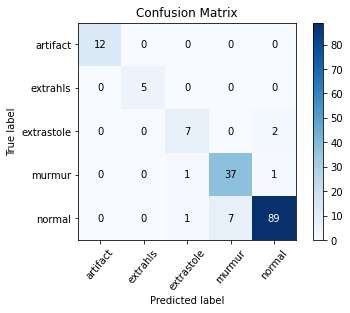

In [33]:
import tensorflow as tf
CNN_chunkSize3_another_way = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3_another_way')
testing_the_model(CNN_chunkSize3_another_way, 3, 'another')

Train: 300
Test: 162


  0%|          | 0/162 [00:00<?, ?it/s]

1/1 [==============================] - 0s 56ms/step


  1%|          | 1/162 [00:00<01:22,  1.95it/s]

1/1 [==============================] - 0s 59ms/step


  1%|          | 2/162 [00:01<01:22,  1.93it/s]

1/1 [==============================] - 0s 39ms/step


  2%|▏         | 3/162 [00:01<01:01,  2.57it/s]

1/1 [==============================] - 0s 37ms/step


  2%|▏         | 4/162 [00:01<00:58,  2.68it/s]

1/1 [==============================] - 0s 32ms/step


  3%|▎         | 5/162 [00:02<01:02,  2.51it/s]

1/1 [==============================] - 0s 35ms/step


  4%|▎         | 6/162 [00:02<00:49,  3.18it/s]

1/1 [==============================] - 0s 45ms/step


  4%|▍         | 7/162 [00:02<00:51,  3.00it/s]

1/1 [==============================] - 0s 37ms/step


  5%|▍         | 8/162 [00:03<00:57,  2.69it/s]

1/1 [==============================] - 0s 36ms/step


  6%|▌         | 9/162 [00:03<00:56,  2.71it/s]

1/1 [==============================] - 0s 39ms/step


  6%|▌         | 10/162 [00:03<01:00,  2.52it/s]

1/1 [==============================] - 0s 45ms/step


  7%|▋         | 11/162 [00:04<01:03,  2.36it/s]

1/1 [==============================] - 0s 38ms/step


  7%|▋         | 12/162 [00:04<01:04,  2.33it/s]

1/1 [==============================] - 0s 31ms/step


  8%|▊         | 13/162 [00:05<01:05,  2.29it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▊         | 14/162 [00:05<01:01,  2.41it/s]

1/1 [==============================] - 0s 36ms/step


  9%|▉         | 15/162 [00:05<00:58,  2.51it/s]

1/1 [==============================] - 0s 36ms/step


 10%|▉         | 16/162 [00:06<00:55,  2.62it/s]

1/1 [==============================] - 0s 34ms/step


 10%|█         | 17/162 [00:06<00:53,  2.69it/s]

1/1 [==============================] - 0s 33ms/step


 11%|█         | 18/162 [00:07<00:52,  2.74it/s]

1/1 [==============================] - 0s 43ms/step


 12%|█▏        | 19/162 [00:07<00:58,  2.44it/s]

1/1 [==============================] - 0s 29ms/step


 12%|█▏        | 20/162 [00:07<00:55,  2.56it/s]

1/1 [==============================] - 0s 33ms/step


 13%|█▎        | 21/162 [00:08<00:52,  2.67it/s]

1/1 [==============================] - 0s 29ms/step


 14%|█▎        | 22/162 [00:08<00:51,  2.73it/s]

1/1 [==============================] - 0s 36ms/step


 14%|█▍        | 23/162 [00:08<00:41,  3.34it/s]

1/1 [==============================] - 0s 39ms/step


 15%|█▍        | 24/162 [00:08<00:34,  3.96it/s]

1/1 [==============================] - 0s 31ms/step


 15%|█▌        | 25/162 [00:09<00:50,  2.70it/s]

1/1 [==============================] - 0s 29ms/step


 16%|█▌        | 26/162 [00:10<01:01,  2.22it/s]

1/1 [==============================] - 0s 31ms/step


 17%|█▋        | 27/162 [00:10<00:48,  2.79it/s]

1/1 [==============================] - 0s 37ms/step


 17%|█▋        | 28/162 [00:10<00:54,  2.45it/s]

1/1 [==============================] - 0s 44ms/step


 18%|█▊        | 29/162 [00:11<00:56,  2.36it/s]

1/1 [==============================] - 0s 48ms/step


 19%|█▊        | 30/162 [00:11<01:06,  2.00it/s]

1/1 [==============================] - 0s 62ms/step


 19%|█▉        | 31/162 [00:12<01:08,  1.92it/s]

1/1 [==============================] - 0s 49ms/step


 20%|█▉        | 32/162 [00:13<01:15,  1.71it/s]

1/1 [==============================] - 0s 31ms/step


 20%|██        | 33/162 [00:14<01:24,  1.53it/s]

1/1 [==============================] - 0s 55ms/step


 21%|██        | 34/162 [00:14<01:24,  1.51it/s]

1/1 [==============================] - 0s 30ms/step


 22%|██▏       | 35/162 [00:15<01:17,  1.63it/s]

1/1 [==============================] - 0s 34ms/step


 22%|██▏       | 36/162 [00:15<00:59,  2.12it/s]

1/1 [==============================] - 0s 28ms/step


 23%|██▎       | 37/162 [00:15<00:46,  2.70it/s]

1/1 [==============================] - 0s 42ms/step


 23%|██▎       | 38/162 [00:15<00:37,  3.28it/s]

1/1 [==============================] - 0s 33ms/step


 24%|██▍       | 39/162 [00:16<00:41,  2.96it/s]

1/1 [==============================] - 0s 40ms/step


 25%|██▍       | 40/162 [00:16<00:37,  3.22it/s]

1/1 [==============================] - 0s 29ms/step


 25%|██▌       | 41/162 [00:16<00:38,  3.18it/s]

1/1 [==============================] - 0s 31ms/step


 26%|██▌       | 42/162 [00:17<00:52,  2.30it/s]

1/1 [==============================] - 0s 28ms/step


 27%|██▋       | 43/162 [00:17<00:54,  2.18it/s]

1/1 [==============================] - 0s 29ms/step


 27%|██▋       | 44/162 [00:18<00:49,  2.36it/s]

1/1 [==============================] - 0s 25ms/step


 28%|██▊       | 45/162 [00:18<00:46,  2.52it/s]

1/1 [==============================] - 0s 31ms/step


 28%|██▊       | 46/162 [00:18<00:43,  2.65it/s]

1/1 [==============================] - 0s 29ms/step


 29%|██▉       | 47/162 [00:19<00:41,  2.74it/s]

1/1 [==============================] - 0s 25ms/step


 30%|██▉       | 48/162 [00:20<00:58,  1.94it/s]

1/1 [==============================] - 0s 29ms/step


 30%|███       | 49/162 [00:20<00:45,  2.48it/s]

1/1 [==============================] - 0s 30ms/step


 31%|███       | 50/162 [00:20<00:45,  2.48it/s]

1/1 [==============================] - 0s 34ms/step


 31%|███▏      | 51/162 [00:20<00:41,  2.70it/s]

1/1 [==============================] - 0s 28ms/step


 32%|███▏      | 52/162 [00:21<00:39,  2.80it/s]

1/1 [==============================] - 0s 28ms/step


 33%|███▎      | 53/162 [00:21<00:31,  3.44it/s]

1/1 [==============================] - 0s 30ms/step


 33%|███▎      | 54/162 [00:21<00:29,  3.66it/s]

1/1 [==============================] - 0s 32ms/step


 34%|███▍      | 55/162 [00:21<00:28,  3.72it/s]

1/1 [==============================] - 0s 32ms/step


 35%|███▍      | 56/162 [00:22<00:24,  4.35it/s]

1/1 [==============================] - 0s 28ms/step


 35%|███▌      | 57/162 [00:22<00:23,  4.40it/s]

1/1 [==============================] - 0s 28ms/step


 36%|███▌      | 58/162 [00:22<00:26,  3.89it/s]

1/1 [==============================] - 0s 25ms/step


 36%|███▋      | 59/162 [00:23<00:35,  2.93it/s]

1/1 [==============================] - 0s 29ms/step


 37%|███▋      | 60/162 [00:23<00:34,  3.00it/s]

1/1 [==============================] - 0s 29ms/step


 38%|███▊      | 61/162 [00:23<00:30,  3.31it/s]

1/1 [==============================] - 0s 26ms/step


 38%|███▊      | 62/162 [00:23<00:31,  3.20it/s]

1/1 [==============================] - 0s 25ms/step


 39%|███▉      | 63/162 [00:24<00:31,  3.15it/s]

1/1 [==============================] - 0s 28ms/step


 40%|███▉      | 64/162 [00:24<00:30,  3.18it/s]

1/1 [==============================] - 0s 54ms/step


 40%|████      | 65/162 [00:25<00:36,  2.69it/s]

1/1 [==============================] - 0s 43ms/step


 41%|████      | 66/162 [00:25<00:31,  3.08it/s]

1/1 [==============================] - 0s 39ms/step


 41%|████▏     | 67/162 [00:25<00:35,  2.69it/s]

1/1 [==============================] - 0s 35ms/step


 42%|████▏     | 68/162 [00:26<00:39,  2.40it/s]

1/1 [==============================] - 0s 42ms/step


 43%|████▎     | 69/162 [00:26<00:37,  2.47it/s]

1/1 [==============================] - 0s 44ms/step


 43%|████▎     | 70/162 [00:27<00:35,  2.59it/s]

1/1 [==============================] - 0s 85ms/step


 44%|████▍     | 71/162 [00:27<00:34,  2.62it/s]

1/1 [==============================] - 0s 43ms/step


 44%|████▍     | 72/162 [00:27<00:37,  2.37it/s]

1/1 [==============================] - 0s 30ms/step


 45%|████▌     | 73/162 [00:28<00:35,  2.54it/s]

1/1 [==============================] - 0s 44ms/step


 46%|████▌     | 74/162 [00:28<00:36,  2.40it/s]

1/1 [==============================] - 0s 33ms/step


 46%|████▋     | 75/162 [00:29<00:35,  2.42it/s]

1/1 [==============================] - 0s 25ms/step


 47%|████▋     | 76/162 [00:29<00:34,  2.46it/s]

1/1 [==============================] - 0s 29ms/step


 48%|████▊     | 77/162 [00:29<00:32,  2.64it/s]

1/1 [==============================] - 0s 24ms/step


 48%|████▊     | 78/162 [00:30<00:33,  2.51it/s]

1/1 [==============================] - 0s 28ms/step


 49%|████▉     | 79/162 [00:30<00:30,  2.68it/s]

1/1 [==============================] - 0s 29ms/step


 49%|████▉     | 80/162 [00:31<00:31,  2.62it/s]

1/1 [==============================] - 0s 34ms/step


 50%|█████     | 81/162 [00:31<00:29,  2.72it/s]

1/1 [==============================] - 0s 25ms/step


 51%|█████     | 82/162 [00:31<00:28,  2.78it/s]

1/1 [==============================] - 0s 32ms/step


 51%|█████     | 83/162 [00:31<00:23,  3.36it/s]

1/1 [==============================] - 0s 32ms/step


 52%|█████▏    | 84/162 [00:32<00:26,  2.93it/s]

1/1 [==============================] - 0s 26ms/step


 52%|█████▏    | 85/162 [00:32<00:21,  3.56it/s]

1/1 [==============================] - 0s 29ms/step


 53%|█████▎    | 86/162 [00:33<00:28,  2.68it/s]

1/1 [==============================] - 0s 27ms/step


 54%|█████▎    | 87/162 [00:33<00:24,  3.01it/s]

1/1 [==============================] - 0s 29ms/step


 54%|█████▍    | 88/162 [00:33<00:24,  3.03it/s]

1/1 [==============================] - 0s 25ms/step


 55%|█████▍    | 89/162 [00:33<00:19,  3.68it/s]

1/1 [==============================] - 0s 31ms/step


 56%|█████▌    | 90/162 [00:34<00:20,  3.48it/s]

1/1 [==============================] - 0s 28ms/step


 56%|█████▌    | 91/162 [00:34<00:21,  3.29it/s]

1/1 [==============================] - 0s 26ms/step


 57%|█████▋    | 92/162 [00:34<00:19,  3.57it/s]

1/1 [==============================] - 0s 28ms/step


 57%|█████▋    | 93/162 [00:34<00:16,  4.12it/s]

1/1 [==============================] - 0s 31ms/step


 58%|█████▊    | 94/162 [00:35<00:18,  3.76it/s]

1/1 [==============================] - 0s 25ms/step


 59%|█████▊    | 95/162 [00:35<00:22,  2.93it/s]

1/1 [==============================] - 0s 26ms/step


 59%|█████▉    | 96/162 [00:35<00:22,  2.96it/s]

1/1 [==============================] - 0s 36ms/step


 60%|█████▉    | 97/162 [00:36<00:21,  3.01it/s]

1/1 [==============================] - 0s 26ms/step


 60%|██████    | 98/162 [00:36<00:19,  3.29it/s]

1/1 [==============================] - 0s 28ms/step


 61%|██████    | 99/162 [00:36<00:16,  3.91it/s]

1/1 [==============================] - 0s 31ms/step


 62%|██████▏   | 100/162 [00:37<00:20,  3.01it/s]

1/1 [==============================] - 0s 26ms/step


 62%|██████▏   | 101/162 [00:37<00:20,  3.02it/s]

1/1 [==============================] - 0s 27ms/step


 63%|██████▎   | 102/162 [00:37<00:16,  3.67it/s]

1/1 [==============================] - 0s 28ms/step


 64%|██████▎   | 103/162 [00:37<00:15,  3.72it/s]

1/1 [==============================] - 0s 34ms/step


 64%|██████▍   | 104/162 [00:38<00:16,  3.50it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████▍   | 105/162 [00:38<00:15,  3.71it/s]

1/1 [==============================] - 0s 30ms/step


 65%|██████▌   | 106/162 [00:39<00:21,  2.67it/s]

1/1 [==============================] - 0s 57ms/step


 66%|██████▌   | 107/162 [00:39<00:20,  2.70it/s]

1/1 [==============================] - 0s 27ms/step


 67%|██████▋   | 108/162 [00:39<00:21,  2.54it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 109/162 [00:40<00:20,  2.54it/s]

1/1 [==============================] - 0s 44ms/step


 68%|██████▊   | 110/162 [00:40<00:26,  2.00it/s]

1/1 [==============================] - 0s 44ms/step


 69%|██████▊   | 111/162 [00:41<00:20,  2.46it/s]

1/1 [==============================] - 0s 68ms/step


 69%|██████▉   | 112/162 [00:41<00:25,  1.98it/s]

1/1 [==============================] - 0s 59ms/step


 70%|██████▉   | 113/162 [00:42<00:31,  1.57it/s]

1/1 [==============================] - 0s 32ms/step


 70%|███████   | 114/162 [00:43<00:23,  2.02it/s]

1/1 [==============================] - 0s 30ms/step


 71%|███████   | 115/162 [00:43<00:19,  2.39it/s]

1/1 [==============================] - 0s 26ms/step


 72%|███████▏  | 116/162 [00:43<00:19,  2.37it/s]

1/1 [==============================] - 0s 27ms/step


 72%|███████▏  | 117/162 [00:43<00:16,  2.74it/s]

1/1 [==============================] - 0s 31ms/step


 73%|███████▎  | 118/162 [00:44<00:14,  3.07it/s]

1/1 [==============================] - 0s 26ms/step


 73%|███████▎  | 119/162 [00:44<00:13,  3.08it/s]

1/1 [==============================] - 0s 30ms/step


 74%|███████▍  | 120/162 [00:45<00:19,  2.14it/s]

1/1 [==============================] - 0s 25ms/step


 75%|███████▍  | 121/162 [00:45<00:17,  2.34it/s]

1/1 [==============================] - 0s 32ms/step


 75%|███████▌  | 122/162 [00:46<00:17,  2.34it/s]

1/1 [==============================] - 0s 27ms/step


 76%|███████▌  | 123/162 [00:46<00:16,  2.34it/s]

1/1 [==============================] - 0s 30ms/step


 77%|███████▋  | 124/162 [00:46<00:15,  2.49it/s]

1/1 [==============================] - 0s 36ms/step


 77%|███████▋  | 125/162 [00:47<00:14,  2.60it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 126/162 [00:47<00:12,  2.97it/s]

1/1 [==============================] - 0s 35ms/step


 78%|███████▊  | 127/162 [00:47<00:11,  2.93it/s]

1/1 [==============================] - 0s 30ms/step


 79%|███████▉  | 128/162 [00:47<00:10,  3.26it/s]

1/1 [==============================] - 0s 30ms/step


 80%|███████▉  | 129/162 [00:48<00:11,  2.93it/s]

1/1 [==============================] - 0s 26ms/step


 80%|████████  | 130/162 [00:48<00:10,  2.92it/s]

1/1 [==============================] - 0s 26ms/step


 81%|████████  | 131/162 [00:49<00:10,  2.97it/s]

1/1 [==============================] - 0s 29ms/step


 81%|████████▏ | 132/162 [00:49<00:09,  3.28it/s]

1/1 [==============================] - 0s 30ms/step


 82%|████████▏ | 133/162 [00:49<00:09,  3.18it/s]

1/1 [==============================] - 0s 28ms/step


 83%|████████▎ | 134/162 [00:49<00:08,  3.43it/s]

1/1 [==============================] - 0s 27ms/step


 83%|████████▎ | 135/162 [00:49<00:06,  4.05it/s]

1/1 [==============================] - 0s 33ms/step


 84%|████████▍ | 136/162 [00:50<00:06,  4.09it/s]

1/1 [==============================] - 0s 25ms/step


 85%|████████▍ | 137/162 [00:50<00:06,  3.72it/s]

1/1 [==============================] - 0s 35ms/step


 85%|████████▌ | 138/162 [00:50<00:05,  4.23it/s]

1/1 [==============================] - 0s 33ms/step


 86%|████████▌ | 139/162 [00:50<00:05,  4.30it/s]

1/1 [==============================] - 0s 31ms/step


 86%|████████▋ | 140/162 [00:51<00:06,  3.18it/s]

1/1 [==============================] - 0s 26ms/step


 87%|████████▋ | 141/162 [00:51<00:06,  3.07it/s]

1/1 [==============================] - 0s 32ms/step


 88%|████████▊ | 142/162 [00:52<00:06,  3.07it/s]

1/1 [==============================] - 0s 30ms/step


 88%|████████▊ | 143/162 [00:52<00:06,  2.97it/s]

1/1 [==============================] - 0s 27ms/step


 89%|████████▉ | 144/162 [00:52<00:06,  2.92it/s]

1/1 [==============================] - 0s 50ms/step


 90%|████████▉ | 145/162 [00:53<00:06,  2.79it/s]

1/1 [==============================] - 0s 28ms/step


 90%|█████████ | 146/162 [00:53<00:05,  2.88it/s]

1/1 [==============================] - 0s 36ms/step


 91%|█████████ | 147/162 [00:54<00:06,  2.31it/s]

1/1 [==============================] - 0s 44ms/step


 91%|█████████▏| 148/162 [00:55<00:07,  1.83it/s]

1/1 [==============================] - 0s 30ms/step


 92%|█████████▏| 149/162 [00:55<00:07,  1.74it/s]

1/1 [==============================] - 0s 41ms/step


 93%|█████████▎| 150/162 [00:56<00:07,  1.70it/s]

1/1 [==============================] - 0s 53ms/step


 93%|█████████▎| 151/162 [00:56<00:06,  1.60it/s]

1/1 [==============================] - 0s 28ms/step


 94%|█████████▍| 152/162 [00:57<00:05,  1.86it/s]

1/1 [==============================] - 0s 27ms/step


 94%|█████████▍| 153/162 [00:57<00:04,  2.10it/s]

1/1 [==============================] - 0s 27ms/step


 95%|█████████▌| 154/162 [00:57<00:03,  2.45it/s]

1/1 [==============================] - 0s 28ms/step


 96%|█████████▌| 155/162 [00:58<00:02,  2.81it/s]

1/1 [==============================] - 0s 29ms/step


 96%|█████████▋| 156/162 [00:58<00:02,  2.89it/s]

1/1 [==============================] - 0s 32ms/step


 97%|█████████▋| 157/162 [00:58<00:01,  2.92it/s]

1/1 [==============================] - 0s 25ms/step


 98%|█████████▊| 158/162 [00:59<00:01,  2.90it/s]

1/1 [==============================] - 0s 27ms/step


 98%|█████████▊| 159/162 [00:59<00:01,  2.94it/s]

1/1 [==============================] - 0s 26ms/step


 99%|█████████▉| 160/162 [00:59<00:00,  3.29it/s]

1/1 [==============================] - 0s 30ms/step


 99%|█████████▉| 161/162 [00:59<00:00,  3.48it/s]

1/1 [==============================] - 0s 26ms/step


100%|██████████| 162/162 [01:00<00:00,  2.69it/s]

              precision    recall  f1-score   support

    artifact       1.00      1.00      1.00        12
    extrahls       1.00      1.00      1.00         5
  extrastole       0.56      0.56      0.56         9
      murmur       0.87      0.94      0.91        36
      normal       0.95      0.92      0.93       100

    accuracy                           0.91       162
   macro avg       0.88      0.88      0.88       162
weighted avg       0.91      0.91      0.91       162



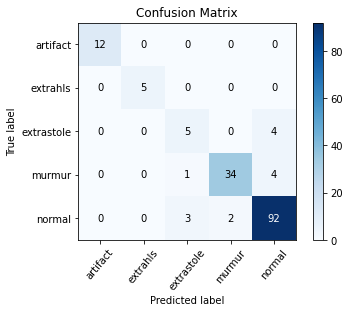

In [37]:
import tensorflow as tf
CNN_chunkSize3 = tf.keras.models.load_model('/content/drive/MyDrive/heartbeat-sounds/CNN_chunkSize3')
testing_the_model(CNN_chunkSize3, 3)

##Comparing performances

In [41]:
def comparison_of_model_in_testing_chunks():
  return pd.DataFrame(columns = ["model Name","Accuracy"],data = [["CNN_chunkSize2","88%"],["CNN_chunkSize2_another_way","91%"],["CNN_chunkSize3","85%"],["CNN_chunkSize3_another","88%"],["CNN_chunkSize4","69%"]])
comparison_of_model_in_testing_chunks()

,model Name,Accuracy
0,CNN_chunkSize2,88%
1,CNN_chunkSize2_another_way,91%
2,CNN_chunkSize3,85%
3,CNN_chunkSize3_another,88%
4,CNN_chunkSize4,69%


In [42]:
def comparison_of_model_in_testing_whole_files():
  return pd.DataFrame(columns = ["model Name","Accuracy"],data = [["CNN_chunkSize2","97%"],["CNN_chunkSize2_another_way","99%"],["CNN_chunkSize3","91%"],["CNN_chunkSize3_another","93%"],["CNN_chunkSize4","75%"]])
comparison_of_model_in_testing_whole_files()

,model Name,Accuracy
0,CNN_chunkSize2,97%
1,CNN_chunkSize2_another_way,99%
2,CNN_chunkSize3,91%
3,CNN_chunkSize3_another,93%
4,CNN_chunkSize4,75%
